## COVID-19 policy responses: An exploratory data analysis

### Importing libraries

In [1156]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import numpy as np
plt.style.use('ggplot')

### Cleaning the raw data

In [1157]:
url1 = 'https://raw.githubusercontent.com/jessonpagaduan/covid19policydatabase/master/ADBCovid19-export-2020-08-30.csv'

In [1158]:
df1 = pd.read_csv(url1)

In [1159]:
df1.head()

Region      Country Measure Code  \
0  Central and West Asia  Afghanistan            1   
1  Central and West Asia  Afghanistan          01A   
2  Central and West Asia  Afghanistan          01B   
3  Central and West Asia  Afghanistan          01C   
4  Central and West Asia  Afghanistan            2   

                                         Measure Currency Code  \
0                         01 - Liquidity Support           AFN   
1                       01A - Short-term lending           AFN   
2  01B - Support policies for short-term lending           AFN   
3                         01C - Forex operations           AFN   
4                           02 - Credit creation           AFN   

   Amount (Local)  Amount USD  \
0             NaN         NaN   
1             NaN         NaN   
2             NaN         NaN   
3             NaN         NaN   
4             NaN         NaN   

                                              Source  Post Date  \
0                                                NaN  8/24/2020   
1                                                NaN  8/24/2020   
2  IMF. https://www.imf.org/en/Topics/imf-and-cov...  8/24/2020   
3  IMF. https://www.imf.org/en/Topics/imf-and-cov...  8/24/2020   
4                                                NaN  8/24/2020   

                                             Details  
0                                                NaN  
1                                                NaN  
2  No estimate/amount: The Financial Stability Co...  
3  No amount/estimate: (i) DAB is in discussions ...  
4                                                NaN

In [1160]:
df1.tail()

Region   Country Measure Code                           Measure  \
2365  Southeast Asia  Viet Nam          09A                       09A - Swaps   
2366  Southeast Asia  Viet Nam          09B  09B - International loans/grants   
2367  Southeast Asia  Viet Nam           10                 10 - No breakdown   
2368  Southeast Asia  Viet Nam           11      11 - Other Economic Measures   
2369  Southeast Asia  Viet Nam           12        12 - Non-Economic Measures   

     Currency Code  Amount (Local)  Amount USD  \
2365           VND             NaN         NaN   
2366           VND             NaN         NaN   
2367           VND             NaN         NaN   
2368           VND             NaN         NaN   
2369           VND             NaN         NaN   

                                                 Source  Post Date  \
2365                                                NaN  8/24/2020   
2366                                                NaN  8/24/2020   
2367                                                NaN  8/24/2020   
2368  IMF,MOF, SBV. https://www.imf.org/en/Topics/im...  8/24/2020   
2369  OECD. http://www.oecd.org/coronavirus/en/ (acc...  8/24/2020   

                                                Details  
2365                                                NaN  
2366                                                NaN  
2367                                                NaN  
2368  (i) On March 31, the State Bank of Vietnam ins...  
2369  (i) On March 9, the government tightened entry...

In [1161]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2370 entries, 0 to 2369
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          2370 non-null   object 
 1   Country         2370 non-null   object 
 2   Measure Code    2370 non-null   object 
 3   Measure         2370 non-null   object 
 4   Currency Code   2370 non-null   object 
 5   Amount (Local)  822 non-null    float64
 6   Amount USD      822 non-null    float64
 7   Source          881 non-null    object 
 8   Post Date       2370 non-null   object 
 9   Details         881 non-null    object 
dtypes: float64(2), object(8)
memory usage: 185.3+ KB


In [1162]:
df1.drop(columns=['Source', 'Post Date', 'Details'], inplace=True)

In [1163]:
df1.columns

Index(['Region', 'Country', 'Measure Code', 'Measure', 'Currency Code',
       'Amount (Local)', 'Amount USD'],
      dtype='object')

In [1164]:
df1.columns = ['region', 'country', 'measure_id', 'measure_name', 'currency', 'amount_lcy', 'amount_usd']

In [1165]:
df1

region      country measure_id  \
0     Central and West Asia  Afghanistan          1   
1     Central and West Asia  Afghanistan        01A   
2     Central and West Asia  Afghanistan        01B   
3     Central and West Asia  Afghanistan        01C   
4     Central and West Asia  Afghanistan          2   
...                     ...          ...        ...   
2365         Southeast Asia     Viet Nam        09A   
2366         Southeast Asia     Viet Nam        09B   
2367         Southeast Asia     Viet Nam         10   
2368         Southeast Asia     Viet Nam         11   
2369         Southeast Asia     Viet Nam         12   

                                       measure_name currency  amount_lcy  \
0                            01 - Liquidity Support      AFN         NaN   
1                          01A - Short-term lending      AFN         NaN   
2     01B - Support policies for short-term lending      AFN         NaN   
3                            01C - Forex operations      AFN         NaN   
4                              02 - Credit creation      AFN         NaN   
...                                             ...      ...         ...   
2365                                    09A - Swaps      VND         NaN   
2366               09B - International loans/grants      VND         NaN   
2367                              10 - No breakdown      VND         NaN   
2368                   11 - Other Economic Measures      VND         NaN   
2369                     12 - Non-Economic Measures      VND         NaN   

      amount_usd  
0            NaN  
1            NaN  
2            NaN  
3            NaN  
4            NaN  
...          ...  
2365         NaN  
2366         NaN  
2367         NaN  
2368         NaN  
2369         NaN  

[2370 rows x 7 columns]

In [1166]:
df1.set_index(['region', 'country'], inplace=True)

In [1167]:
df1

measure_id  \
region                country                  
Central and West Asia Afghanistan          1   
                      Afghanistan        01A   
                      Afghanistan        01B   
                      Afghanistan        01C   
                      Afghanistan          2   
...                                      ...   
Southeast Asia        Viet Nam           09A   
                      Viet Nam           09B   
                      Viet Nam            10   
                      Viet Nam            11   
                      Viet Nam            12   

                                                                    measure_name  \
region                country                                                      
Central and West Asia Afghanistan                         01 - Liquidity Support   
                      Afghanistan                       01A - Short-term lending   
                      Afghanistan  01B - Support policies for short-term lending   
                      Afghanistan                         01C - Forex operations   
                      Afghanistan                           02 - Credit creation   
...                                                                          ...   
Southeast Asia        Viet Nam                                       09A - Swaps   
                      Viet Nam                  09B - International loans/grants   
                      Viet Nam                                 10 - No breakdown   
                      Viet Nam                      11 - Other Economic Measures   
                      Viet Nam                        12 - Non-Economic Measures   

                                  currency  amount_lcy  amount_usd  
region                country                                       
Central and West Asia Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
...                                    ...         ...         ...  
Southeast Asia        Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  

[2370 rows x 5 columns]

In [1168]:
df1.index.levels[0]

Index(['Central and West Asia', 'East Asia', 'Other ADB Members',
       'Other Economies', 'Others', 'Pacific', 'South Asia', 'Southeast Asia'],
      dtype='object', name='region')

In [1169]:
len(df1.index.levels[0])

8

In [1170]:
df1.index.levels[1]

Index(['Afghanistan', 'Arab Republic of Egypt', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belgium', 'Bhutan',
       'Brazil', 'Brunei Darussalam', 'Cambodia', 'Canada', 'Cook Islands',
       'Denmark', 'European Central Bank', 'European Union',
       'Federated States of Micronesia', 'Fiji', 'Finland', 'France',
       'Georgia', 'Germany', 'Hong Kong, China', 'India', 'Indonesia',
       'Ireland', 'Islamic Republic of Iran', 'Italy', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kyrgyz Republic', 'Lao PDR', 'Luxembourg', 'Malaysia',
       'Maldives', 'Marshall Islands', 'Mexico', 'Mongolia', 'Myanmar',
       'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'Niue',
       'Norway', 'Pakistan', 'Palau', 'Papua New Guinea',
       'People's Republic of China', 'Philippines', 'Portugal',
       'Republic of Korea', 'Russian Federation', 'Samoa', 'Saudi Arabia',
       'Singapore', 'Solomon Islands', 'South Africa', 'Spain', 'Sri Lanka

In [1171]:
len(df1.index.levels[1])

79

In [1172]:
df1.measure_id.unique()

array(['1', '01A', '01B', '01C', '2', '02A', '02B', '02C', '3', '03A',
       '03B', '4', '5', '05A', '05B', '6', '7', '07A', '07B', '8', '08A',
       '08B', '08B1', '08B2', '9', '09A', '09B', '10', '11', '12'],
      dtype=object)

In [1173]:
z1 = df1.measure_id.unique()
z2 = [1, 1.1, 1.2, 1.3, 2, 2.1, 2.2, 2.3, 3, 3.1, 3.2, 4, 5, 5.1, 5.2,
      6, 7, 7.1, 7.2, 8, 8.1, 8.2, 8.21, 8.22, 9, 9.1, 9.2, 10, 11, 12]
z2 = [float(i) for i in z2]
z = zip(z1, z2)
df1.measure_id.replace(dict(z), inplace=True)

In [1174]:
df1

measure_id  \
region                country                   
Central and West Asia Afghanistan         1.0   
                      Afghanistan         1.1   
                      Afghanistan         1.2   
                      Afghanistan         1.3   
                      Afghanistan         2.0   
...                                       ...   
Southeast Asia        Viet Nam            9.1   
                      Viet Nam            9.2   
                      Viet Nam           10.0   
                      Viet Nam           11.0   
                      Viet Nam           12.0   

                                                                    measure_name  \
region                country                                                      
Central and West Asia Afghanistan                         01 - Liquidity Support   
                      Afghanistan                       01A - Short-term lending   
                      Afghanistan  01B - Support policies for short-term lending   
                      Afghanistan                         01C - Forex operations   
                      Afghanistan                           02 - Credit creation   
...                                                                          ...   
Southeast Asia        Viet Nam                                       09A - Swaps   
                      Viet Nam                  09B - International loans/grants   
                      Viet Nam                                 10 - No breakdown   
                      Viet Nam                      11 - Other Economic Measures   
                      Viet Nam                        12 - Non-Economic Measures   

                                  currency  amount_lcy  amount_usd  
region                country                                       
Central and West Asia Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
                      Afghanistan      AFN         NaN         NaN  
...                                    ...         ...         ...  
Southeast Asia        Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  
                      Viet Nam         VND         NaN         NaN  

[2370 rows x 5 columns]

In [1175]:
df1.measure_name.unique()

array(['01 - Liquidity Support', '01A - Short-term lending',
       '01B - Support policies for short-term lending',
       '01C - Forex operations', '02 - Credit creation',
       '02A - Financial sector lending/funding',
       '02B - Support policies for long-term lending',
       '02C - Loan guarantees', '03 - Direct long-term lending',
       '03A - Long-term lending', '03B - Forbearance',
       '04 - Equity support', '05 - Government support to income/revenue',
       '05A - Health', '05B - Non-health', '06 - Budget reallocation',
       '07 - Central bank financing government',
       '07A - Direct lending & reserve drawdown',
       '07B - Secondary purchase: government securities',
       '08 - International Assistance Received', '08A - Swaps',
       '08B - International loans/grants',
       '08B1 - Asian Development Bank', '08B2 - Other',
       '09 - International Assistance Provided', '09A - Swaps',
       '09B - International loans/grants', '10 - No breakdown',
       '

In [1176]:
df1[df1.measure_id.isin(list(range(13)))]

measure_id  \
region                country                   
Central and West Asia Afghanistan         1.0   
                      Afghanistan         2.0   
                      Afghanistan         3.0   
                      Afghanistan         4.0   
                      Afghanistan         5.0   
...                                       ...   
Southeast Asia        Viet Nam            8.0   
                      Viet Nam            9.0   
                      Viet Nam           10.0   
                      Viet Nam           11.0   
                      Viet Nam           12.0   

                                                                measure_name  \
region                country                                                  
Central and West Asia Afghanistan                     01 - Liquidity Support   
                      Afghanistan                       02 - Credit creation   
                      Afghanistan              03 - Direct long-term lending   
                      Afghanistan                        04 - Equity support   
                      Afghanistan  05 - Government support to income/revenue   
...                                                                      ...   
Southeast Asia        Viet Nam        08 - International Assistance Received   
                      Viet Nam        09 - International Assistance Provided   
                      Viet Nam                             10 - No breakdown   
                      Viet Nam                  11 - Other Economic Measures   
                      Viet Nam                    12 - Non-Economic Measures   

                                  currency    amount_lcy   amount_usd  
region                country                                          
Central and West Asia Afghanistan      AFN           NaN          NaN  
                      Afghanistan      AFN           NaN          NaN  
                      Afghanistan      AFN           NaN          NaN  
                      Afghanistan      AFN           NaN          NaN  
                      Afghanistan      AFN  8.000000e+09  101662492.0  
...                                    ...           ...          ...  
Southeast Asia        Viet Nam         VND  9.694340e+12  417230000.0  
                      Viet Nam         VND           NaN          NaN  
                      Viet Nam         VND           NaN          NaN  
                      Viet Nam         VND           NaN          NaN  
                      Viet Nam         VND           NaN          NaN  

[948 rows x 5 columns]

In [1177]:
df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])]

measure_id  \
region                country                   
Central and West Asia Afghanistan         1.0   
                      Afghanistan         2.0   
                      Afghanistan         3.0   
                      Afghanistan         4.0   
                      Afghanistan         5.0   
...                                       ...   
Southeast Asia        Viet Nam            3.0   
                      Viet Nam            4.0   
                      Viet Nam            5.0   
                      Viet Nam            9.0   
                      Viet Nam           10.0   

                                                                measure_name  \
region                country                                                  
Central and West Asia Afghanistan                     01 - Liquidity Support   
                      Afghanistan                       02 - Credit creation   
                      Afghanistan              03 - Direct long-term lending   
                      Afghanistan                        04 - Equity support   
                      Afghanistan  05 - Government support to income/revenue   
...                                                                      ...   
Southeast Asia        Viet Nam                 03 - Direct long-term lending   
                      Viet Nam                           04 - Equity support   
                      Viet Nam     05 - Government support to income/revenue   
                      Viet Nam        09 - International Assistance Provided   
                      Viet Nam                             10 - No breakdown   

                                  currency    amount_lcy    amount_usd  
region                country                                           
Central and West Asia Afghanistan      AFN           NaN           NaN  
                      Afghanistan      AFN           NaN           NaN  
                      Afghanistan      AFN           NaN           NaN  
                      Afghanistan      AFN           NaN           NaN  
                      Afghanistan      AFN  8.000000e+09  1.016625e+08  
...                                    ...           ...           ...  
Southeast Asia        Viet Nam         VND  3.160000e+14  1.360017e+10  
                      Viet Nam         VND           NaN           NaN  
                      Viet Nam         VND  2.998000e+14  1.290295e+10  
                      Viet Nam         VND           NaN           NaN  
                      Viet Nam         VND           NaN           NaN  

[553 rows x 5 columns]

In [1178]:
df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_lcy']

country
Afghanistan               8.000000e+09
Arab Republic of Egypt    3.454800e+11
Argentina                 6.938740e+11
Armenia                   3.000000e+11
Australia                 4.555640e+11
                              ...     
United Kingdom            6.506028e+11
United States             7.056834e+12
Uzbekistan                3.070000e+11
Vanuatu                   5.900000e+09
Viet Nam                  6.158000e+14
Name: amount_lcy, Length: 79, dtype: float64

In [1179]:
df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_usd']

country
Afghanistan               1.016625e+08
Arab Republic of Egypt    2.198413e+10
Argentina                 1.105775e+10
Armenia                   6.134861e+08
Australia                 2.832701e+11
                              ...     
United Kingdom            8.055123e+11
United States             7.056834e+12
Uzbekistan                3.213240e+07
Vanuatu                   5.014022e+07
Viet Nam                  2.650312e+10
Name: amount_usd, Length: 79, dtype: float64

In [1180]:
total_pkg_lcy = df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_lcy']
total_pkg_usd = df1[df1.measure_id.isin([1, 2, 3, 4, 5, 9, 10])].groupby(level=1).sum().loc[:, 'amount_usd']
frames = [total_pkg_lcy, total_pkg_usd]
df2 = pd.concat(frames, axis=1)

In [1181]:
df2

amount_lcy    amount_usd
country                                           
Afghanistan             8.000000e+09  1.016625e+08
Arab Republic of Egypt  3.454800e+11  2.198413e+10
Argentina               6.938740e+11  1.105775e+10
Armenia                 3.000000e+11  6.134861e+08
Australia               4.555640e+11  2.832701e+11
...                              ...           ...
United Kingdom          6.506028e+11  8.055123e+11
United States           7.056834e+12  7.056834e+12
Uzbekistan              3.070000e+11  3.213240e+07
Vanuatu                 5.900000e+09  5.014022e+07
Viet Nam                6.158000e+14  2.650312e+10

[79 rows x 2 columns]

In [1182]:
df2.index

Index(['Afghanistan', 'Arab Republic of Egypt', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belgium', 'Bhutan',
       'Brazil', 'Brunei Darussalam', 'Cambodia', 'Canada', 'Cook Islands',
       'Denmark', 'European Central Bank', 'European Union',
       'Federated States of Micronesia', 'Fiji', 'Finland', 'France',
       'Georgia', 'Germany', 'Hong Kong, China', 'India', 'Indonesia',
       'Ireland', 'Islamic Republic of Iran', 'Italy', 'Japan', 'Kazakhstan',
       'Kiribati', 'Kyrgyz Republic', 'Lao PDR', 'Luxembourg', 'Malaysia',
       'Maldives', 'Marshall Islands', 'Mexico', 'Mongolia', 'Myanmar',
       'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'Niue',
       'Norway', 'Pakistan', 'Palau', 'Papua New Guinea',
       'People's Republic of China', 'Philippines', 'Portugal',
       'Republic of Korea', 'Russian Federation', 'Samoa', 'Saudi Arabia',
       'Singapore', 'Solomon Islands', 'South Africa', 'Spain', 'Sri Lanka

In [1183]:
df1.index.unique()

MultiIndex([('Central and West Asia',                    'Afghanistan'),
            (      'Other Economies',         'Arab Republic of Egypt'),
            (      'Other Economies',                      'Argentina'),
            ('Central and West Asia',                        'Armenia'),
            (    'Other ADB Members',                      'Australia'),
            (    'Other ADB Members',                        'Austria'),
            ('Central and West Asia',                     'Azerbaijan'),
            (           'South Asia',                     'Bangladesh'),
            (    'Other ADB Members',                        'Belgium'),
            (           'South Asia',                         'Bhutan'),
            (      'Other Economies',                         'Brazil'),
            (       'Southeast Asia',              'Brunei Darussalam'),
            (       'Southeast Asia',                       'Cambodia'),
            (    'Other ADB Members',              

In [1184]:
len(df1.index.unique())

79

In [1185]:
df2.set_index(df1.index.unique(), inplace=True)

In [1186]:
df2

amount_lcy    amount_usd
region                country                                           
Central and West Asia Afghanistan             8.000000e+09  1.016625e+08
Other Economies       Arab Republic of Egypt  3.454800e+11  2.198413e+10
                      Argentina               6.938740e+11  1.105775e+10
Central and West Asia Armenia                 3.000000e+11  6.134861e+08
Other ADB Members     Australia               4.555640e+11  2.832701e+11
...                                                    ...           ...
                      United Kingdom          6.506028e+11  8.055123e+11
                      United States           7.056834e+12  7.056834e+12
Central and West Asia Uzbekistan              3.070000e+11  3.213240e+07
Pacific               Vanuatu                 5.900000e+09  5.014022e+07
Southeast Asia        Viet Nam                6.158000e+14  2.650312e+10

[79 rows x 2 columns]

In [1187]:
df2.sort_index(level=0, inplace=True)

In [1188]:
df2.index

MultiIndex([('Central and West Asia',                    'Afghanistan'),
            ('Central and West Asia',                        'Armenia'),
            ('Central and West Asia',                     'Azerbaijan'),
            ('Central and West Asia',                        'Georgia'),
            ('Central and West Asia',                     'Kazakhstan'),
            ('Central and West Asia',                'Kyrgyz Republic'),
            ('Central and West Asia',                       'Pakistan'),
            ('Central and West Asia',                     'Tajikistan'),
            ('Central and West Asia',                   'Turkmenistan'),
            ('Central and West Asia',                     'Uzbekistan'),
            (            'East Asia',               'Hong Kong, China'),
            (            'East Asia',                       'Mongolia'),
            (            'East Asia',     'People's Republic of China'),
            (            'East Asia',              

In [1189]:
df2

amount_lcy    amount_usd
region                country                                
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08
                      Armenia      3.000000e+11  6.134861e+08
                      Azerbaijan   2.715350e+09  1.597265e+09
                      Georgia      5.887498e+09  1.936210e+09
                      Kazakhstan   9.810000e+12  2.379624e+10
...                                         ...           ...
Southeast Asia        Philippines  1.071298e+12  2.104562e+10
                      Singapore    1.304905e+11  9.212178e+10
                      Thailand     2.700000e+12  8.409179e+10
                      Timor-Leste  2.540000e+08  2.540000e+08
                      Viet Nam     6.158000e+14  2.650312e+10

[79 rows x 2 columns]

In [1190]:
df2.groupby(level=0).sum().loc[:, 'amount_usd'].sort_values(ascending=False)

region
Other ADB Members        1.684005e+13
Others                   5.832301e+12
East Asia                2.836336e+12
Other Economies          9.071653e+11
Southeast Asia           4.208749e+11
South Asia               3.781449e+11
Central and West Asia    4.213355e+10
Pacific                  2.556709e+09
Name: amount_usd, dtype: float64

In [1191]:
url2 = 'https://raw.githubusercontent.com/jessonpagaduan/covid19policydatabase/master/IMF-WEO_2019-GDP-2018-Popn.csv'

In [1192]:
df3 = pd.read_csv(url2)

In [1193]:
df3.set_index('country', inplace=True)

In [1194]:
df3.columns = ['gdp_lcy', 'gdp_usd', 'popn']

In [1195]:
df3

gdp_lcy       gdp_usd        popn
country                                                        
Afghanistan              1.502470e+12  1.873400e+10  37172386.0
Albania                  1.705380e+12  1.541800e+10   2866376.0
Algeria                  2.044740e+13  1.727810e+11  42228429.0
Angola                   3.147410e+13  9.152700e+10  30809762.0
Argentina                2.160310e+13  4.454690e+11  44494502.0
...                               ...           ...         ...
Virgin Islands, British           NaN           NaN         NaN
Virgin Islands, U.S.              NaN           NaN         NaN
Wallis and Futuna                 NaN           NaN         NaN
Western Sahara                    NaN           NaN         NaN
Åland Islands                     NaN           NaN         NaN

[250 rows x 3 columns]

In [1196]:
df2 = df2.join(df3, on='country')

In [1197]:
df2

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.715350e+09  1.597265e+09  8.019100e+10   
                      Georgia      5.887498e+09  1.936210e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn  
region                country                                 
Central and West Asia Afghanistan  1.873400e+10   37172386.0  
                      Armenia      1.344400e+10    2951776.0  
                      Azerbaijan   4.717100e+10    9942334.0  
                      Georgia      1.592500e+10    3731000.0  
                      Kazakhstan   1.703260e+11   18276499.0  
...                                         ...          ...  
Southeast Asia        Philippines  3.568140e+11  106651922.0  
                      Singapore    3.628180e+11    5638676.0  
                      Thailand     5.291770e+11   69428524.0  
                      Timor-Leste  2.938000e+09    1267972.0  
                      Viet Nam     2.616370e+11   95540395.0  

[79 rows x 5 columns]

In [1198]:
df2.dtypes

amount_lcy    float64
amount_usd    float64
gdp_lcy       float64
gdp_usd       float64
popn          float64
dtype: object

In [1199]:
df2 = df2.assign(pkg_gdp = lambda x: 100 * x.amount_usd / x.gdp_usd)
df2 = df2.assign(pkg_pc_usd = lambda x: x.amount_usd / x.popn)

In [1200]:
df2

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.715350e+09  1.597265e+09  8.019100e+10   
                      Georgia      5.887498e+09  1.936210e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.386116   
                      Georgia      1.592500e+10    3731000.0  12.158308   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd  
region                country                    
Central and West Asia Afghanistan      2.734893  
                      Armenia        207.836264  
                      Azerbaijan     160.652892  
                      Georgia        518.952156  
                      Kazakhstan    1302.013047  
...                                         ...  
Southeast Asia        Philippines    197.329997  
                      Singapore    16337.484018  
                      Thailand      1211.199412  
                      Timor-Leste    200.319881  
                      Viet Nam       277.402247  

[79 rows x 7 columns]

### Descriptive analysis

East Asia has the biggest COVID-19 policy response package, amounting to USD 2.8 trillion. Average share of policy responses in GDP is also highest in East Asia at 21.5%.

In [1201]:
asia_region = ['East Asia', 'South Asia', 'Southeast Asia', 'Central and West Asia', 'Pacific']

df2.groupby(level=0).sum().loc[asia_region, 'amount_usd'].sort_values(ascending=False)

region
East Asia                2.836336e+12
Southeast Asia           4.208749e+11
South Asia               3.781449e+11
Central and West Asia    4.213355e+10
Pacific                  2.556709e+09
Name: amount_usd, dtype: float64

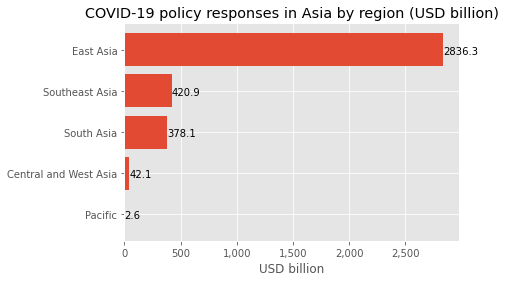

In [1202]:
width = df2.groupby(level=0).sum().loc[asia_region, 'amount_usd'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.barh(width.index, width, align='center')
ax.invert_yaxis()
ax.set_title('COVID-19 policy responses in Asia by region (USD billion)')
ax.set_xlabel('USD billion')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))

for key, value in enumerate(width):
    ax.text(value + 3, key + .1, str(round(value/1e9, 1)))


plt.show()

In [1203]:
df2.groupby(level=0).mean().loc[asia_region, 'pkg_gdp'].sort_values(ascending=False)

region
East Asia                21.450143
Southeast Asia            9.896068
Pacific                   6.952869
South Asia                6.867129
Central and West Asia     4.270171
Name: pkg_gdp, dtype: float64

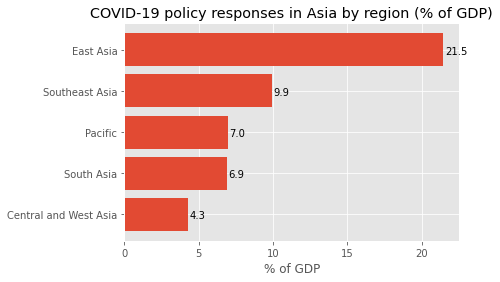

In [1204]:
width = df2.groupby(level=0).mean().loc[asia_region, 'pkg_gdp'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.barh(width.index, width, align='center')
ax.invert_yaxis()
ax.set_title('COVID-19 policy responses in Asia by region (% of GDP)')
ax.set_xlabel('% of GDP')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

for key, value in enumerate(width):
    ax.text(value + .1, key + .1, str(round(value, 1)))


plt.show()

In [1205]:
df2.groupby(level=0).get_group('East Asia')

amount_lcy    amount_usd  \
region    country                                                  
East Asia Hong Kong, China            1.489770e+12  1.918547e+11   
          Mongolia                    6.173294e+12  2.239527e+09   
          People's Republic of China  1.655143e+13  2.358400e+12   
          Republic of Korea           2.871916e+14  2.353862e+11   
          Taipei,China                1.460000e+12  4.845588e+10   

                                           gdp_lcy       gdp_usd  \
region    country                                                  
East Asia Hong Kong, China            2.921250e+12  3.729890e+11   
          Mongolia                    3.712890e+13  1.363700e+10   
          People's Republic of China  9.549700e+13  1.414020e+13   
          Republic of Korea           1.913640e+15  1.629530e+12   
          Taipei,China                1.824140e+13  5.861040e+11   

                                              popn    pkg_gdp    pkg_pc_usd  
region    country                                                            
East Asia Hong Kong, China            7.451000e+06  51.437105  25748.858338  
          Mongolia                    3.170208e+06  16.422429    706.428932  
          People's Republic of China  1.392730e+09  16.678690   1693.364898  
          Republic of Korea           5.163526e+07  14.445038   4558.633791  
          Taipei,China                2.358900e+07   8.267455   2054.172859

In [1206]:
y0 = df2.groupby(level=0).sum().loc[asia_region].sort_values(by='amount_usd')['amount_usd']

In [1207]:
y0

region
Pacific                  2.556709e+09
Central and West Asia    4.213355e+10
South Asia               3.781449e+11
Southeast Asia           4.208749e+11
East Asia                2.836336e+12
Name: amount_usd, dtype: float64

In [1208]:
df2.groupby(level=0).mean().loc[y0.index, 'pkg_gdp']

region
Pacific                   6.952869
Central and West Asia     4.270171
South Asia                6.867129
Southeast Asia            9.896068
East Asia                21.450143
Name: pkg_gdp, dtype: float64

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:42: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


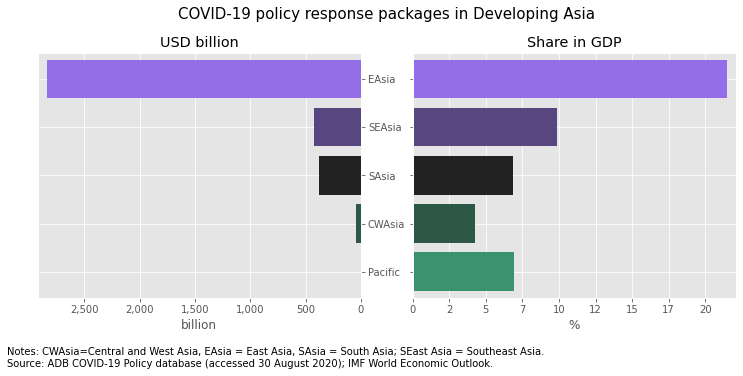

In [1209]:
y0 = df2.groupby(level=0).sum().loc[asia_region].sort_values(by='amount_usd')['amount_usd']
y1 = df2.groupby(level=0).mean().loc[y0.index, 'pkg_gdp']

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

axs[0].barh(y0.index, y0, align='center', color=sns.diverging_palette(150, 275, s=80, l=55, n=5,
                                                                     center='dark'))
axs[0].invert_yaxis()
axs[0].set_title('USD billion')
axs[0].set_xlabel('billion')
axs[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))


axs[1].barh(y1.index, y1, align='center', color=sns.diverging_palette(150, 275, s=80, l=55, n=5,
                                                                     center='dark'))
axs[1].invert_yaxis()
axs[1].set_title('Share in GDP')
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
axs[1].set_xlabel('%')


axs[0].invert_xaxis()
axs[0].set(yticks=y0.index, yticklabels=['EAsia', 'SEAsia', 'SAsia', 'CWAsia', 'Pacific'][::-1])
axs[0].yaxis.tick_right()


# for key, value in enumerate(y0):
#     axs[0].text(value, key, str(round(value/1e9, 1)))
# for key, value in enumerate(y1):
#     axs[1].text(value + 1, key, str(round(value, 1)))
    

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy response packages in Developing Asia',
             y=1.05, fontsize=15)
plt.annotate('Notes: CWAsia=Central and West Asia, EAsia = East Asia, \
SAsia = South Asia; SEast Asia = Southeast Asia.\
\nSource: ADB COVID-19 Policy database (accessed 30 August 2020); IMF World Economic Outlook.', 
            xy=(-1.25, -0.2), xycoords='axes fraction', textcoords='offset points', va='top')

    
fig.tight_layout()
fig.subplots_adjust(wspace=0.16)
plt.show()
fig.savefig('total-package-region.png', dpi=fig.dpi, bbox_inches='tight')

In [1210]:
df2.loc[asia_region, :].reset_index().sort_values('pkg_gdp', ascending=False)[['country', 'pkg_gdp']]

country    pkg_gdp
0                 Hong Kong, China  51.437105
18                       Singapore  25.390631
15                        Malaysia  21.474972
36                Marshall Islands  19.090909
2       People's Republic of China  16.678690
1                         Mongolia  16.422429
19                        Thailand  15.891051
6                           Bhutan  15.151040
3                Republic of Korea  14.445038
26                      Kazakhstan  13.970997
7                            India  12.354800
25                         Georgia  12.158308
34                            Fiji  10.494390
13                       Indonesia  10.414161
32                    Cook Islands  10.225808
21                        Viet Nam  10.129729
44                          Tuvalu   9.198376
33  Federated States of Micronesia   9.186352
20                     Timor-Leste   8.645337
12                        Cambodia   8.267864
4                     Taipei,China   8.267455
39                           Palau   7.187907
40                Papua New Guinea   6.968153
41                           Samoa   6.124575
17                     Philippines   5.898206
9                            Nepal   5.885667
37                           Nauru   5.623084
43                           Tonga   5.352384
45                         Vanuatu   5.272368
28                        Pakistan   4.853536
23                         Armenia   4.563271
5                       Bangladesh   3.804658
24                      Azerbaijan   3.386116
27                 Kyrgyz Republic   3.123109
8                         Maldives   2.811363
42                 Solomon Islands   2.615866
11               Brunei Darussalam   2.554178
10                       Sri Lanka   1.195247
22                     Afghanistan   0.542663
16                         Myanmar   0.149475
31                      Uzbekistan   0.053120
29                      Tajikistan   0.050593
14                         Lao PDR   0.041141
38                            Niue   0.000000
30                    Turkmenistan   0.000000
35                        Kiribati   0.000000

In [1211]:
df2.loc[asia_region, :].reset_index().sort_values('amount_usd', ascending=False)[['country', 'amount_usd']]

country    amount_usd
2       People's Republic of China  2.358400e+12
7                            India  3.626838e+11
3                Republic of Korea  2.353862e+11
0                 Hong Kong, China  1.918547e+11
13                       Indonesia  1.157753e+11
18                       Singapore  9.212178e+10
19                        Thailand  8.409179e+10
15                        Malaysia  7.844872e+10
4                     Taipei,China  4.845588e+10
21                        Viet Nam  2.650312e+10
26                      Kazakhstan  2.379624e+10
17                     Philippines  2.104562e+10
28                        Pakistan  1.379443e+10
5                       Bangladesh  1.207846e+10
1                         Mongolia  2.239527e+09
12                        Cambodia  2.210000e+09
25                         Georgia  1.936210e+09
9                            Nepal  1.754694e+09
40                Papua New Guinea  1.643578e+09
24                      Azerbaijan  1.597265e+09
10                       Sri Lanka  1.034677e+09
23                         Armenia  6.134861e+08
34                            Fiji  5.990198e+08
6                           Bhutan  4.305926e+08
11               Brunei Darussalam  3.181229e+08
27                 Kyrgyz Republic  2.580000e+08
20                     Timor-Leste  2.540000e+08
8                         Maldives  1.626655e+08
22                     Afghanistan  1.016625e+08
16                         Myanmar  9.864479e+07
41                           Samoa  5.542740e+07
45                         Vanuatu  5.014022e+07
36                Marshall Islands  4.200000e+07
42                 Solomon Islands  3.766847e+07
32                    Cook Islands  3.690260e+07
33  Federated States of Micronesia  3.500000e+07
31                      Uzbekistan  3.213240e+07
43                           Tonga  2.611964e+07
39                           Palau  2.091681e+07
14                         Lao PDR  7.869126e+06
37                           Nauru  6.072931e+06
29                      Tajikistan  4.124302e+06
44                          Tuvalu  3.863318e+06
38                            Niue  0.000000e+00
30                    Turkmenistan  0.000000e+00
35                        Kiribati  0.000000e+00

In [1212]:
df_bar_rank = df2.loc[asia_region, :].reset_index().sort_values('amount_usd')[['country', 'amount_usd', 'pkg_gdp']].tail(10)


In [1213]:
df_bar_rank

country    amount_usd    pkg_gdp
21                    Viet Nam  2.650312e+10  10.129729
4                 Taipei,China  4.845588e+10   8.267455
15                    Malaysia  7.844872e+10  21.474972
19                    Thailand  8.409179e+10  15.891051
18                   Singapore  9.212178e+10  25.390631
13                   Indonesia  1.157753e+11  10.414161
0             Hong Kong, China  1.918547e+11  51.437105
3            Republic of Korea  2.353862e+11  14.445038
7                        India  3.626838e+11  12.354800
2   People's Republic of China  2.358400e+12  16.678690

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:47: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


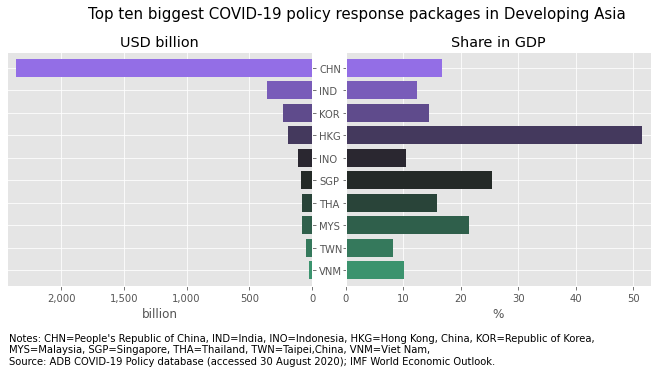

In [1214]:
y0 = df_bar_rank['amount_usd']
y1 = df_bar_rank['pkg_gdp']

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

axs[0].barh(df_bar_rank['country'], y0, align='center', color=sns.diverging_palette(150, 275, s=80, 
                                                                                l=55, n=10,
                                                                                center='dark'))
axs[0].invert_yaxis()
axs[0].set_title('USD billion')
axs[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[0].set_xlabel('billion')
axs[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))

axs[1].barh(df_bar_rank['country'], y1, align='center', color=sns.diverging_palette(150, 275, s=80, 
                                                                                l=55, n=10,
                                                                                center='dark'))
axs[1].invert_yaxis()
axs[1].set_title('Share in GDP')
axs[1].set_xlabel('%')
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))



axs[0].invert_xaxis()
axs[0].set(yticks=df_bar_rank['country'], yticklabels=['CHN', 'IND', 'KOR', 
                                                       'HKG', 'INO', 'SGP',
                                                       'THA', 'MYS', 'TWN', 
                                                       'VNM'][::-1])
axs[0].yaxis.tick_right()

# for key, value in enumerate(y0):
#     axs[0].text(value + 2, key, str(round(value, 1)))
    
# for key, value in enumerate(y1):
#     axs[1].text(value + 2, key, str(round(value/1e9, 1)))

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('Top ten biggest COVID-19 policy response packages in Developing Asia',
             y=1.05, fontsize=15)
plt.annotate('Notes: CHN=People\'s Republic of China, IND=India, INO=Indonesia, HKG=Hong Kong, China, \
KOR=Republic of Korea, \nMYS=Malaysia, SGP=Singapore, THA=Thailand, TWN=Taipei,China, VNM=Viet Nam, \
\nSource: ADB COVID-19 Policy database (accessed 30 August 2020); IMF World Economic Outlook.', 
            xy=(-1.1, -0.2), xycoords='axes fraction', textcoords='offset points', va='top')

    
fig.tight_layout()
fig.subplots_adjust(wspace=0.11)
plt.show()
fig.savefig('total-package-topten.png', dpi=fig.dpi, bbox_inches='tight')

In [1215]:
df_bar_rank2 = df2.loc[asia_region, :].reset_index().sort_values('pkg_gdp')[['country', 'amount_usd', 'pkg_gdp']].tail(10)

In [1216]:
df_bar_rank2

country    amount_usd    pkg_gdp
26                  Kazakhstan  2.379624e+10  13.970997
3            Republic of Korea  2.353862e+11  14.445038
6                       Bhutan  4.305926e+08  15.151040
19                    Thailand  8.409179e+10  15.891051
1                     Mongolia  2.239527e+09  16.422429
2   People's Republic of China  2.358400e+12  16.678690
36            Marshall Islands  4.200000e+07  19.090909
15                    Malaysia  7.844872e+10  21.474972
18                   Singapore  9.212178e+10  25.390631
0             Hong Kong, China  1.918547e+11  51.437105

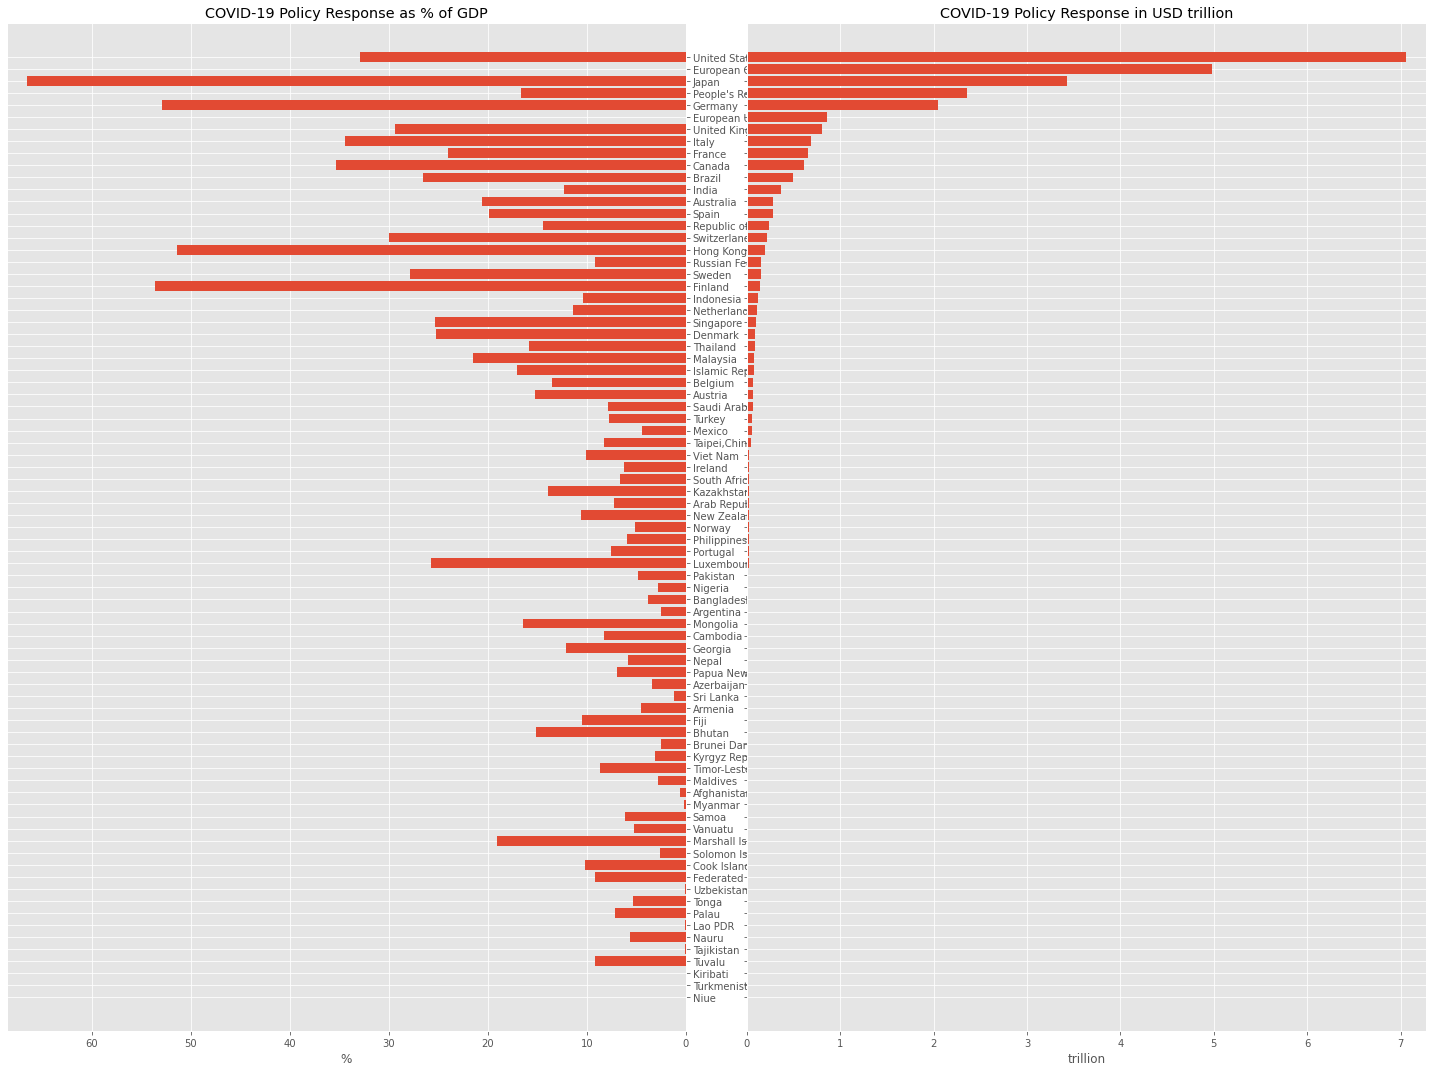

In [1217]:
y0 = df2.groupby(level=1).max().sort_values(by='amount_usd', ascending=True).loc[:, 'pkg_gdp']
y1 = df2.groupby(level=1).max().sort_values(by='amount_usd', ascending=True).loc[:, 'amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(20, 15), sharey=True)

axs[0].barh(y0.index, y0, align='center')
axs[0].invert_yaxis()
axs[0].set_title('COVID-19 Policy Response as % of GDP')
axs[0].set_xlabel('%')

axs[1].barh(y1.index, y1, align='center')
axs[1].invert_yaxis()
axs[1].set_title('COVID-19 Policy Response in USD trillion')
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e12))))
axs[1].set_xlabel('trillion')

axs[0].invert_xaxis()
axs[0].set(yticks=y1.index, yticklabels=y1.index)
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()

In [1218]:
df2.groupby(level=1).max().sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp'].head(10)

country
Japan               66.559742
Finland             53.617710
Germany             52.871380
Hong Kong, China    51.437105
Canada              35.342141
Italy               34.473191
United States       32.915105
Switzerland         30.017144
United Kingdom      29.359792
Sweden              27.860069
Name: pkg_gdp, dtype: float64

Rank region/countries according to policy package

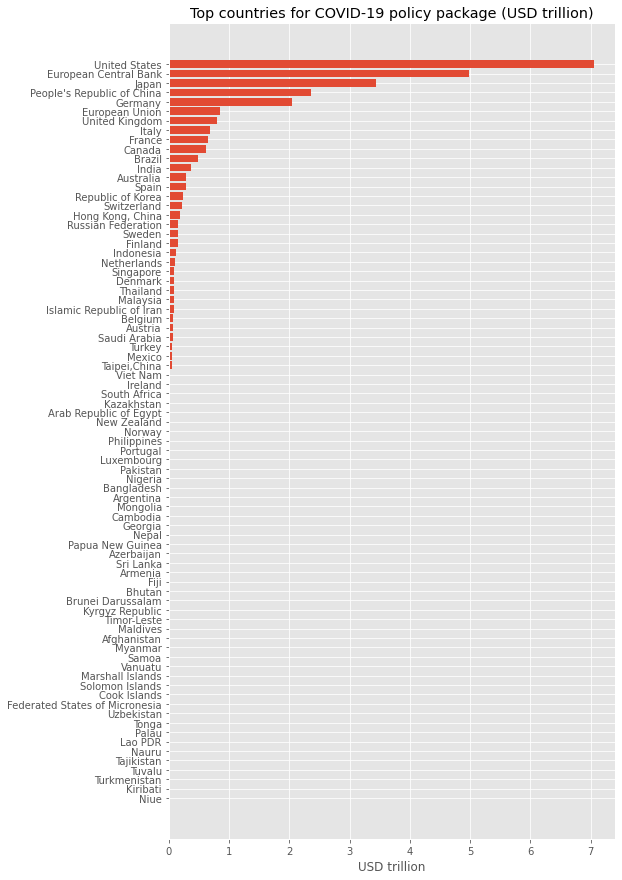

In [1219]:
y = df2.groupby(level=1).max().sort_values(by='amount_usd', ascending=False).loc[:, 'amount_usd']

fig, ax = plt.subplots(figsize=(8, 15))

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top countries for COVID-19 policy package (USD trillion)')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e12))))
ax.set_xlabel('USD trillion')

plt.show()


In [1220]:
mask = df2.reset_index(level=0)['region'].isin(['Other ADB Members', 'Other Economies', 'Others'])

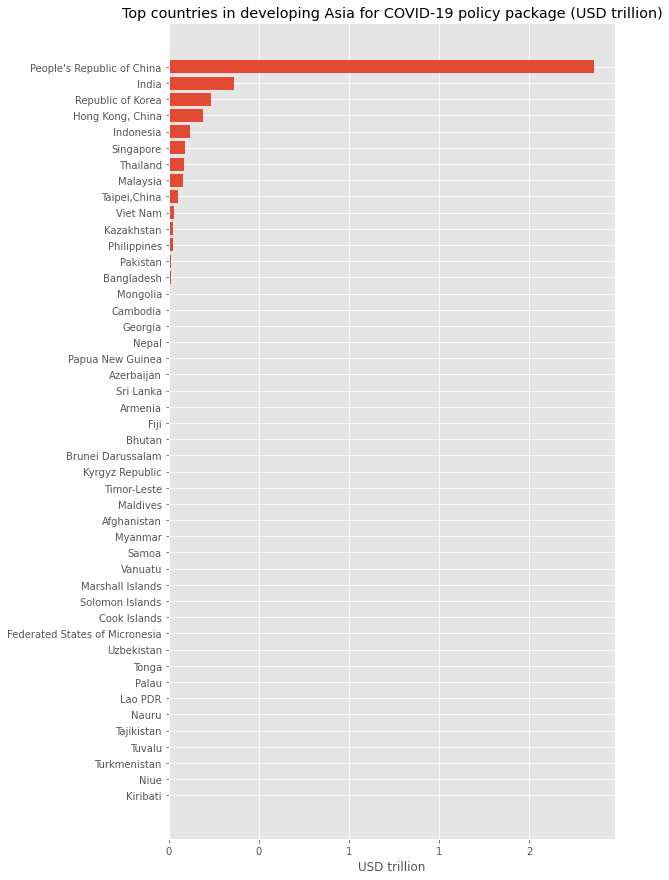

In [1221]:
y = df2.reset_index(level=0)[~mask].sort_values(by='amount_usd', ascending=False).loc[:, 'amount_usd']

fig, ax = plt.subplots(figsize=(8, 15))

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top countries in developing Asia for COVID-19 policy package (USD trillion)')
ax.set_xlabel('USD trillion')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e12))))


plt.show()

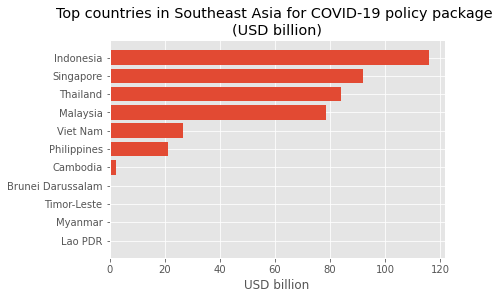

In [1222]:
y = df2.loc['Southeast Asia', 'amount_usd'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top countries in Southeast Asia for COVID-19 policy package \n(USD billion)')
ax.set_xlabel('USD billion')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))

plt.show()

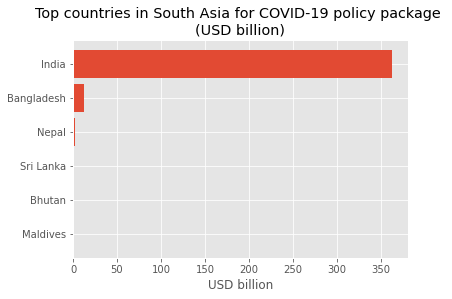

In [1223]:
y = df2.loc['South Asia', 'amount_usd'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top countries in South Asia for COVID-19 policy package \n(USD billion)')
ax.set_xlabel('USD billion')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))


plt.show()

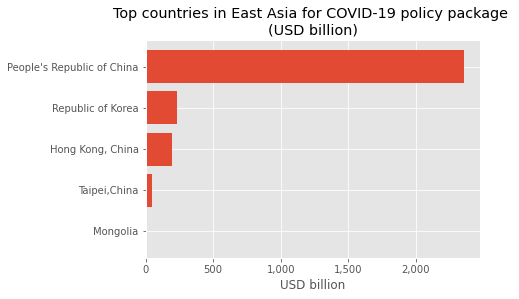

In [1224]:
y = df2.loc['East Asia', 'amount_usd'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top countries in East Asia for COVID-19 policy package \n(USD billion)')
ax.set_xlabel('USD billion')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))


plt.show()

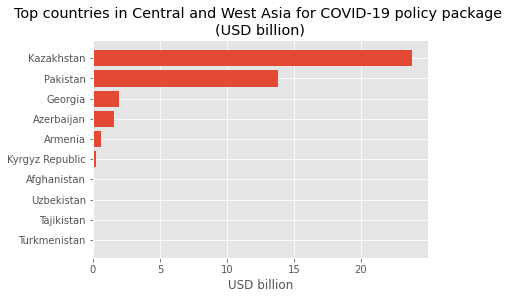

In [1225]:
y = df2.loc['Central and West Asia', 'amount_usd'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top countries in Central and West Asia for COVID-19 policy package \n(USD billion)')
ax.set_xlabel('USD billion')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))


plt.show()

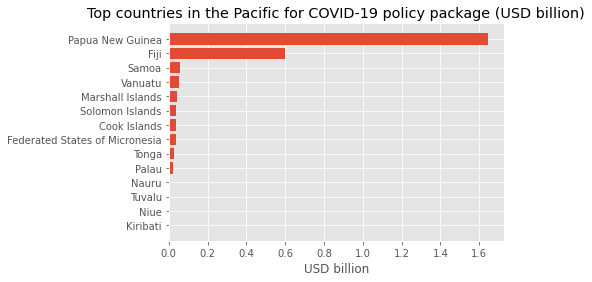

In [1226]:
y = df2.loc['Pacific', 'amount_usd'].sort_values(ascending=False)

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top countries in the Pacific for COVID-19 policy package (USD billion)')
ax.set_xlabel('USD billion')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)/1e9)))

plt.show()

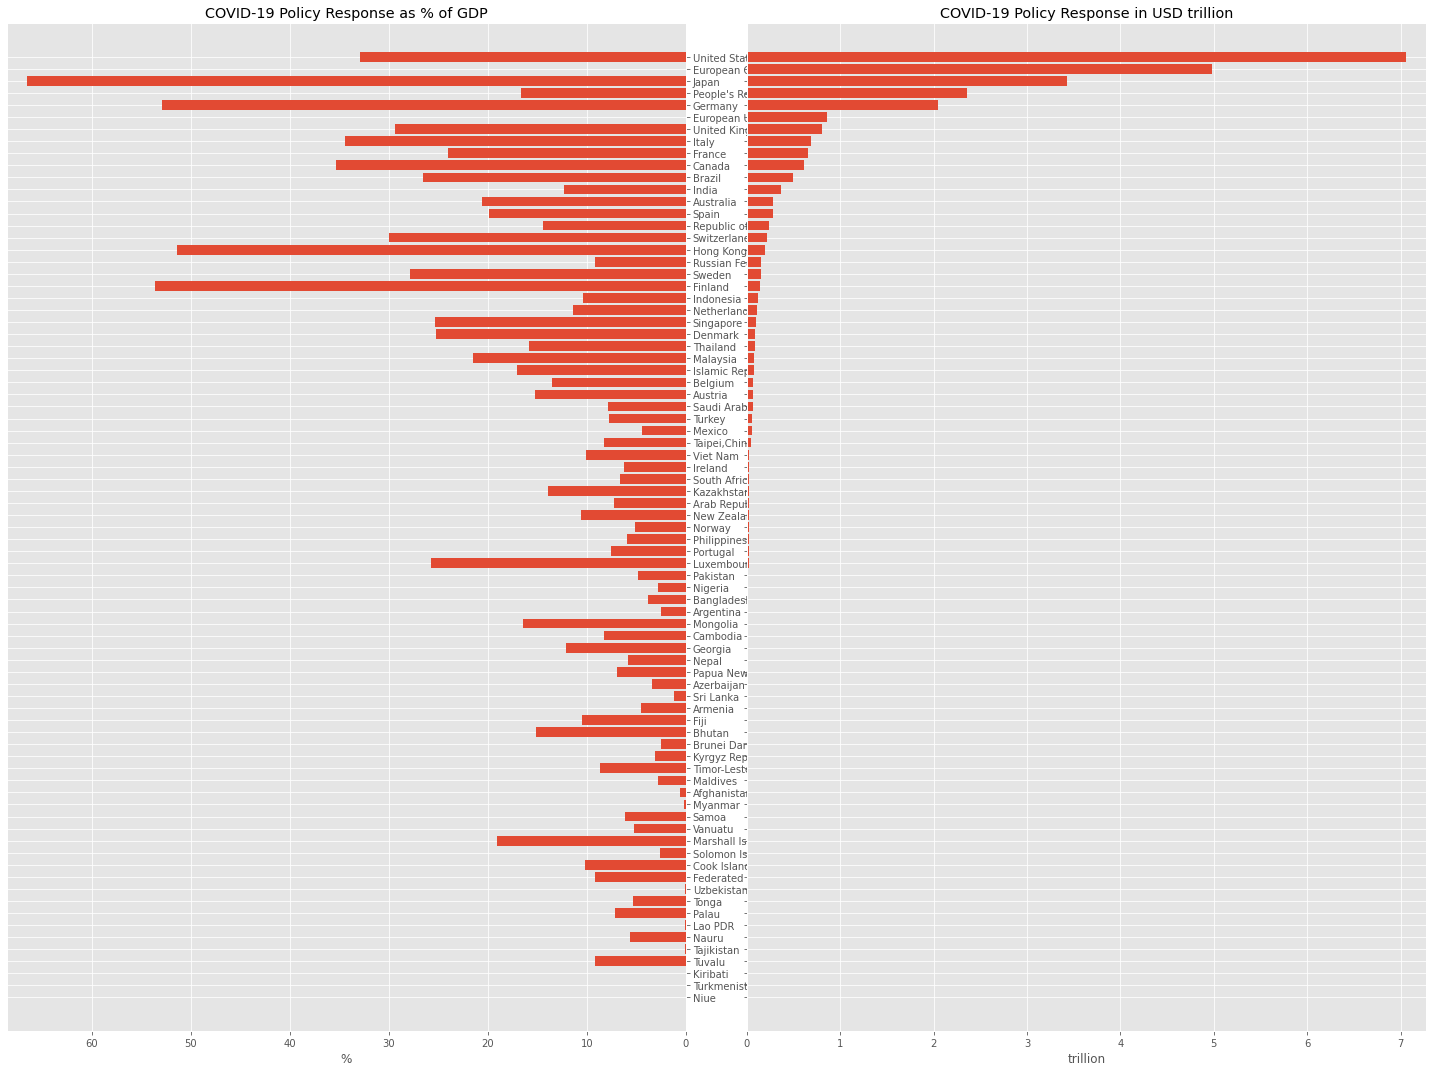

In [1227]:
y0 = df2.groupby(level=1).max().sort_values(by='amount_usd', ascending=True).loc[:, 'pkg_gdp']
y1 = df2.groupby(level=1).max().sort_values(by='amount_usd', ascending=True).loc[:, 'amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(20, 15), sharey=True)

axs[0].barh(y0.index, y0, align='center')
axs[0].invert_yaxis()
axs[0].set_title('COVID-19 Policy Response as % of GDP')
axs[0].set_xlabel('%')

axs[1].barh(y1.index, y1, align='center')
axs[1].invert_yaxis()
axs[1].set_title('COVID-19 Policy Response in USD trillion')
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e12))))
axs[1].set_xlabel('trillion')

axs[0].invert_xaxis()
axs[0].set(yticks=y1.index, yticklabels=y1.index)
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.tight_layout()
fig.subplots_adjust(wspace=0.09)
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:34: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


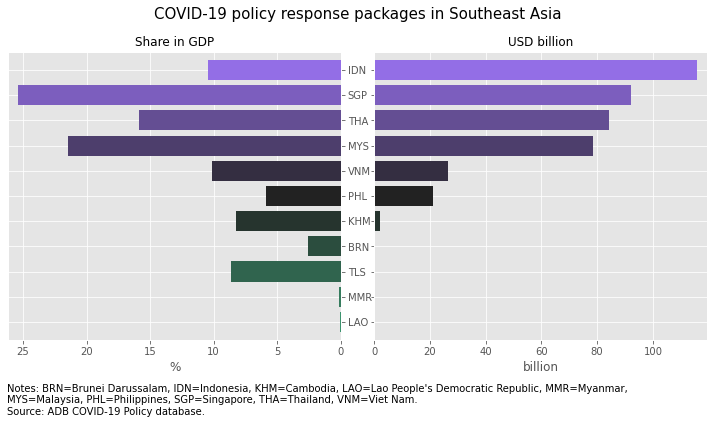

In [1228]:
y0 = df2.loc['Southeast Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'pkg_gdp']
y1 = df2.loc['Southeast Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

axs[0].barh(y0.index, y0, align='center', color=sns.diverging_palette(150, 275, s=80, l=55, n=11,
                                                                     center='dark'))
axs[0].invert_yaxis()
axs[0].set_title('Share in GDP', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.index, y1, align='center', color=sns.diverging_palette(150, 275, s=80, l=55, n=11,
                                                                     center='dark'))
axs[1].invert_yaxis()
axs[1].set_title('USD billion', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y1.index, yticklabels=['IDN', 'SGP', 'THA', 'MYS', 'VNM',
                                         'PHL', 'KHM', 'BRN', 'TLS', 'MMR', 'LAO'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy response packages in Southeast Asia',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
plt.annotate('Notes: BRN=Brunei Darussalam, IDN=Indonesia, KHM=Cambodia, LAO=Lao People\'s Democratic Republic, \
MMR=Myanmar, \nMYS=Malaysia, PHL=Philippines, SGP=Singapore, THA=Thailand, VNM=Viet Nam. \nSource: ADB COVID-19 Policy database.', 
             xy=(-1.1, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [1229]:
y1[::-1]

country
Indonesia            1.157753e+11
Singapore            9.212178e+10
Thailand             8.409179e+10
Malaysia             7.844872e+10
Viet Nam             2.650312e+10
Philippines          2.104562e+10
Cambodia             2.210000e+09
Brunei Darussalam    3.181229e+08
Timor-Leste          2.540000e+08
Myanmar              9.864479e+07
Lao PDR              7.869126e+06
Name: amount_usd, dtype: float64

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:33: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


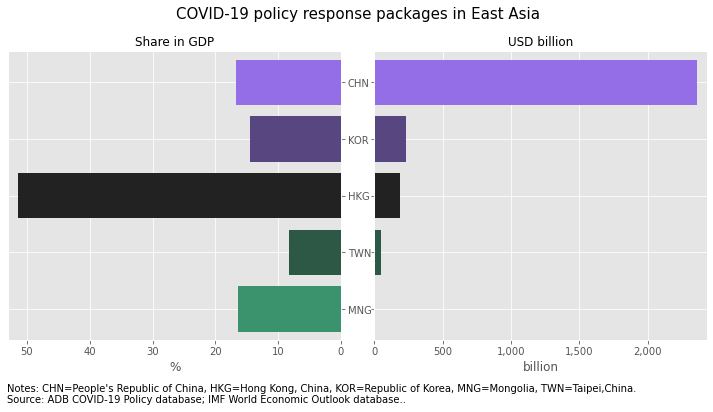

In [1230]:
y0 = df2.loc['East Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'pkg_gdp']
y1 = df2.loc['East Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

axs[0].barh(y0.index, y0, align='center', color=sns.diverging_palette(150, 275, s=80, l=55, n=5,
                                                                     center='dark'))
axs[0].invert_yaxis()
axs[0].set_title('Share in GDP', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.index, y1, align='center', color=sns.diverging_palette(150, 275, s=80, l=55, n=5,
                                                                     center='dark'))
axs[1].invert_yaxis()
axs[1].set_title('USD billion', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y1.index, yticklabels=['CHN', 'KOR', 'HKG', 'TWN', 'MNG'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy response packages in East Asia',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
plt.annotate('Notes: CHN=People\'s Republic of China, HKG=Hong Kong, China, KOR=Republic of Korea, \
MNG=Mongolia, TWN=Taipei,China. \nSource: ADB COVID-19 Policy database; IMF World Economic Outlook database..', 
            xy=(-1.1, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [1231]:
y1[::-1]

country
People's Republic of China    2.358400e+12
Republic of Korea             2.353862e+11
Hong Kong, China              1.918547e+11
Taipei,China                  4.845588e+10
Mongolia                      2.239527e+09
Name: amount_usd, dtype: float64

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:33: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


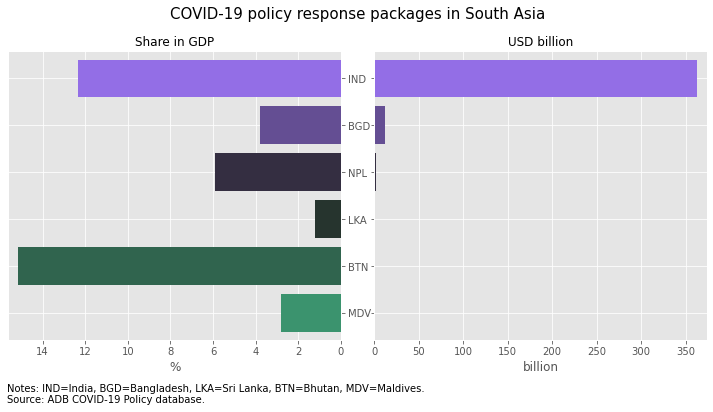

In [1232]:
y0 = df2.loc['South Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'pkg_gdp']
y1 = df2.loc['South Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

axs[0].barh(y0.loc['Maldives':].index, y0.loc['Maldives':], align='center', 
            color=sns.diverging_palette(150, 275, s=80, l=55, n=6, center='dark'))
axs[0].invert_yaxis()
axs[0].set_title('Share in GDP', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.loc['Maldives':].index, y1.loc['Maldives':], align='center', 
            color=sns.diverging_palette(150, 275, s=80, l=55, n=6, center='dark'))
axs[1].invert_yaxis()
axs[1].set_title('USD billion', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y1.loc['Maldives':].index, yticklabels=['IND', 'BGD', 'NPL', 'LKA',
                                                          'BTN', 'MDV'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy response packages in South Asia',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
plt.annotate('Notes: IND=India, BGD=Bangladesh, LKA=Sri Lanka, BTN=Bhutan, MDV=Maldives.\nSource: ADB COVID-19 Policy database.', 
            xy=(-1.1, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [1233]:
y1[::-1]

country
India         3.626838e+11
Bangladesh    1.207846e+10
Nepal         1.754694e+09
Sri Lanka     1.034677e+09
Bhutan        4.305926e+08
Maldives      1.626655e+08
Name: amount_usd, dtype: float64

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:34: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


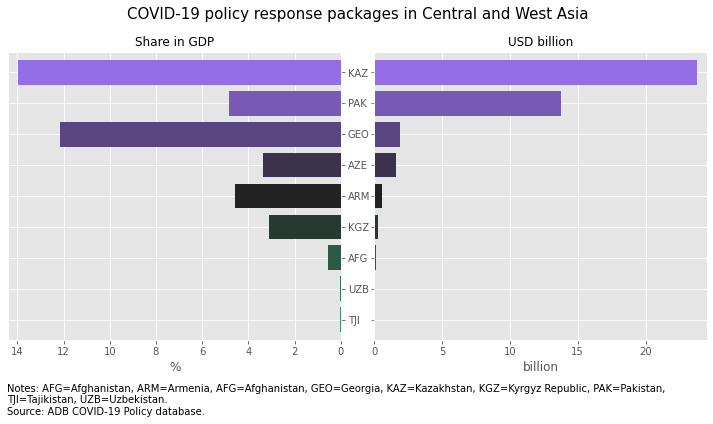

In [1234]:
y0 = df2.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'pkg_gdp']
y1 = df2.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=True).loc[:, 'amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

axs[0].barh(y0.loc['Tajikistan':].index, y0.loc['Tajikistan':], align='center', 
            color=sns.diverging_palette(150, 275, s=80, l=55, n=9, center='dark'))
axs[0].invert_yaxis()
axs[0].set_title('Share in GDP', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.loc['Tajikistan':].index, y1.loc['Tajikistan':], align='center', 
            color=sns.diverging_palette(150, 275, s=80, l=55, n=9, center='dark'))
axs[1].invert_yaxis()
axs[1].set_title('USD billion', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y1.loc['Tajikistan':].index, yticklabels=['KAZ', 'PAK', 'GEO', 'AZE', 'ARM',
                                         'KGZ', 'AFG', 'UZB', 'TJI'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy response packages in Central and West Asia',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
plt.annotate('Notes: AFG=Afghanistan, ARM=Armenia, AFG=Afghanistan, GEO=Georgia, \
KAZ=Kazakhstan, KGZ=Kyrgyz Republic, PAK=Pakistan, \nTJI=Tajikistan, UZB=Uzbekistan. \nSource: ADB COVID-19 Policy database.', 
            xy=(-1.1, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [1235]:
y1[::-1]

country
Kazakhstan         2.379624e+10
Pakistan           1.379443e+10
Georgia            1.936210e+09
Azerbaijan         1.597265e+09
Armenia            6.134861e+08
Kyrgyz Republic    2.580000e+08
Afghanistan        1.016625e+08
Uzbekistan         3.213240e+07
Tajikistan         4.124302e+06
Turkmenistan       0.000000e+00
Name: amount_usd, dtype: float64

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:37: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


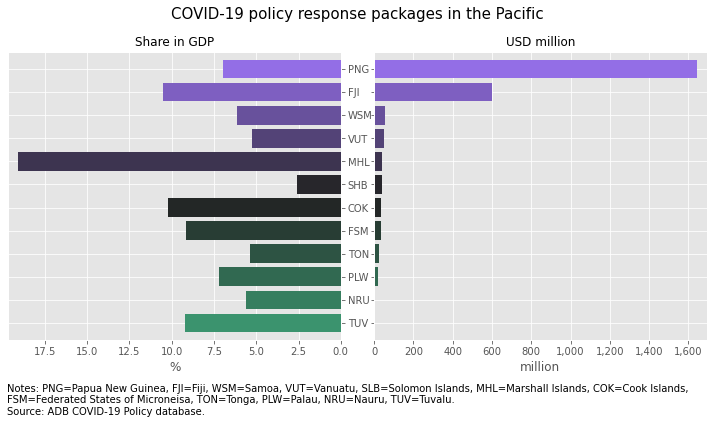

In [1236]:
y0 = df2.loc['Pacific'].sort_values(by='amount_usd', ascending=True).loc[:, 'pkg_gdp']
y1 = df2.loc['Pacific'].sort_values(by='amount_usd', ascending=True).loc[:, 'amount_usd']

fig, axs = plt.subplots(ncols=2, figsize=(10, 5), sharey=True)

axs[0].barh(y0.loc['Tuvalu':].index, y0.loc['Tuvalu':], align='center', 
            color=sns.diverging_palette(150, 275, s=80, l=55, n=12, center='dark'))
axs[0].invert_yaxis()
axs[0].set_title('Share in GDP', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.loc['Tuvalu':].index, y1.loc['Tuvalu':], align='center', 
            color=sns.diverging_palette(150, 275, s=80, l=55, n=12, center='dark'))
axs[1].invert_yaxis()
axs[1].set_title('USD million', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e6))))
axs[1].set_xlabel('million')

axs[0].invert_xaxis()
# axs[0].set(yticks=y1.loc['Tuvalu':].index, yticklabels=y1.loc['Tuvalu':].index)
axs[0].set(yticks=y1.loc['Tuvalu':].index, yticklabels=['PNG', 'FJI', 'WSM', 'VUT', 'MHL',
                                                         'SHB', 'COK', 'FSM', 'TON', 'PLW',
                                                         'NRU', 'TUV'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy response packages in the Pacific',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
plt.annotate('Notes: PNG=Papua New Guinea, FJI=Fiji, WSM=Samoa, VUT=Vanuatu, SLB=Solomon Islands, \
MHL=Marshall Islands, COK=Cook Islands, \nFSM=Federated States of Microneisa, TON=Tonga, PLW=Palau, \
NRU=Nauru, TUV=Tuvalu. \nSource: ADB COVID-19 Policy database.', 
            xy=(-1.1, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [1237]:
y1[::-1]

country
Papua New Guinea                  1.643578e+09
Fiji                              5.990198e+08
Samoa                             5.542740e+07
Vanuatu                           5.014022e+07
Marshall Islands                  4.200000e+07
Solomon Islands                   3.766847e+07
Cook Islands                      3.690260e+07
Federated States of Micronesia    3.500000e+07
Tonga                             2.611964e+07
Palau                             2.091681e+07
Nauru                             6.072931e+06
Tuvalu                            3.863318e+06
Niue                              0.000000e+00
Kiribati                          0.000000e+00
Name: amount_usd, dtype: float64

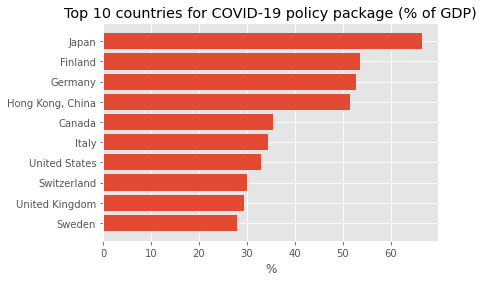

In [1238]:
y = df2.groupby(level=1).max().sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp'].head(10)

fig, ax = plt.subplots()

ax.barh(y.index, y)
ax.invert_yaxis()
ax.set_title('Top 10 countries for COVID-19 policy package (% of GDP)')
ax.set_xlabel('%')

plt.show()


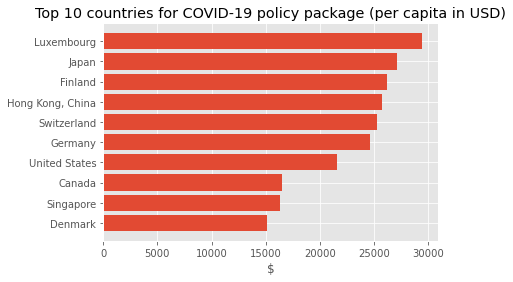

In [1239]:
y = df2.groupby(level=1).max().sort_values(by='pkg_pc_usd', ascending=False).loc[:, 'pkg_pc_usd'].head(10)

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('Top 10 countries for COVID-19 policy package (per capita in USD)')
ax.set_xlabel('$')

plt.show()

In [1240]:
df2.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

country
Singapore            25.390631
Malaysia             21.474972
Thailand             15.891051
Indonesia            10.414161
Viet Nam             10.129729
Timor-Leste           8.645337
Cambodia              8.267864
Philippines           5.898206
Brunei Darussalam     2.554178
Myanmar               0.149475
Lao PDR               0.041141
Name: pkg_gdp, dtype: float64

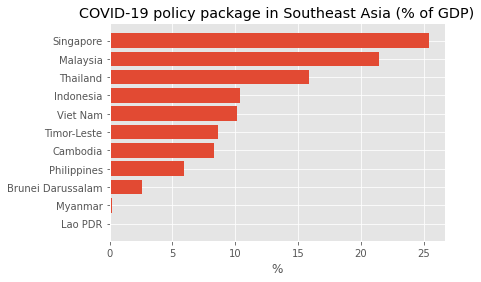

In [1241]:
y = df2.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('COVID-19 policy package in Southeast Asia (% of GDP)')
ax.set_xlabel('%')

plt.show()

In [1242]:
df2.index.levels[0]

Index(['Central and West Asia', 'East Asia', 'Other ADB Members',
       'Other Economies', 'Others', 'Pacific', 'South Asia', 'Southeast Asia'],
      dtype='object', name='region')

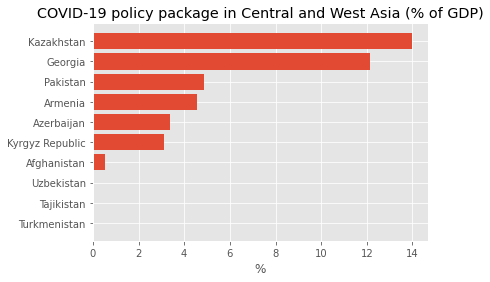

In [1243]:
y = df2.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('COVID-19 policy package in Central and West Asia (% of GDP)')
ax.set_xlabel('%')

plt.show()

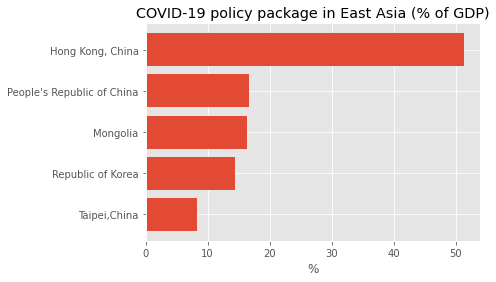

In [1244]:
y = df2.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('COVID-19 policy package in East Asia (% of GDP)')
ax.set_xlabel('%')

plt.show()

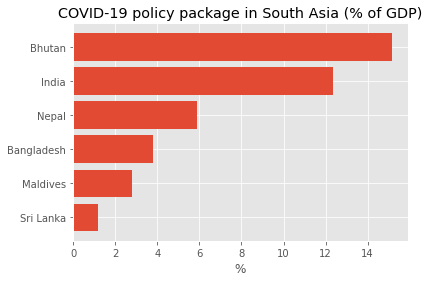

In [1245]:
y = df2.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('COVID-19 policy package in South Asia (% of GDP)')
ax.set_xlabel('%')

plt.show()

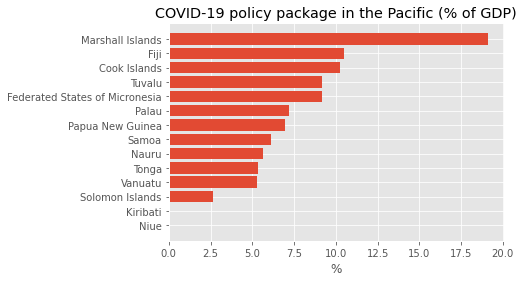

In [1246]:
y = df2.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']

fig, ax = plt.subplots()

ax.barh(y.index, y, )
ax.invert_yaxis()
ax.set_title('COVID-19 policy package in the Pacific (% of GDP)')
ax.set_xlabel('%')

plt.show()

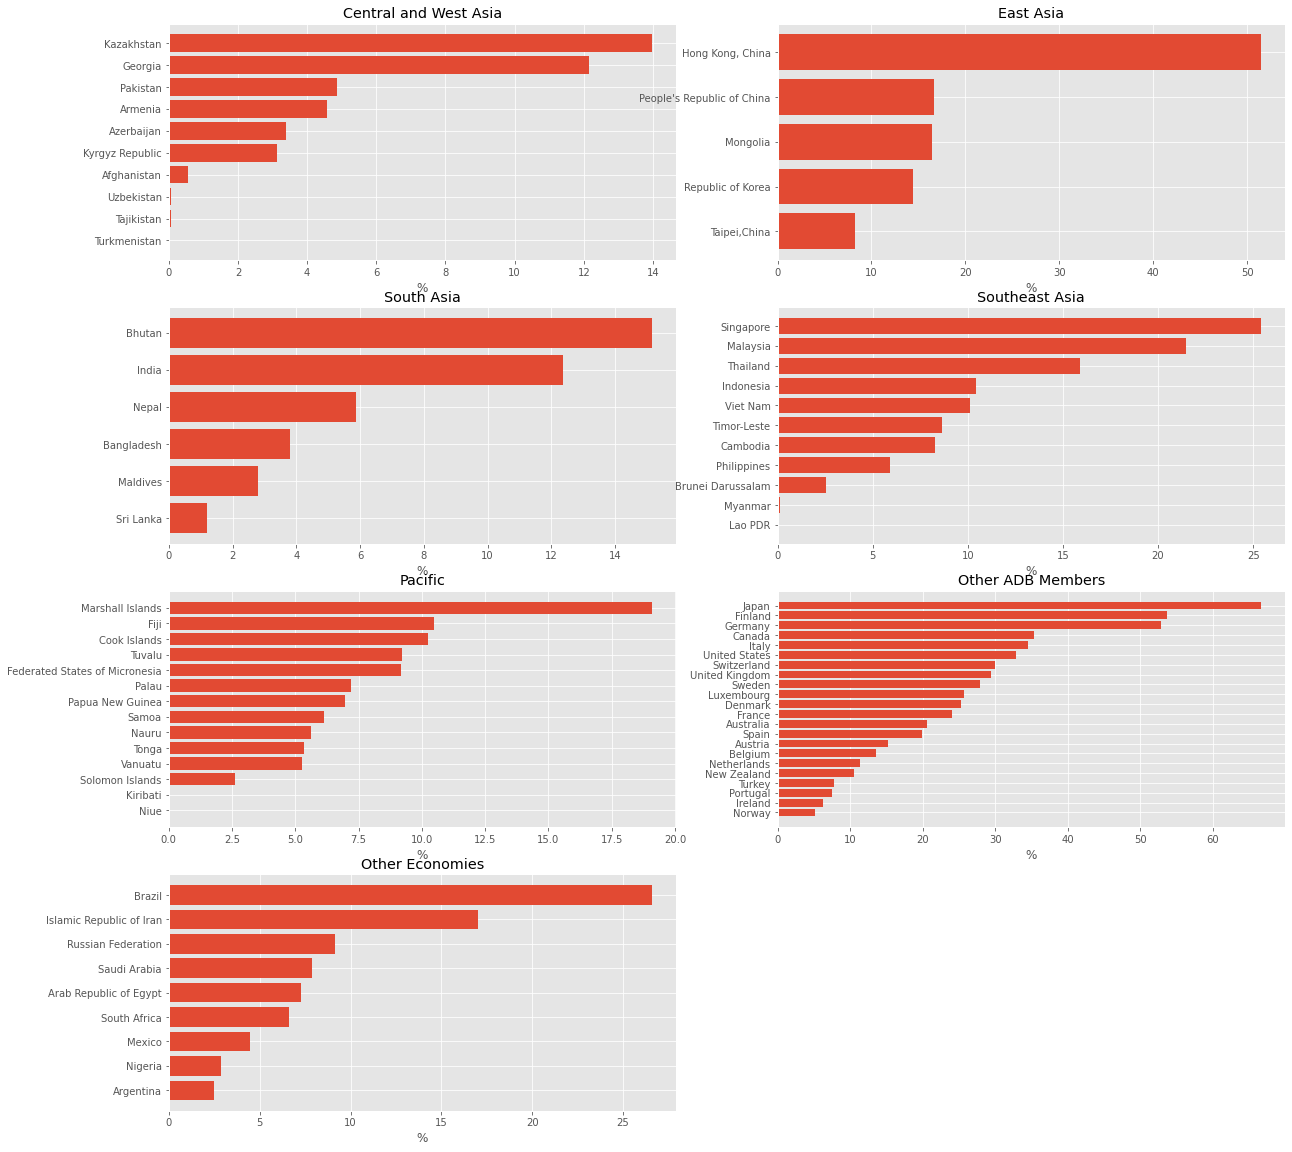

In [1247]:
fig, axs= plt.subplots(nrows=4, ncols=2, figsize=(20, 20))

y = df2.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[0, 0].barh(y.index, y, )
axs[0, 0].invert_yaxis()
axs[0, 0].set_title('Central and West Asia')
axs[0, 0].set_xlabel('%')

y = df2.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[0, 1].barh(y.index, y, )
axs[0, 1].invert_yaxis()
axs[0, 1].set_title('East Asia')
axs[0, 1].set_xlabel('%')

y = df2.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[1, 0].barh(y.index, y, )
axs[1, 0].invert_yaxis()
axs[1, 0].set_title('South Asia')
axs[1, 0].set_xlabel('%')

y = df2.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[1, 1].barh(y.index, y, )
axs[1, 1].invert_yaxis()
axs[1, 1].set_title('Southeast Asia')
axs[1, 1].set_xlabel('%')

y = df2.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[2, 0].barh(y.index, y, )
axs[2, 0].invert_yaxis()
axs[2, 0].set_title('Pacific')
axs[2, 0].set_xlabel('%')

y = df2.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[2, 1].barh(y.index, y, )
axs[2, 1].invert_yaxis()
axs[2, 1].set_title('Other ADB Members')
axs[2, 1].set_xlabel('%')

y = df2.loc['Other Economies'].sort_values(by='pkg_gdp', ascending=False).loc[:, 'pkg_gdp']
axs[3, 0].barh(y.index, y, )
axs[3, 0].invert_yaxis()
axs[3, 0].set_title('Other Economies')
axs[3, 0].set_xlabel('%')

axs[3, 1].axis('off')

plt.show()

In [1248]:
df2.reset_index(level=0)

region    amount_lcy    amount_usd       gdp_lcy  \
country                                                                        
Afghanistan  Central and West Asia  8.000000e+09  1.016625e+08  1.502470e+12   
Armenia      Central and West Asia  3.000000e+11  6.134861e+08  6.541000e+12   
Azerbaijan   Central and West Asia  2.715350e+09  1.597265e+09  8.019100e+10   
Georgia      Central and West Asia  5.887498e+09  1.936210e+09  4.474900e+10   
Kazakhstan   Central and West Asia  9.810000e+12  2.379624e+10  6.543920e+13   
...                            ...           ...           ...           ...   
Philippines         Southeast Asia  1.071298e+12  2.104562e+10  1.873280e+13   
Singapore           Southeast Asia  1.304905e+11  9.212178e+10  4.980840e+11   
Thailand            Southeast Asia  2.700000e+12  8.409179e+10  1.692200e+13   
Timor-Leste         Southeast Asia  2.540000e+08  2.540000e+08  2.938000e+09   
Viet Nam            Southeast Asia  6.158000e+14  2.650312e+10  6.085060e+15   

                  gdp_usd         popn    pkg_gdp    pkg_pc_usd  
country                                                          
Afghanistan  1.873400e+10   37172386.0   0.542663      2.734893  
Armenia      1.344400e+10    2951776.0   4.563271    207.836264  
Azerbaijan   4.717100e+10    9942334.0   3.386116    160.652892  
Georgia      1.592500e+10    3731000.0  12.158308    518.952156  
Kazakhstan   1.703260e+11   18276499.0  13.970997   1302.013047  
...                   ...          ...        ...           ...  
Philippines  3.568140e+11  106651922.0   5.898206    197.329997  
Singapore    3.628180e+11    5638676.0  25.390631  16337.484018  
Thailand     5.291770e+11   69428524.0  15.891051   1211.199412  
Timor-Leste  2.938000e+09    1267972.0   8.645337    200.319881  
Viet Nam     2.616370e+11   95540395.0  10.129729    277.402247  

[79 rows x 8 columns]

In [1249]:
df2

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.715350e+09  1.597265e+09  8.019100e+10   
                      Georgia      5.887498e+09  1.936210e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.386116   
                      Georgia      1.592500e+10    3731000.0  12.158308   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd  
region                country                    
Central and West Asia Afghanistan      2.734893  
                      Armenia        207.836264  
                      Azerbaijan     160.652892  
                      Georgia        518.952156  
                      Kazakhstan    1302.013047  
...                                         ...  
Southeast Asia        Philippines    197.329997  
                      Singapore    16337.484018  
                      Thailand      1211.199412  
                      Timor-Leste    200.319881  
                      Viet Nam       277.402247  

[79 rows x 7 columns]

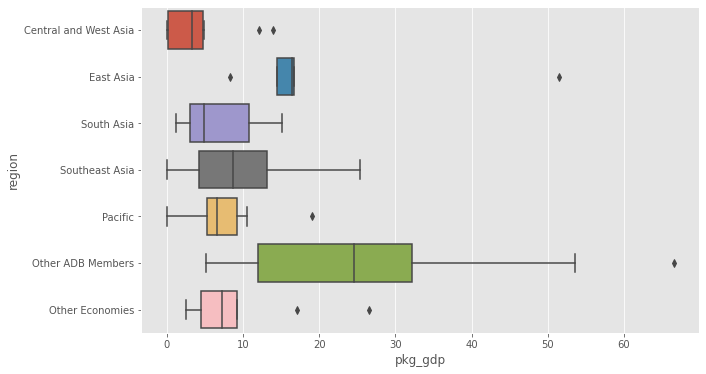

In [1250]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(x=df2.reset_index(level=0)['pkg_gdp'], 
            y=df2.reset_index(level=0)['region'],
            order=['Central and West Asia', 'East Asia', 'South Asia', 'Southeast Asia', 'Pacific', 
                   'Other ADB Members', 'Other Economies'])

plt.show()

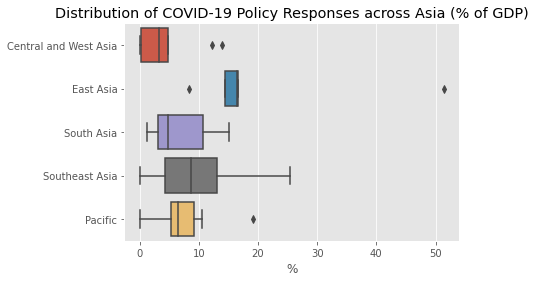

In [1251]:
fig, ax = plt.subplots()

sns.boxplot(x=df2.reset_index(level=0)['pkg_gdp'], 
            y=df2.reset_index(level=0)['region'],
            order=['Central and West Asia', 'East Asia', 'South Asia', 'Southeast Asia', 'Pacific'])

ax.set(title='Distribution of COVID-19 Policy Responses across Asia (% of GDP)',
       ylabel='', xlabel='%')

plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:17: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


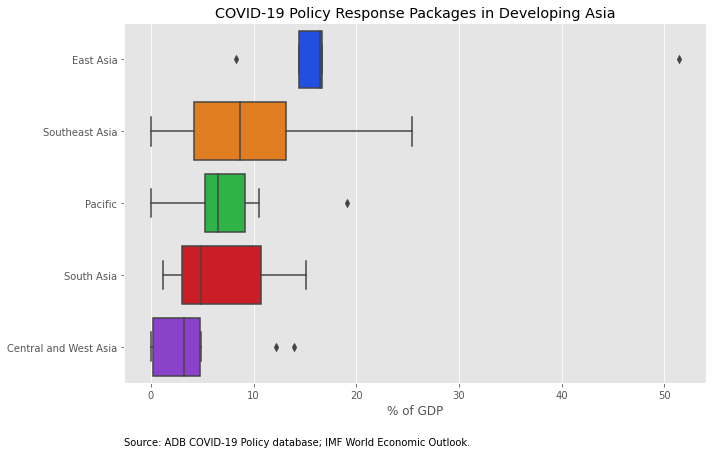

In [1252]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(x=df2.reset_index(level=0)['pkg_gdp'], 
            y=df2.reset_index(level=0)['region'],
            palette=sns.color_palette('bright'),
            order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'],
            )
# sns.swarmplot(x=df2.reset_index(level=0)['pkg_gdp'], 
#               y=df2.reset_index(level=0)['region'],
#               order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'],
#               color=".25")

ax.set(title='COVID-19 Policy Response Packages in Developing Asia',
       ylabel='', xlabel='% of GDP')
fig.tight_layout()
plt.annotate('Source: ADB COVID-19 Policy database; IMF World Economic Outlook.', 
            xy=(-0, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:16: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  app.launch_new_instance()


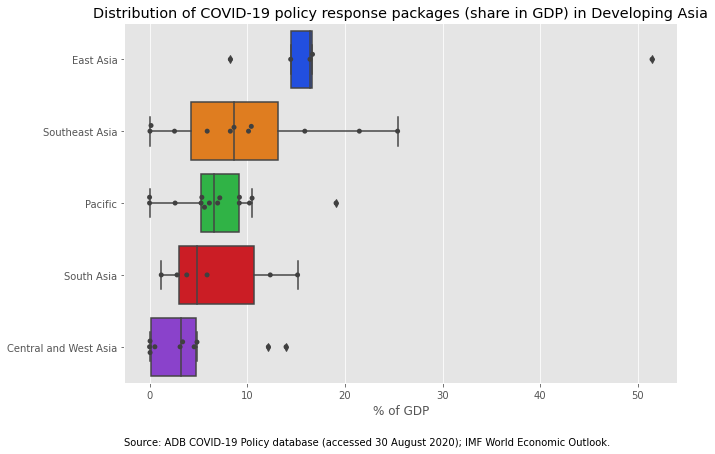

In [1253]:
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot(x=df2.reset_index(level=0)['pkg_gdp'], 
            y=df2.reset_index(level=0)['region'],
            palette=sns.color_palette('bright'),
            order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'])
sns.swarmplot(x=df2.reset_index(level=0)['pkg_gdp'], 
              y=df2.reset_index(level=0)['region'],
              order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'],
              color=".25")

ax.set(title='Distribution of COVID-19 policy response packages (share in GDP) in Developing Asia',
       ylabel='', xlabel='% of GDP')
fig.tight_layout()
plt.annotate('Source: ADB COVID-19 Policy database (accessed 30 August 2020); IMF World Economic Outlook.', 
            xy=(-0, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()
fig.savefig('total-package-boxplot.png', bbox_inches='tight', dpi=fig.dpi)

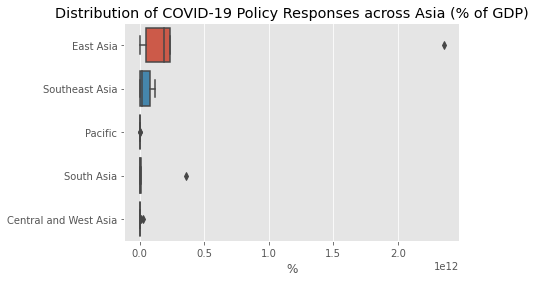

In [1254]:
fig, ax = plt.subplots()

sns.boxplot(x=df2.reset_index(level=0)['amount_usd'], 
            y=df2.reset_index(level=0)['region'],
            order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'],
            )
# sns.swarmplot(x=df2.reset_index(level=0)['pkg_gdp'], 
#               y=df2.reset_index(level=0)['region'],
#               order=['East Asia', 'Southeast Asia', 'Pacific', 'South Asia', 'Central and West Asia'],
#               color=".25")

ax.set(title='Distribution of COVID-19 Policy Responses across Asia (% of GDP)',
       ylabel='', xlabel='%')

plt.show()

In [1255]:
measures = [1, 2, 3, 4, 5, 9, 10]

m1 = df1[df1.measure_id.isin([measures[0]])].groupby(level=1).sum().loc[:, 'amount_usd']
m2 = df1[df1.measure_id.isin([measures[1]])].groupby(level=1).sum().loc[:, 'amount_usd']
m3 = df1[df1.measure_id.isin([measures[2]])].groupby(level=1).sum().loc[:, 'amount_usd']
m4 = df1[df1.measure_id.isin([measures[3]])].groupby(level=1).sum().loc[:, 'amount_usd']
m5 = df1[df1.measure_id.isin([measures[4]])].groupby(level=1).sum().loc[:, 'amount_usd']
m9 = df1[df1.measure_id.isin([measures[5]])].groupby(level=1).sum().loc[:, 'amount_usd']
m10 = df1[df1.measure_id.isin([measures[6]])].groupby(level=1).sum().loc[:, 'amount_usd']


In [1256]:
pd.concat([m1, m2, m3, m4, m5, m9, m10], axis=1)

amount_usd    amount_usd    amount_usd  \
country                                                            
Afghanistan             0.000000e+00  0.000000e+00  0.000000e+00   
Arab Republic of Egypt  0.000000e+00  6.872427e+09  6.999694e+09   
Argentina               5.466135e+09  4.940239e+08  5.596813e+08   
Armenia                 0.000000e+00  5.112384e+07  0.000000e+00   
Australia               0.000000e+00  9.016100e+10  0.000000e+00   
...                              ...           ...           ...   
United Kingdom          2.971175e+10  1.238100e+11  6.438132e+08   
United States           4.401370e+11  3.210060e+12  7.688180e+11   
Uzbekistan              0.000000e+00  0.000000e+00  0.000000e+00   
Vanuatu                 0.000000e+00  0.000000e+00  1.274751e+07   
Viet Nam                0.000000e+00  0.000000e+00  1.360017e+10   

                          amount_usd    amount_usd    amount_usd    amount_usd  
country                                                                         
Afghanistan             0.000000e+00  1.016625e+08  0.000000e+00  0.000000e+00  
Arab Republic of Egypt  1.272672e+09  6.839337e+09  0.000000e+00  0.000000e+00  
Argentina               0.000000e+00  2.376637e+09  0.000000e+00  2.161275e+09  
Armenia                 0.000000e+00  6.134861e+07  0.000000e+00  5.010136e+08  
Australia               0.000000e+00  1.929350e+11  1.741040e+08  0.000000e+00  
...                              ...           ...           ...           ...  
United Kingdom          0.000000e+00  2.419060e+11  1.857522e+08  4.092550e+11  
United States           0.000000e+00  1.696040e+12  9.417790e+11  0.000000e+00  
Uzbekistan              0.000000e+00  3.213240e+07  0.000000e+00  0.000000e+00  
Vanuatu                 0.000000e+00  3.739271e+07  0.000000e+00  0.000000e+00  
Viet Nam                0.000000e+00  1.290295e+10  0.000000e+00  0.000000e+00  

[79 rows x 7 columns]

In [1257]:
df3 = pd.concat([m1, m2, m3, m4, m5, m9, m10], axis=1)

In [1258]:
df3.columns = ['m1', 'm2', 'm3', 'm4', 'm5', 'm9', 'm10']

In [1259]:
df3

m1            m2            m3  \
country                                                            
Afghanistan             0.000000e+00  0.000000e+00  0.000000e+00   
Arab Republic of Egypt  0.000000e+00  6.872427e+09  6.999694e+09   
Argentina               5.466135e+09  4.940239e+08  5.596813e+08   
Armenia                 0.000000e+00  5.112384e+07  0.000000e+00   
Australia               0.000000e+00  9.016100e+10  0.000000e+00   
...                              ...           ...           ...   
United Kingdom          2.971175e+10  1.238100e+11  6.438132e+08   
United States           4.401370e+11  3.210060e+12  7.688180e+11   
Uzbekistan              0.000000e+00  0.000000e+00  0.000000e+00   
Vanuatu                 0.000000e+00  0.000000e+00  1.274751e+07   
Viet Nam                0.000000e+00  0.000000e+00  1.360017e+10   

                                  m4            m5            m9           m10  
country                                                                         
Afghanistan             0.000000e+00  1.016625e+08  0.000000e+00  0.000000e+00  
Arab Republic of Egypt  1.272672e+09  6.839337e+09  0.000000e+00  0.000000e+00  
Argentina               0.000000e+00  2.376637e+09  0.000000e+00  2.161275e+09  
Armenia                 0.000000e+00  6.134861e+07  0.000000e+00  5.010136e+08  
Australia               0.000000e+00  1.929350e+11  1.741040e+08  0.000000e+00  
...                              ...           ...           ...           ...  
United Kingdom          0.000000e+00  2.419060e+11  1.857522e+08  4.092550e+11  
United States           0.000000e+00  1.696040e+12  9.417790e+11  0.000000e+00  
Uzbekistan              0.000000e+00  3.213240e+07  0.000000e+00  0.000000e+00  
Vanuatu                 0.000000e+00  3.739271e+07  0.000000e+00  0.000000e+00  
Viet Nam                0.000000e+00  1.290295e+10  0.000000e+00  0.000000e+00  

[79 rows x 7 columns]

In [1260]:
df2

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.715350e+09  1.597265e+09  8.019100e+10   
                      Georgia      5.887498e+09  1.936210e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.386116   
                      Georgia      1.592500e+10    3731000.0  12.158308   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd  
region                country                    
Central and West Asia Afghanistan      2.734893  
                      Armenia        207.836264  
                      Azerbaijan     160.652892  
                      Georgia        518.952156  
                      Kazakhstan    1302.013047  
...                                         ...  
Southeast Asia        Philippines    197.329997  
                      Singapore    16337.484018  
                      Thailand      1211.199412  
                      Timor-Leste    200.319881  
                      Viet Nam       277.402247  

[79 rows x 7 columns]

In [1261]:
df3 = df2.reset_index(level=0).join(df3)

In [1262]:
df3

region    amount_lcy    amount_usd       gdp_lcy  \
country                                                                        
Afghanistan  Central and West Asia  8.000000e+09  1.016625e+08  1.502470e+12   
Armenia      Central and West Asia  3.000000e+11  6.134861e+08  6.541000e+12   
Azerbaijan   Central and West Asia  2.715350e+09  1.597265e+09  8.019100e+10   
Georgia      Central and West Asia  5.887498e+09  1.936210e+09  4.474900e+10   
Kazakhstan   Central and West Asia  9.810000e+12  2.379624e+10  6.543920e+13   
...                            ...           ...           ...           ...   
Philippines         Southeast Asia  1.071298e+12  2.104562e+10  1.873280e+13   
Singapore           Southeast Asia  1.304905e+11  9.212178e+10  4.980840e+11   
Thailand            Southeast Asia  2.700000e+12  8.409179e+10  1.692200e+13   
Timor-Leste         Southeast Asia  2.540000e+08  2.540000e+08  2.938000e+09   
Viet Nam            Southeast Asia  6.158000e+14  2.650312e+10  6.085060e+15   

                  gdp_usd         popn    pkg_gdp    pkg_pc_usd            m1  \
country                                                                         
Afghanistan  1.873400e+10   37172386.0   0.542663      2.734893  0.000000e+00   
Armenia      1.344400e+10    2951776.0   4.563271    207.836264  0.000000e+00   
Azerbaijan   4.717100e+10    9942334.0   3.386116    160.652892  0.000000e+00   
Georgia      1.592500e+10    3731000.0  12.158308    518.952156  2.700000e+08   
Kazakhstan   1.703260e+11   18276499.0  13.970997   1302.013047  4.244997e+09   
...                   ...          ...        ...           ...           ...   
Philippines  3.568140e+11  106651922.0   5.898206    197.329997  5.200693e+09   
Singapore    3.628180e+11    5638676.0  25.390631  16337.484018  2.823862e+09   
Thailand     5.291770e+11   69428524.0  15.891051   1211.199412  0.000000e+00   
Timor-Leste  2.938000e+09    1267972.0   8.645337    200.319881  0.000000e+00   
Viet Nam     2.616370e+11   95540395.0  10.129729    277.402247  0.000000e+00   

                       m2            m3            m4            m5  \
country                                                               
Afghanistan  0.000000e+00  0.000000e+00  0.000000e+00  1.016625e+08   
Armenia      5.112384e+07  0.000000e+00  0.000000e+00  6.134861e+07   
Azerbaijan   2.941176e+08  0.000000e+00  0.000000e+00  7.099118e+08   
Georgia      3.058474e+08  0.000000e+00  0.000000e+00  1.195929e+09   
Kazakhstan   0.000000e+00  8.732565e+08  0.000000e+00  1.867799e+10   
...                   ...           ...           ...           ...   
Philippines  2.357397e+09  3.637857e+08  0.000000e+00  1.027523e+10   
Singapore    0.000000e+00  2.096717e+10  3.741617e+09  5.158913e+10   
Thailand     2.647334e+10  1.401530e+10  0.000000e+00  4.360315e+10   
Timor-Leste  4.000000e+06  0.000000e+00  0.000000e+00  1.500000e+08   
Viet Nam     0.000000e+00  1.360017e+10  0.000000e+00  1.290295e+10   

                       m9           m10  
country                                  
Afghanistan  0.000000e+00  0.000000e+00  
Armenia      0.000000e+00  5.010136e+08  
Azerbaijan   5.000000e+06  5.882353e+08  
Georgia      0.000000e+00  1.644341e+08  
Kazakhstan   0.000000e+00  0.000000e+00  
...                   ...           ...  
Philippines  0.000000e+00  2.848522e+09  
Singapore    1.300000e+10  0.000000e+00  
Thailand     0.000000e+00  0.000000e+00  
Timor-Leste  0.000000e+00  1.000000e+08  
Viet Nam     0.000000e+00  0.000000e+00  

[79 rows x 15 columns]

In [1263]:
df3 = df3.assign(m1_pkg = lambda x: 100 * x.m1 / x.amount_usd)
df3 = df3.assign(m2_pkg = lambda x: 100 * x.m2 / x.amount_usd)
df3 = df3.assign(m3_pkg = lambda x: 100 * x.m3 / x.amount_usd)
df3 = df3.assign(m4_pkg = lambda x: 100 * x.m4 / x.amount_usd)
df3 = df3.assign(m5_pkg = lambda x: 100 * x.m5 / x.amount_usd)
df3 = df3.assign(m9_pkg = lambda x: 100 * x.m9 / x.amount_usd)
df3 = df3.assign(m10_pkg = lambda x: 100 * x.m10 / x.amount_usd)

df3 = df3.assign(m1_gdp = lambda x: 100 * x.m1 / x.gdp_usd)
df3 = df3.assign(m2_gdp = lambda x: 100 * x.m2 / x.gdp_usd)
df3 = df3.assign(m3_gdp = lambda x: 100 * x.m3 / x.gdp_usd)
df3 = df3.assign(m4_gdp = lambda x: 100 * x.m4 / x.gdp_usd)
df3 = df3.assign(m5_gdp = lambda x: 100 * x.m5 / x.gdp_usd)
df3 = df3.assign(m9_gdp = lambda x: 100 * x.m9 / x.gdp_usd)
df3 = df3.assign(m10_gdp = lambda x: 100 * x.m10 / x.gdp_usd)

In [1264]:
df3

region    amount_lcy    amount_usd       gdp_lcy  \
country                                                                        
Afghanistan  Central and West Asia  8.000000e+09  1.016625e+08  1.502470e+12   
Armenia      Central and West Asia  3.000000e+11  6.134861e+08  6.541000e+12   
Azerbaijan   Central and West Asia  2.715350e+09  1.597265e+09  8.019100e+10   
Georgia      Central and West Asia  5.887498e+09  1.936210e+09  4.474900e+10   
Kazakhstan   Central and West Asia  9.810000e+12  2.379624e+10  6.543920e+13   
...                            ...           ...           ...           ...   
Philippines         Southeast Asia  1.071298e+12  2.104562e+10  1.873280e+13   
Singapore           Southeast Asia  1.304905e+11  9.212178e+10  4.980840e+11   
Thailand            Southeast Asia  2.700000e+12  8.409179e+10  1.692200e+13   
Timor-Leste         Southeast Asia  2.540000e+08  2.540000e+08  2.938000e+09   
Viet Nam            Southeast Asia  6.158000e+14  2.650312e+10  6.085060e+15   

                  gdp_usd         popn    pkg_gdp    pkg_pc_usd            m1  \
country                                                                         
Afghanistan  1.873400e+10   37172386.0   0.542663      2.734893  0.000000e+00   
Armenia      1.344400e+10    2951776.0   4.563271    207.836264  0.000000e+00   
Azerbaijan   4.717100e+10    9942334.0   3.386116    160.652892  0.000000e+00   
Georgia      1.592500e+10    3731000.0  12.158308    518.952156  2.700000e+08   
Kazakhstan   1.703260e+11   18276499.0  13.970997   1302.013047  4.244997e+09   
...                   ...          ...        ...           ...           ...   
Philippines  3.568140e+11  106651922.0   5.898206    197.329997  5.200693e+09   
Singapore    3.628180e+11    5638676.0  25.390631  16337.484018  2.823862e+09   
Thailand     5.291770e+11   69428524.0  15.891051   1211.199412  0.000000e+00   
Timor-Leste  2.938000e+09    1267972.0   8.645337    200.319881  0.000000e+00   
Viet Nam     2.616370e+11   95540395.0  10.129729    277.402247  0.000000e+00   

                       m2  ...      m5_pkg     m9_pkg    m10_pkg    m1_gdp  \
country                    ...                                               
Afghanistan  0.000000e+00  ...  100.000000   0.000000   0.000000  0.000000   
Armenia      5.112384e+07  ...   10.000000   0.000000  81.666667  0.000000   
Azerbaijan   2.941176e+08  ...   44.445467   0.313035  36.827665  0.000000   
Georgia      3.058474e+08  ...   61.766478   0.000000   8.492572  1.695447   
Kazakhstan   0.000000e+00  ...   78.491335   0.000000   0.000000  2.492278   
...                   ...  ...         ...        ...        ...       ...   
Philippines  2.357397e+09  ...   48.823577   0.000000  13.534983  1.457536   
Singapore    0.000000e+00  ...   56.001012  14.111755   0.000000  0.778314   
Thailand     2.647334e+10  ...   51.851852   0.000000   0.000000  0.000000   
Timor-Leste  4.000000e+06  ...   59.055118   0.000000  39.370079  0.000000   
Viet Nam     0.000000e+00  ...   48.684638   0.000000   0.000000  0.000000   

               m2_gdp    m3_gdp    m4_gdp     m5_gdp    m9_gdp   m10_gdp  
country                                                                   
Afghanistan  0.000000  0.000000  0.000000   0.542663  0.000000  0.000000  
Armenia      0.380273  0.000000  0.000000   0.456327  0.000000  3.726671  
Azerbaijan   0.623514  0.000000  0.000000   1.504975  0.010600  1.247027  
Georgia      1.920549  0.000000  0.000000   7.509758  0.000000  1.032553  
Kazakhstan   0.000000  0.512697  0.000000  10.966022  0.000000  0.000000  
...               ...       ...       ...        ...       ...       ...  
Philippines  0.660680  0.101954  0.000000   2.879715  0.000000  0.798321  
Singapore    0.000000  5.778978  1.031265  14.219010  3.583064  0.000000  
Thailand     5.002738  2.648509  0.000000   8.239804  0.000000  0.000000  
Timor-Leste  0.136147  0.000000  0.000000   5.105514  0.000000  3.403676  
Viet Nam     0.000

In [1265]:
df3 = df3.set_index('region', append=True).swaplevel()

In [1266]:
df3

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.715350e+09  1.597265e+09  8.019100e+10   
                      Georgia      5.887498e+09  1.936210e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.386116   
                      Georgia      1.592500e+10    3731000.0  12.158308   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd            m1            m2  \
region                country                                                 
Central and West Asia Afghanistan      2.734893  0.000000e+00  0.000000e+00   
                      Armenia        207.836264  0.000000e+00  5.112384e+07   
                      Azerbaijan     160.652892  0.000000e+00  2.941176e+08   
                      Georgia        518.952156  2.700000e+08  3.058474e+08   
                      Kazakhstan    1302.013047  4.244997e+09  0.000000e+00   
...                                         ...           ...           ...   
Southeast Asia        Philippines    197.329997  5.200693e+09  2.357397e+09   
                      Singapore    16337.484018  2.823862e+09  0.000000e+00   
                      Thailand      1211.199412  0.000000e+00  2.647334e+10   
                      Timor-Leste    200.319881  0.000000e+00  4.000000e+06   
                      Viet Nam       277.402247  0.000000e+00  0.000000e+00   

                                             m3  ...      m5_pkg     m9_pkg  \
region                country                    ...                          
Central and West Asia Afghanistan  0.000000e+00  ...  100.000000   0.000000   
                      Armenia      0.000000e+00  ...   10.000000   0.000000   
                      Azerbaijan   0.000000e+00  ...   44.445467   0.313035   
                      Georgia      0.000000e+00  ...   61.766478   0.000000   
                      Kazakhstan   8.732565e+08  ...   78.491335   0.000000   
...                                         ...  ...         ...        ...   
Southeast Asia        Philippines  3.637857e+08  ...   48.823577   0.000000   
                      Singapore    2.096717e+10  ...   56.001012  14.111755   
                      Thailand     1.401530e+10  ...   51.851852   0.000000   
                      Timor-Leste  0.000000e+00  ...   59.055118   0.000000   
                      Viet Nam     1.360017e+10  ...   48

In [1267]:
df3 = df3.assign(m_others_gdp = lambda x: x.m9_gdp + x.m10_gdp)

In [1268]:
df3 = df3.assign(m_others_pkg = lambda x: x.m9_pkg + x.m10_pkg)

In [1269]:
df3

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.715350e+09  1.597265e+09  8.019100e+10   
                      Georgia      5.887498e+09  1.936210e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.386116   
                      Georgia      1.592500e+10    3731000.0  12.158308   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd            m1            m2  \
region                country                                                 
Central and West Asia Afghanistan      2.734893  0.000000e+00  0.000000e+00   
                      Armenia        207.836264  0.000000e+00  5.112384e+07   
                      Azerbaijan     160.652892  0.000000e+00  2.941176e+08   
                      Georgia        518.952156  2.700000e+08  3.058474e+08   
                      Kazakhstan    1302.013047  4.244997e+09  0.000000e+00   
...                                         ...           ...           ...   
Southeast Asia        Philippines    197.329997  5.200693e+09  2.357397e+09   
                      Singapore    16337.484018  2.823862e+09  0.000000e+00   
                      Thailand      1211.199412  0.000000e+00  2.647334e+10   
                      Timor-Leste    200.319881  0.000000e+00  4.000000e+06   
                      Viet Nam       277.402247  0.000000e+00  0.000000e+00   

                                             m3  ...    m10_pkg    m1_gdp  \
region                country                    ...                        
Central and West Asia Afghanistan  0.000000e+00  ...   0.000000  0.000000   
                      Armenia      0.000000e+00  ...  81.666667  0.000000   
                      Azerbaijan   0.000000e+00  ...  36.827665  0.000000   
                      Georgia      0.000000e+00  ...   8.492572  1.695447   
                      Kazakhstan   8.732565e+08  ...   0.000000  2.492278   
...                                         ...  ...        ...       ...   
Southeast Asia        Philippines  3.637857e+08  ...  13.534983  1.457536   
                      Singapore    2.096717e+10  ...   0.000000  0.778314   
                      Thailand     1.401530e+10  ...   0.000000  0.000000   
                      Timor-Leste  0.000000e+00  ...  39.370079  0.000000   
                      Viet Nam     1.360017e+10  ...   0.000000  0.000000   

   

In [1270]:
y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 

In [1271]:
y.sum(axis=1)

country
Kazakhstan         100.0
Georgia            100.0
Pakistan           100.0
Armenia            100.0
Azerbaijan         100.0
Kyrgyz Republic    100.0
Afghanistan        100.0
Uzbekistan         100.0
Tajikistan         100.0
Turkmenistan         0.0
dtype: float64

In [1272]:
y

m1_pkg     m2_pkg     m3_pkg  m4_pkg      m5_pkg  \
country                                                                
Kazakhstan       17.838940   0.000000   3.669725     0.0   78.491335   
Georgia          13.944765  15.796185   0.000000     0.0   61.766478   
Pakistan          0.000000  11.993550  35.580597     0.0   52.425853   
Armenia           0.000000   8.333333   0.000000     0.0   10.000000   
Azerbaijan        0.000000  18.413832   0.000000     0.0   44.445467   
Kyrgyz Republic  87.984496   0.000000   0.000000     0.0   12.015504   
Afghanistan       0.000000   0.000000   0.000000     0.0  100.000000   
Uzbekistan        0.000000   0.000000   0.000000     0.0  100.000000   
Tajikistan        0.000000   0.000000   0.000000     0.0  100.000000   
Turkmenistan           NaN        NaN        NaN     NaN         NaN   

                 m_others_pkg  
country                        
Kazakhstan           0.000000  
Georgia              8.492572  
Pakistan             0.000000  
Armenia             81.666667  
Azerbaijan          37.140700  
Kyrgyz Republic      0.000000  
Afghanistan          0.000000  
Uzbekistan           0.000000  
Tajikistan           0.000000  
Turkmenistan              NaN

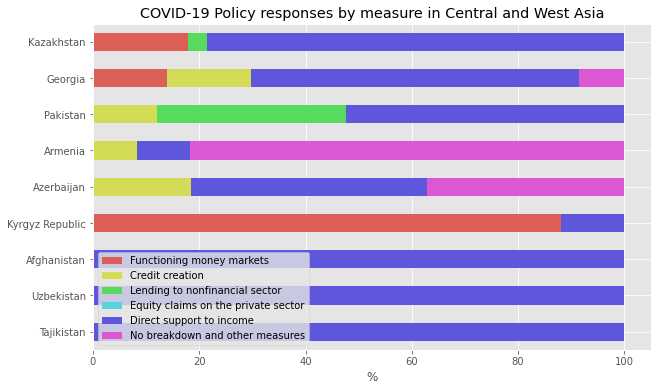

In [1273]:
y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
ax = y.iloc[:-1, :].plot(kind='barh', stacked=True, figsize=(10, 6), 
                         colormap=ListedColormap(sns.color_palette("hls")))
ax.set_title('COVID-19 Policy responses by measure in Central and West Asia')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')
ax.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'])

plt.show()

In [1274]:
y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 

In [1275]:
y

m1_pkg     m2_pkg     m3_pkg    m4_pkg  \
country                                                                 
Hong Kong, China            67.648054   3.383070   0.000000  1.308926   
People's Republic of China  18.125338  18.841290   2.114622  1.208355   
Mongolia                     5.248411   5.629151  10.739803  0.000000   
Republic of Korea            7.538523   0.104460  45.022176  3.725737   
Taipei,China                13.698630   0.000000   0.000000  0.000000   

                               m5_pkg  m_others_pkg  
country                                              
Hong Kong, China            20.007769      7.652181  
People's Republic of China  59.624319      0.086075  
Mongolia                    78.382635      0.000000  
Republic of Korea           26.149797     17.459307  
Taipei,China                14.383562     71.917808

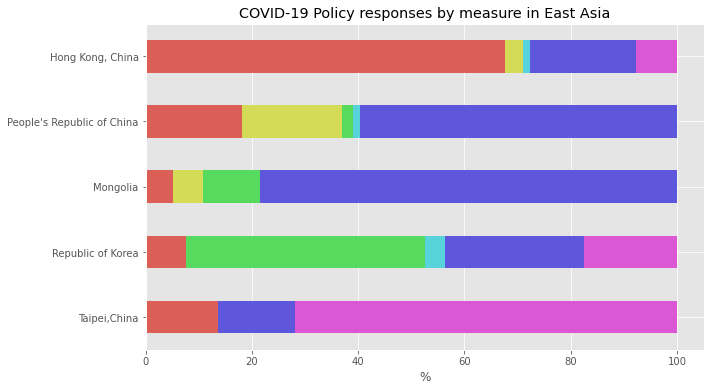

In [1276]:
y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
ax = y.plot(kind='barh', stacked=True, figsize=(10, 6), 
            colormap=ListedColormap(sns.color_palette("hls")),
            legend=None)
ax.set_title('COVID-19 Policy responses by measure in East Asia')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')

plt.show()

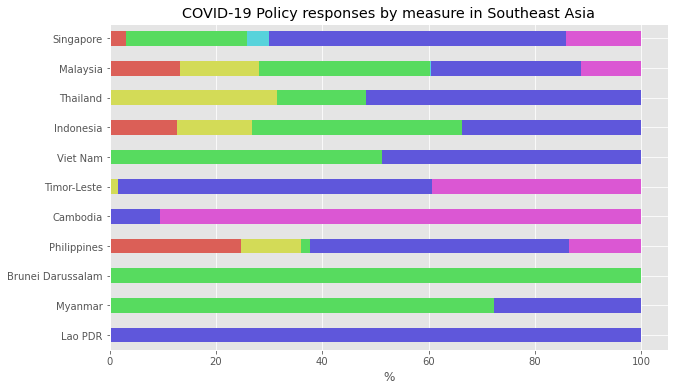

In [1277]:
y = df3.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
ax = y.plot(kind='barh', stacked=True, figsize=(10, 6), 
            colormap=ListedColormap(sns.color_palette("hls")),
            legend=None)
ax.set_title('COVID-19 Policy responses by measure in Southeast Asia')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')

plt.show()

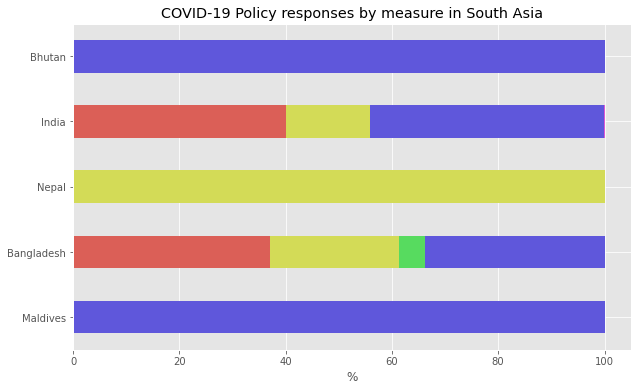

In [1278]:
y = df3.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
ax = y.plot(kind='barh', stacked=True, figsize=(10, 6), 
            colormap=ListedColormap(sns.color_palette("hls")),
            legend=None)
ax.set_title('COVID-19 Policy responses by measure in South Asia')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')

plt.show()

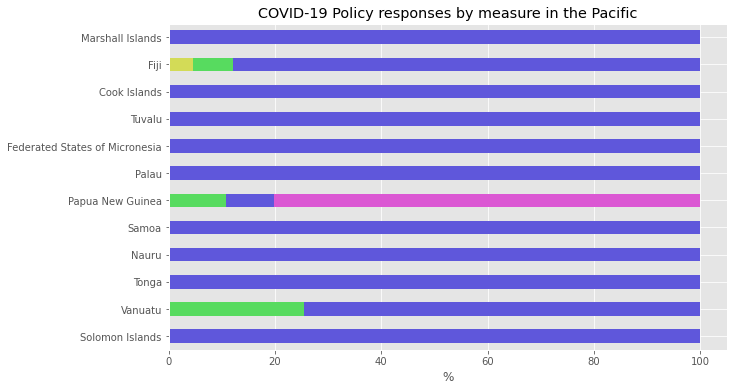

In [1279]:
y = df3.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
ax = y.plot(kind='barh', stacked=True, figsize=(10, 6), 
            colormap=ListedColormap(sns.color_palette("hls")),
            legend=None)
ax.set_title('COVID-19 Policy responses by measure in the Pacific')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')

plt.show()

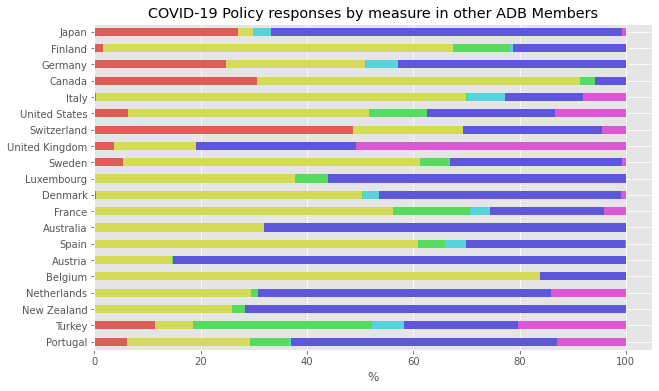

In [1280]:
y = df3.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
ax = y.plot(kind='barh', stacked=True, figsize=(10, 6), 
            colormap=ListedColormap(sns.color_palette("hls")),
            legend=None)
ax.set_title('COVID-19 Policy responses by measure in other ADB Members')
ax.invert_yaxis()
ax.set_ylabel('')
ax.set_xlabel('%')

plt.show()

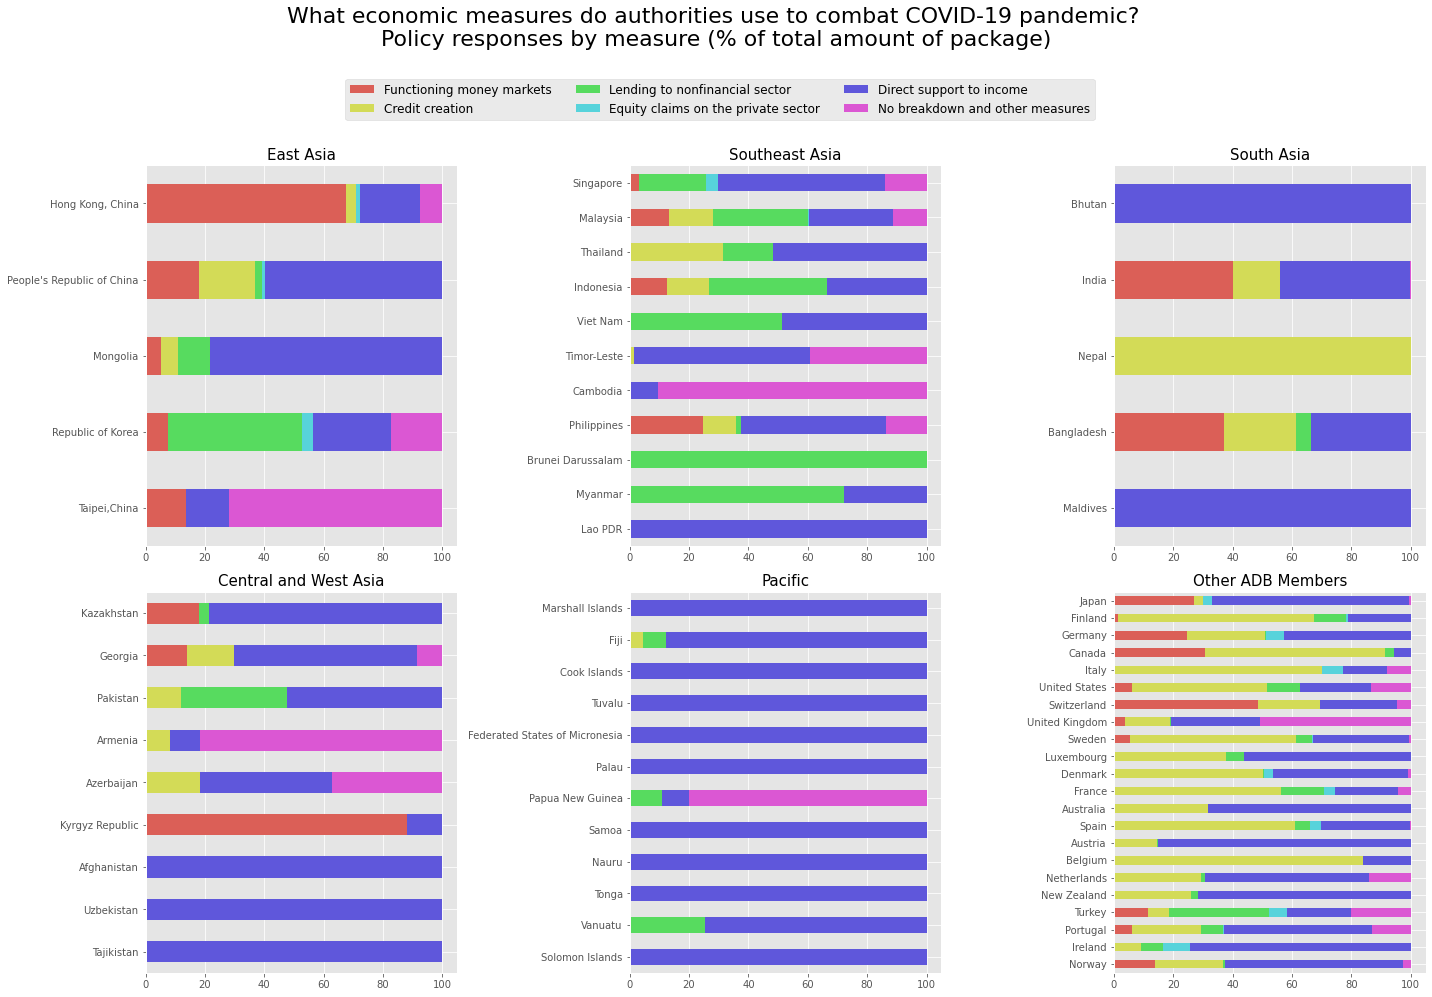

In [1281]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 0], legend=None)
axs[0, 0].set_title('East Asia', fontsize=15)
axs[0, 0].invert_yaxis()
axs[0, 0].set_ylabel('')

y = df3.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 1], legend=None)
axs[0, 1].set_title('Southeast Asia', fontsize=15)
axs[0, 1].invert_yaxis()
axs[0, 1].set_ylabel('')

y = df3.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 2], legend=None)
axs[0, 2].set_title('South Asia', fontsize=15)
axs[0, 2].invert_yaxis()
axs[0, 2].set_ylabel('')

y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 0], legend=None)
axs[1, 0].set_title('Central and West Asia', fontsize=15)
axs[1, 0].invert_yaxis()
axs[1, 0].set_ylabel('')

y = df3.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 1], legend=None)
axs[1, 1].set_title('Pacific', fontsize=15)
axs[1, 1].invert_yaxis()
axs[1, 1].set_ylabel('')

y = df3.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 2], legend=None)
axs[1, 2].set_title('Other ADB Members', fontsize=15)
axs[1, 2].invert_yaxis()
axs[1, 2].set_ylabel('')


fig.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'],
           loc='upper center', bbox_to_anchor=(0.5, 1.07), fontsize=12, ncol=3)
fig.suptitle('What economic measures do authorities use to combat COVID-19 pandemic? \nPolicy responses by measure (% of total amount of package)', 
             fontsize=22, y=1.15)

# plt.annotate('Source:', xy=(0.1, 0), xycoords='figure fraction',
#              xytext=(0.1, 10), textcoords='offset points',
#              ha="left", va="bottom")
plt.tight_layout()
plt.show()




# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')

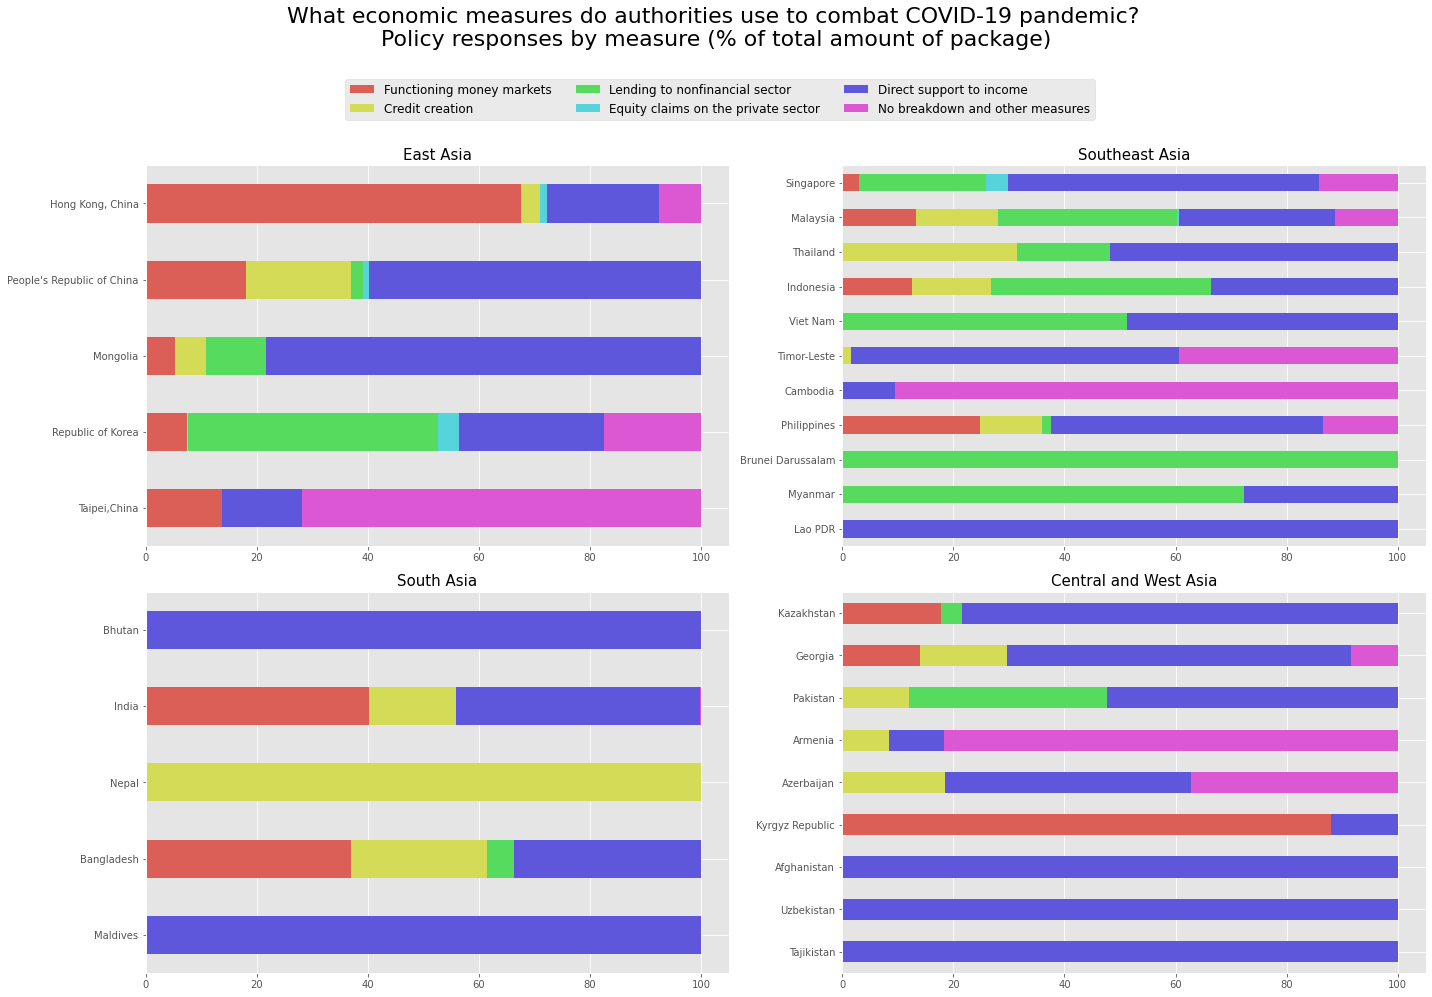

In [1282]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(20, 12))

y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 0], legend=None)
axs[0, 0].set_title('East Asia', fontsize=15)
axs[0, 0].invert_yaxis()
axs[0, 0].set_ylabel('')

y = df3.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 1], legend=None)
axs[0, 1].set_title('Southeast Asia', fontsize=15)
axs[0, 1].invert_yaxis()
axs[0, 1].set_ylabel('')

y = df3.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 0], legend=None)
axs[1, 0].set_title('South Asia', fontsize=15)
axs[1, 0].invert_yaxis()
axs[1, 0].set_ylabel('')

y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 1], legend=None)
axs[1, 1].set_title('Central and West Asia', fontsize=15)
axs[1, 1].invert_yaxis()
axs[1, 1].set_ylabel('')

# y = df3.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
# y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
#        ax=axs[1, 1], legend=None)
# axs[1, 1].set_title('Pacific', fontsize=15)
# axs[1, 1].invert_yaxis()
# axs[1, 1].set_ylabel('')

# y = df3.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
# y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
#        ax=axs[1, 2], legend=None)
# axs[1, 2].set_title('Other ADB Members', fontsize=15)
# axs[1, 2].invert_yaxis()
# axs[1, 2].set_ylabel('')


fig.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'],
           loc='upper center', bbox_to_anchor=(0.5, 1.07), fontsize=12, ncol=3)
fig.suptitle('What economic measures do authorities use to combat COVID-19 pandemic? \nPolicy responses by measure (% of total amount of package)', 
             fontsize=22, y=1.15)

# plt.annotate('Source:', xy=(0.1, 0), xycoords='figure fraction',
#              xytext=(0.1, 10), textcoords='offset points',
#              ha="left", va="bottom")
plt.tight_layout()
plt.show()




# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')

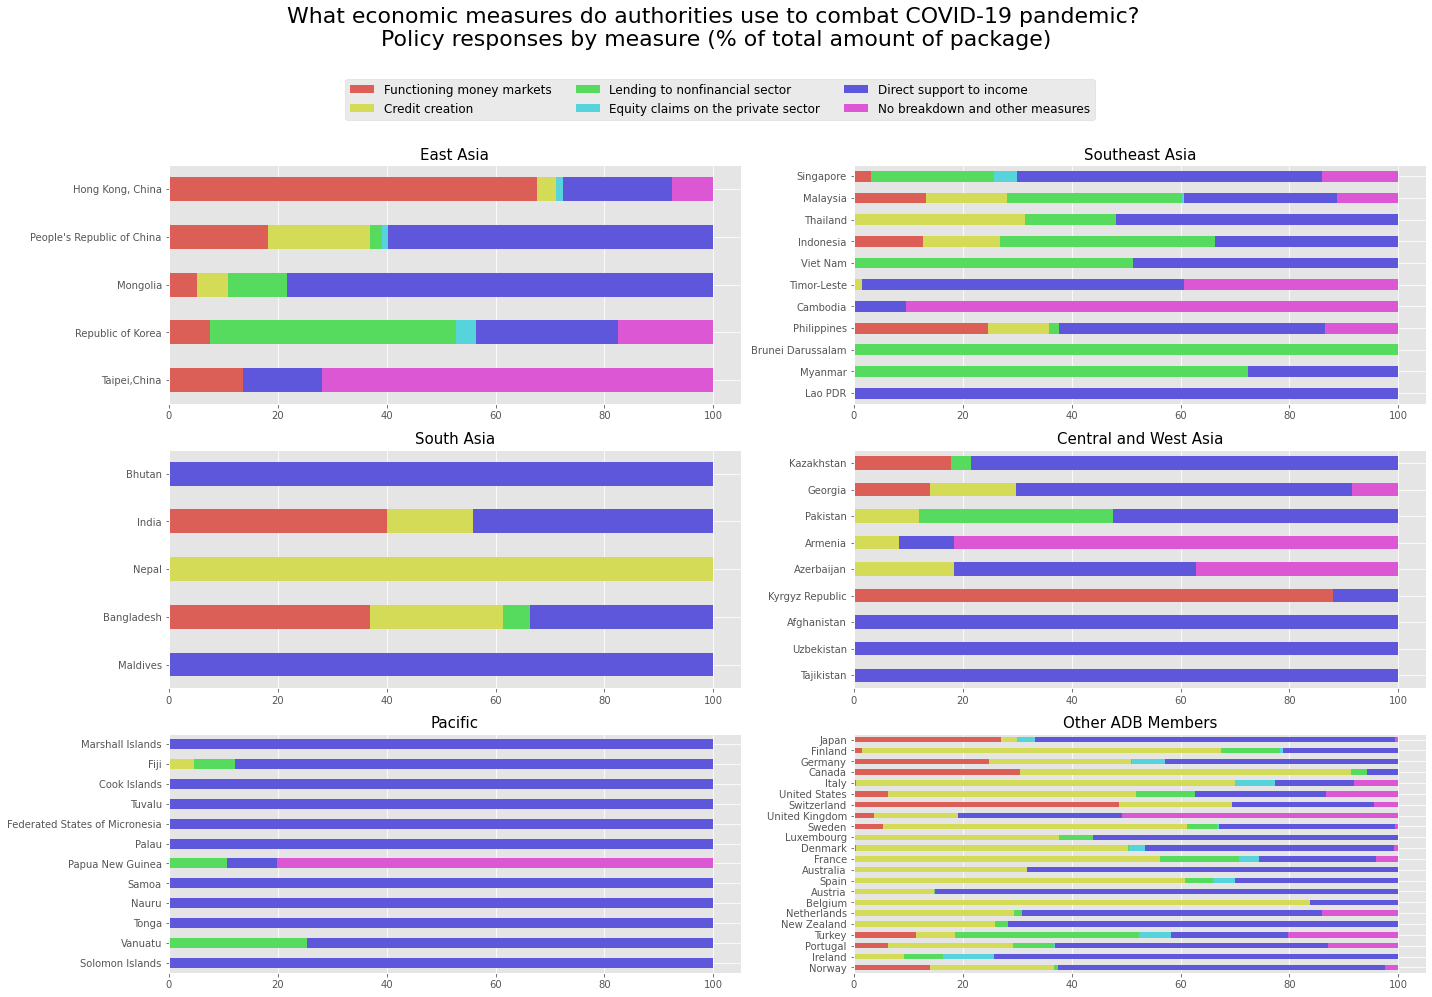

In [1283]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 12))

y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 0], legend=None)
axs[0, 0].set_title('East Asia', fontsize=15)
axs[0, 0].invert_yaxis()
axs[0, 0].set_ylabel('')

y = df3.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 1], legend=None)
axs[0, 1].set_title('Southeast Asia', fontsize=15)
axs[0, 1].invert_yaxis()
axs[0, 1].set_ylabel('')

y = df3.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 0], legend=None)
axs[1, 0].set_title('South Asia', fontsize=15)
axs[1, 0].invert_yaxis()
axs[1, 0].set_ylabel('')

y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 1], legend=None)
axs[1, 1].set_title('Central and West Asia', fontsize=15)
axs[1, 1].invert_yaxis()
axs[1, 1].set_ylabel('')

y = df3.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[2, 0], legend=None)
axs[2, 0].set_title('Pacific', fontsize=15)
axs[2, 0].invert_yaxis()
axs[2, 0].set_ylabel('')

y = df3.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[2, 1], legend=None)
axs[2, 1].set_title('Other ADB Members', fontsize=15)
axs[2, 1].invert_yaxis()
axs[2, 1].set_ylabel('')


fig.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'],
           loc='upper center', bbox_to_anchor=(0.5, 1.07), fontsize=12, ncol=3)
fig.suptitle('What economic measures do authorities use to combat COVID-19 pandemic? \nPolicy responses by measure (% of total amount of package)', 
             fontsize=22, y=1.15)

# plt.annotate('Source:', xy=(0.1, 0), xycoords='figure fraction',
#              xytext=(0.1, 10), textcoords='offset points',
#              ha="left", va="bottom")
plt.tight_layout()
plt.show()




# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')

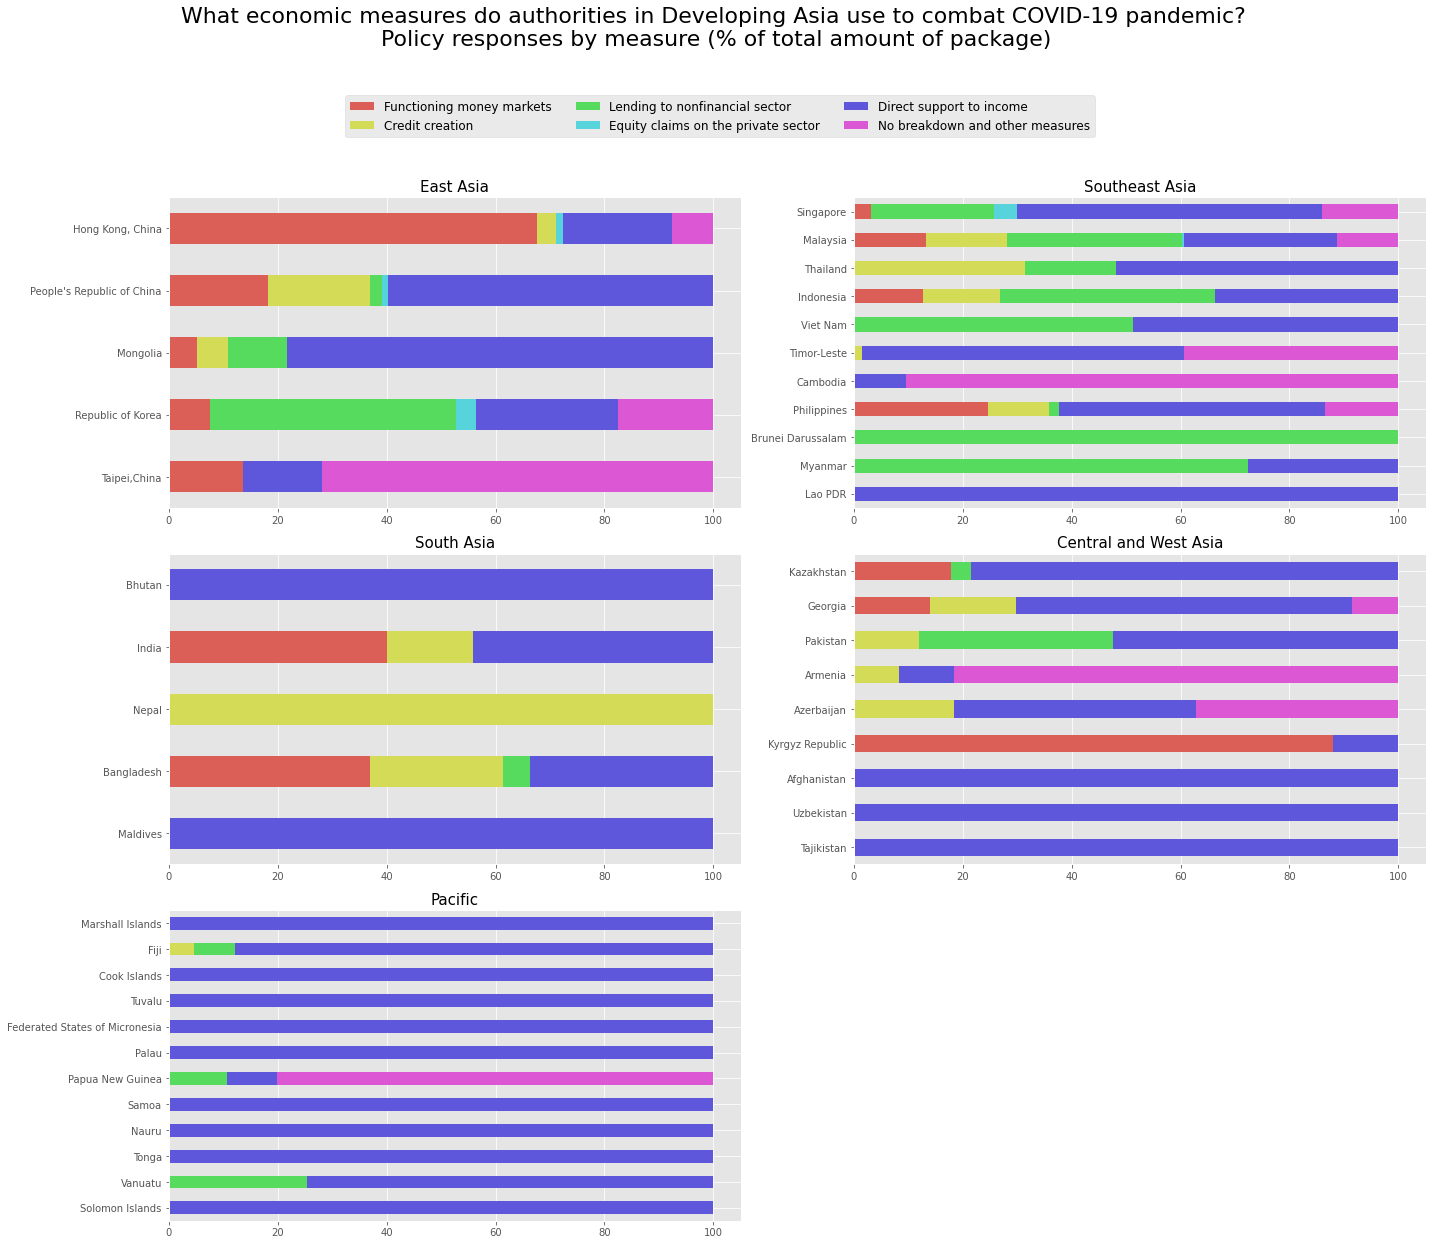

In [1284]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 15))

y = df3.loc['East Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 0], legend=None)
axs[0, 0].set_title('East Asia', fontsize=15)
axs[0, 0].invert_yaxis()
axs[0, 0].set_ylabel('')

y = df3.loc['Southeast Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[0, 1], legend=None)
axs[0, 1].set_title('Southeast Asia', fontsize=15)
axs[0, 1].invert_yaxis()
axs[0, 1].set_ylabel('')

y = df3.loc['South Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 0], legend=None)
axs[1, 0].set_title('South Asia', fontsize=15)
axs[1, 0].invert_yaxis()
axs[1, 0].set_ylabel('')

y = df3.loc['Central and West Asia'].sort_values(by='pkg_gdp', ascending=False).iloc[:-1, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[1, 1], legend=None)
axs[1, 1].set_title('Central and West Asia', fontsize=15)
axs[1, 1].invert_yaxis()
axs[1, 1].set_ylabel('')

y = df3.loc['Pacific'].sort_values(by='pkg_gdp', ascending=False).iloc[:-2, list(range(14, 19)) + [29]] 
y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
       ax=axs[2, 0], legend=None)
axs[2, 0].set_title('Pacific', fontsize=15)
axs[2, 0].invert_yaxis()
axs[2, 0].set_ylabel('')

axs[2,1].axis('off')

# y = df3.loc['Other ADB Members'].sort_values(by='pkg_gdp', ascending=False).iloc[:, list(range(14, 19)) + [29]] 
# y.plot(kind='barh', stacked=True, colormap=ListedColormap(sns.color_palette("hls", 6)),
#        ax=axs[2, 1], legend=None)
# axs[2, 1].set_title('Other ADB Members', fontsize=15)
# axs[2, 1].invert_yaxis()
# axs[2, 1].set_ylabel('')


fig.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown and other measures'],
           loc='upper center', bbox_to_anchor=(0.5, 1.07), fontsize=12, ncol=3)
fig.suptitle('What economic measures do authorities in Developing Asia use to combat COVID-19 pandemic? \nPolicy responses by measure (% of total amount of package)', 
             fontsize=22, y=1.15)

# plt.annotate('Source:', xy=(0, 0), xycoords='figure fraction',
#              xytext=(0, 0), textcoords='offset points',
#              ha="left", va="bottom")
plt.tight_layout()
plt.show()




# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center')

In [1285]:
df3

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.715350e+09  1.597265e+09  8.019100e+10   
                      Georgia      5.887498e+09  1.936210e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.386116   
                      Georgia      1.592500e+10    3731000.0  12.158308   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd            m1            m2  \
region                country                                                 
Central and West Asia Afghanistan      2.734893  0.000000e+00  0.000000e+00   
                      Armenia        207.836264  0.000000e+00  5.112384e+07   
                      Azerbaijan     160.652892  0.000000e+00  2.941176e+08   
                      Georgia        518.952156  2.700000e+08  3.058474e+08   
                      Kazakhstan    1302.013047  4.244997e+09  0.000000e+00   
...                                         ...           ...           ...   
Southeast Asia        Philippines    197.329997  5.200693e+09  2.357397e+09   
                      Singapore    16337.484018  2.823862e+09  0.000000e+00   
                      Thailand      1211.199412  0.000000e+00  2.647334e+10   
                      Timor-Leste    200.319881  0.000000e+00  4.000000e+06   
                      Viet Nam       277.402247  0.000000e+00  0.000000e+00   

                                             m3  ...    m10_pkg    m1_gdp  \
region                country                    ...                        
Central and West Asia Afghanistan  0.000000e+00  ...   0.000000  0.000000   
                      Armenia      0.000000e+00  ...  81.666667  0.000000   
                      Azerbaijan   0.000000e+00  ...  36.827665  0.000000   
                      Georgia      0.000000e+00  ...   8.492572  1.695447   
                      Kazakhstan   8.732565e+08  ...   0.000000  2.492278   
...                                         ...  ...        ...       ...   
Southeast Asia        Philippines  3.637857e+08  ...  13.534983  1.457536   
                      Singapore    2.096717e+10  ...   0.000000  0.778314   
                      Thailand     1.401530e+10  ...   0.000000  0.000000   
                      Timor-Leste  0.000000e+00  ...  39.370079  0.000000   
                      Viet Nam     1.360017e+10  ...   0.000000  0.000000   

   

In [1286]:
df3.groupby(level=1).mean().sort_values(by='pkg_gdp',ascending=False).loc[:, 'pkg_gdp']

country
Japan                    66.559742
Finland                  53.617710
Germany                  52.871380
Hong Kong, China         51.437105
Canada                   35.342141
                           ...    
Kiribati                  0.000000
Turkmenistan              0.000000
Niue                      0.000000
European Central Bank          NaN
European Union                 NaN
Name: pkg_gdp, Length: 79, dtype: float64

In [1287]:
pkg_gdp = df3.groupby(level=1).mean().sort_values(by='pkg_gdp',ascending=False).loc[:, 'pkg_gdp']

In [1288]:
pkg_gdp = pkg_gdp[pkg_gdp > 0]

In [1289]:
pkg_gdp

country
Japan               66.559742
Finland             53.617710
Germany             52.871380
Hong Kong, China    51.437105
Canada              35.342141
                      ...    
Afghanistan          0.542663
Myanmar              0.149475
Uzbekistan           0.053120
Tajikistan           0.050593
Lao PDR              0.041141
Name: pkg_gdp, Length: 74, dtype: float64

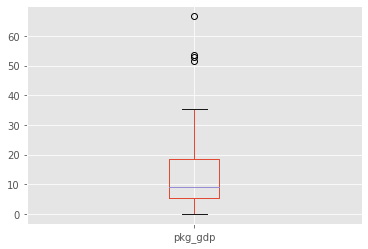

In [1290]:
pkg_gdp.plot(kind='box')

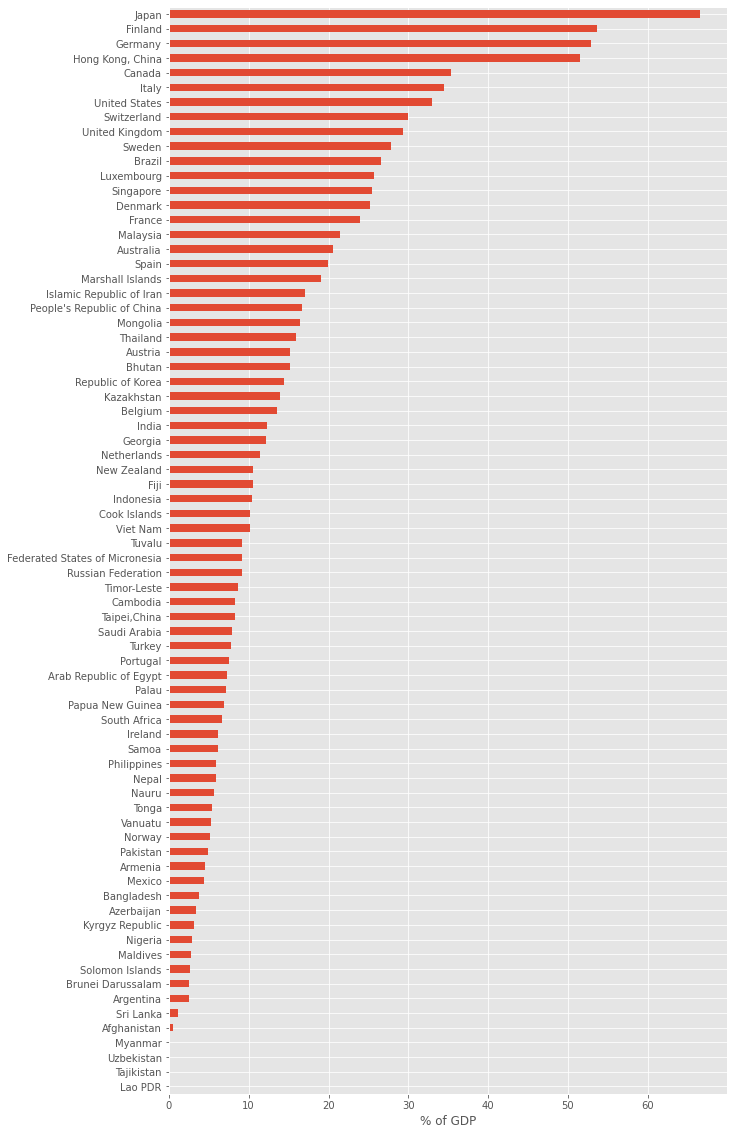

In [1291]:
ax = pkg_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

In [1292]:
pkg_usd = df3.groupby(level=1).mean().sort_values(by='amount_usd', ascending=False).loc[:, 'amount_usd']

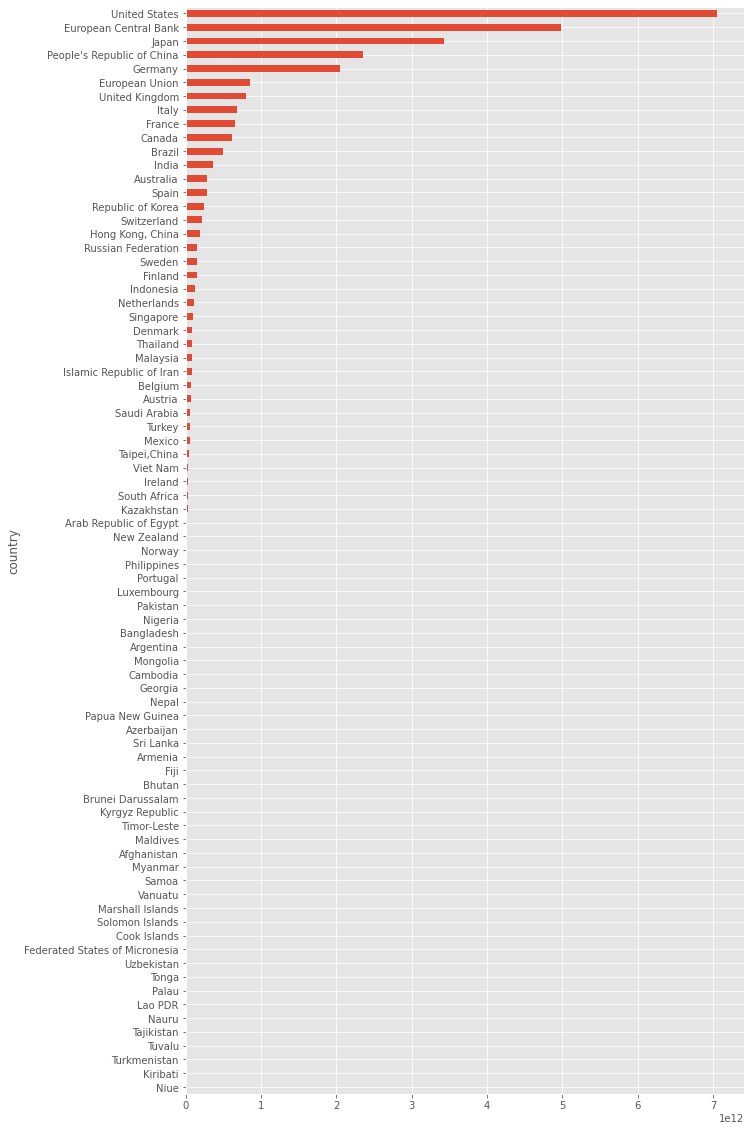

In [1293]:
ax = pkg_usd.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()

In [1294]:
pkg_gdp.index

Index(['Japan', 'Finland', 'Germany', 'Hong Kong, China', 'Canada', 'Italy',
       'United States', 'Switzerland', 'United Kingdom', 'Sweden', 'Brazil',
       'Luxembourg', 'Singapore', 'Denmark', 'France', 'Malaysia', 'Australia',
       'Spain', 'Marshall Islands', 'Islamic Republic of Iran',
       'People's Republic of China', 'Mongolia', 'Thailand', 'Austria',
       'Bhutan', 'Republic of Korea', 'Kazakhstan', 'Belgium', 'India',
       'Georgia', 'Netherlands', 'New Zealand', 'Fiji', 'Indonesia',
       'Cook Islands', 'Viet Nam', 'Tuvalu', 'Federated States of Micronesia',
       'Russian Federation', 'Timor-Leste', 'Cambodia', 'Taipei,China',
       'Saudi Arabia', 'Turkey', 'Portugal', 'Arab Republic of Egypt', 'Palau',
       'Papua New Guinea', 'South Africa', 'Ireland', 'Samoa', 'Philippines',
       'Nepal', 'Nauru', 'Tonga', 'Vanuatu', 'Norway', 'Pakistan', 'Armenia',
       'Mexico', 'Bangladesh', 'Azerbaijan', 'Kyrgyz Republic', 'Nigeria',
       'Maldives', 'Solomon

In [1295]:
pkg_usd.index

Index(['United States', 'European Central Bank', 'Japan',
       'People's Republic of China', 'Germany', 'European Union',
       'United Kingdom', 'Italy', 'France', 'Canada', 'Brazil', 'India',
       'Australia', 'Spain', 'Republic of Korea', 'Switzerland',
       'Hong Kong, China', 'Russian Federation', 'Sweden', 'Finland',
       'Indonesia', 'Netherlands', 'Singapore', 'Denmark', 'Thailand',
       'Malaysia', 'Islamic Republic of Iran', 'Belgium', 'Austria',
       'Saudi Arabia', 'Turkey', 'Mexico', 'Taipei,China', 'Viet Nam',
       'Ireland', 'South Africa', 'Kazakhstan', 'Arab Republic of Egypt',
       'New Zealand', 'Norway', 'Philippines', 'Portugal', 'Luxembourg',
       'Pakistan', 'Nigeria', 'Bangladesh', 'Argentina', 'Mongolia',
       'Cambodia', 'Georgia', 'Nepal', 'Papua New Guinea', 'Azerbaijan',
       'Sri Lanka', 'Armenia', 'Fiji', 'Bhutan', 'Brunei Darussalam',
       'Kyrgyz Republic', 'Timor-Leste', 'Maldives', 'Afghanistan', 'Myanmar',
       'Samoa', 'Va

In [1296]:
pkg_usd.index.isin(pkg_gdp.index)

array([ True, False,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False, False, False])

In [1297]:
mask = pkg_usd.index.isin(pkg_gdp.index)

In [1298]:
pkg_usd = pkg_usd[mask]

In [1299]:
pkg_usd

country
United States                 7.056834e+12
Japan                         3.430809e+12
People's Republic of China    2.358400e+12
Germany                       2.042601e+12
United Kingdom                8.055123e+11
                                  ...     
Palau                         2.091681e+07
Lao PDR                       7.869126e+06
Nauru                         6.072931e+06
Tajikistan                    4.124302e+06
Tuvalu                        3.863318e+06
Name: amount_usd, Length: 74, dtype: float64

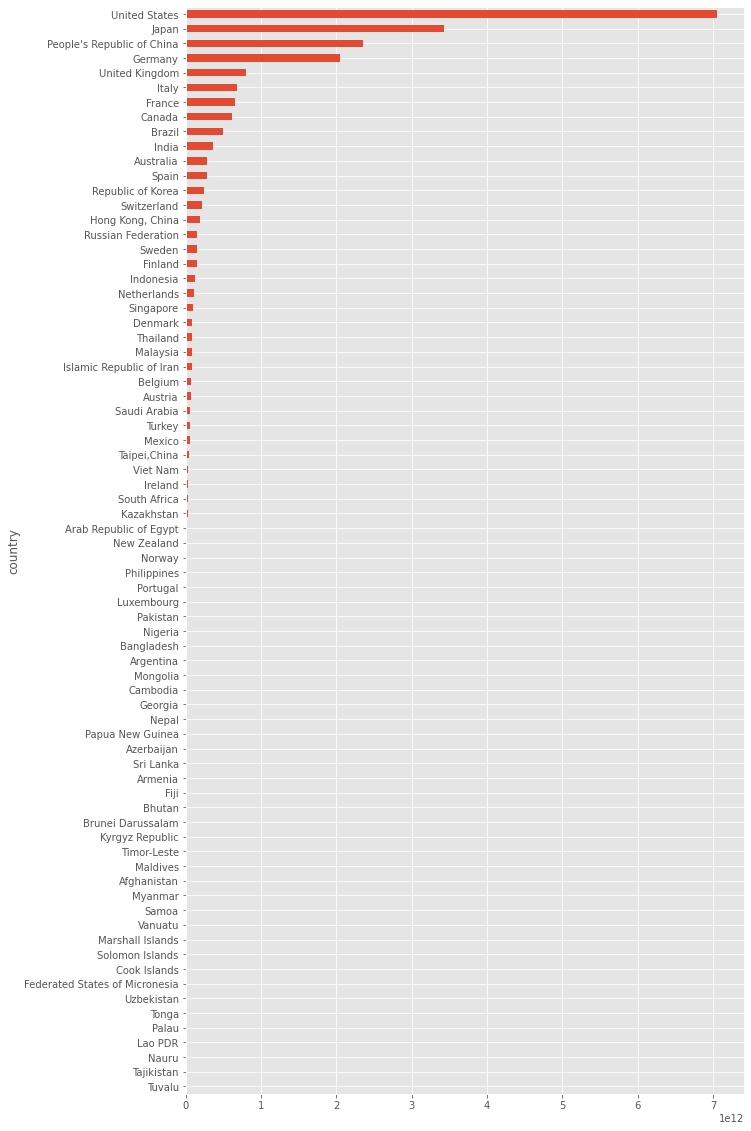

In [1300]:
ax = pkg_usd.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()

In [1301]:
m1_gdp = df3.groupby(level=1).mean().loc[:, 'm1_gdp'].sort_values(ascending=False)
m1_gdp = m1_gdp[m1_gdp > 0]

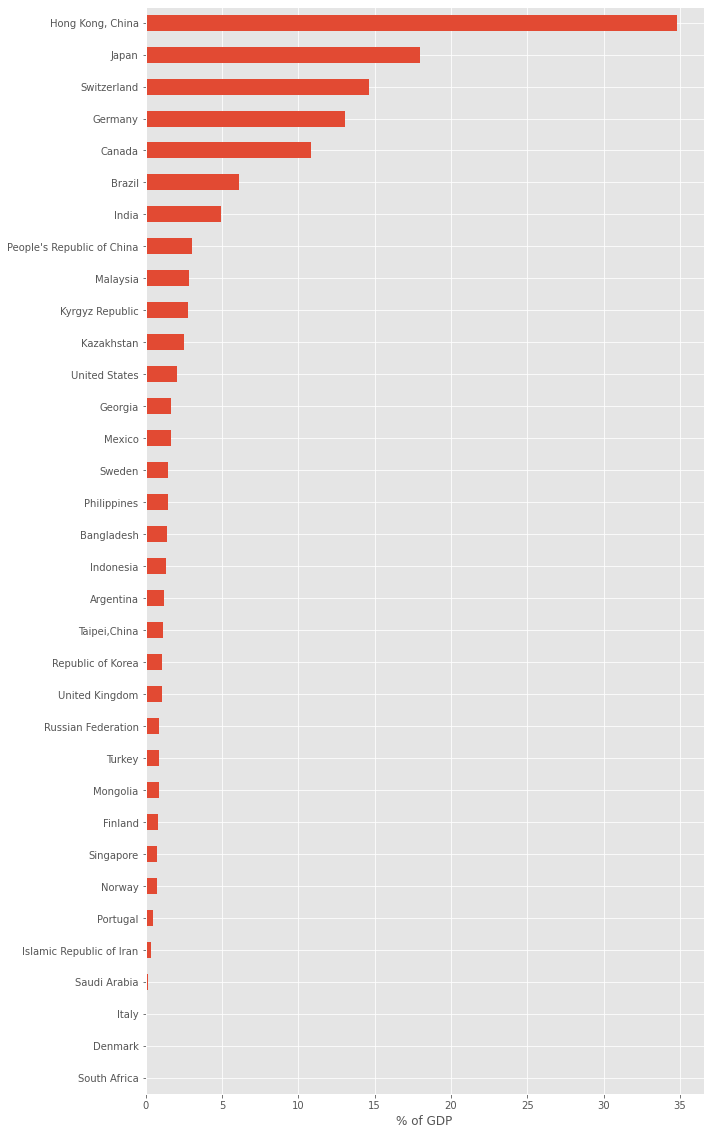

In [1302]:
ax = m1_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


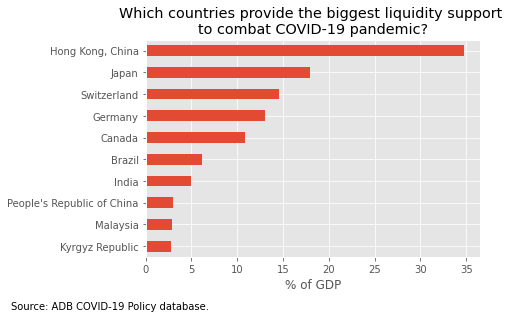

In [1303]:
ax = m1_gdp.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries provide the biggest liquidity support \nto combat COVID-19 pandemic?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.4, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [1304]:
mask = df3.reset_index(level=0)['region'].isin(['Other Economies', 'Other ADB Members', 'Others'])
df3.reset_index(level=0)[~mask]

region    amount_lcy  \
country                                                               
Afghanistan                     Central and West Asia  8.000000e+09   
Armenia                         Central and West Asia  3.000000e+11   
Azerbaijan                      Central and West Asia  2.715350e+09   
Georgia                         Central and West Asia  5.887498e+09   
Kazakhstan                      Central and West Asia  9.810000e+12   
Kyrgyz Republic                 Central and West Asia  1.924826e+10   
Pakistan                        Central and West Asia  2.288947e+12   
Tajikistan                      Central and West Asia  4.080000e+07   
Turkmenistan                    Central and West Asia  0.000000e+00   
Uzbekistan                      Central and West Asia  3.070000e+11   
Hong Kong, China                            East Asia  1.489770e+12   
Mongolia                                    East Asia  6.173294e+12   
People's Republic of China                  East Asia  1.655143e+13   
Republic of Korea                           East Asia  2.871916e+14   
Taipei,China                                East Asia  1.460000e+12   
Cook Islands                                  Pacific  6.100000e+07   
Federated States of Micronesia                Pacific  3.500000e+07   
Fiji                                          Pacific  1.320000e+09   
Kiribati                                      Pacific  0.000000e+00   
Marshall Islands                              Pacific  4.200000e+07   
Nauru                                         Pacific  9.100000e+06   
Niue                                          Pacific  0.000000e+00   
Palau                                         Pacific  2.091681e+07   
Papua New Guinea                              Pacific  5.600000e+09   
Samoa                                         Pacific  1.494000e+08   
Solomon Islands                               Pacific  3.090000e+08   
Tonga                                         Pacific  6.000000e+07   
Tuvalu                                        Pacific  5.789000e+06   
Vanuatu                                       Pacific  5.900000e+09   
Bangladesh                                 South Asia  1.026065e+12   
Bhutan                                     South Asia  3.200000e+10   
India                                      South Asia  2.695328e+13   
Maldives                                   South Asia  2.500000e+09   
Nepal                                      South Asia  2.000000e+11   
Sri Lanka                                  South Asia  1.914739e+11   
Brunei Darussalam                      Southeast Asia  4.500000e+08   
Cambodia                               Southeast Asia  8.963262e+12   
Indonesia                              Southeast Asia  1.759156e+15   
Lao PDR                                Southeast Asia  7.000000e+10   
Malaysia                               Southeast Asia  3.370000e+11   
Myanmar                                Southeast Asia  1.383000e+11   
Philippines                            Southeast Asia  1.071298e+12   
Singapore                              Southeast Asia  1.304905e+11   
Thailand                               Southeast Asia  2.700000e+12   
Timor-Leste                            Southeast Asia  2.540000e+08   
Viet Nam                               Southeast Asia  6.158000e+14   

                                  amount_usd       gdp_lcy       gdp_usd  \
country                                                                    
Afghanistan                     1.016625e+08  1.502470e+12  1.873400e+10   
Armenia                         6.134861e+08  6.541000e+12  1.344400e+10   
Azerbaijan                      1.597265e+09  8.019100e+10  4.717100e+10   
Georgia                         1.936210e+09  4.474900e+10  1.592500e+10   
Kazakhstan                      2.379624e+10  6.543920e+13  1.703260e+11   
Kyrgyz Republic                 2.580000e+08  5.856010e+11  8.261000e+09   
Pakistan                      

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


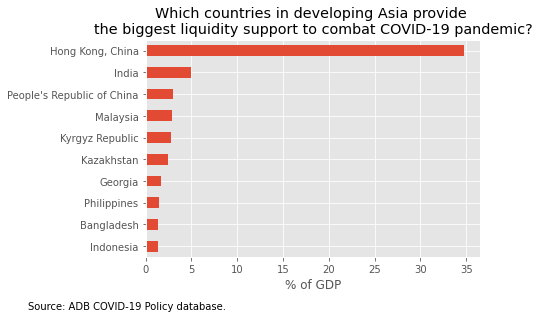

In [1305]:
m1_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm1_gdp'].sort_values(ascending=False)
m1_gdp_asia = m1_gdp_asia[m1_gdp_asia > 0]
m1_gdp_asia

ax = m1_gdp_asia.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide \nthe biggest liquidity support to combat COVID-19 pandemic?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

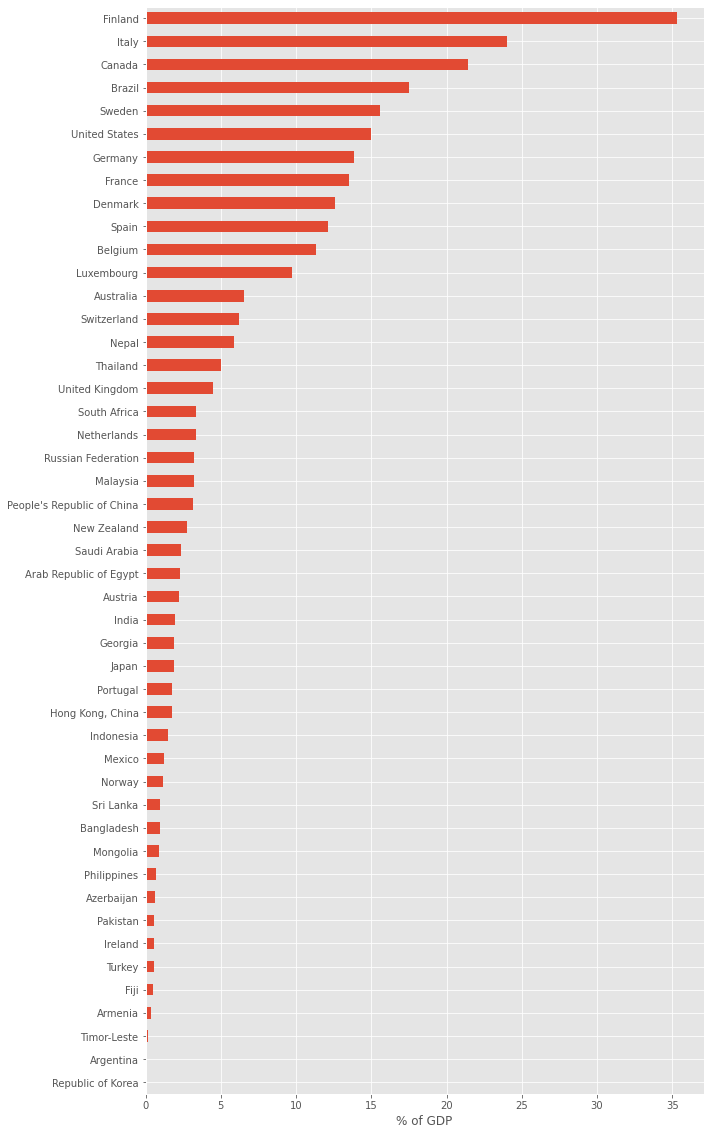

In [1306]:
m2_gdp = df3.groupby(level=1).mean().loc[:, 'm2_gdp'].sort_values(ascending=False)
m2_gdp = m2_gdp[m2_gdp > 0]
ax = m2_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


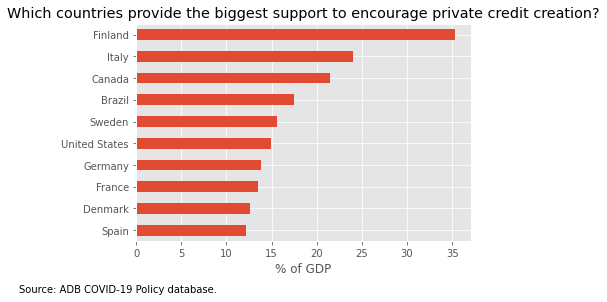

In [1307]:
ax = m2_gdp.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries provide the biggest support to encourage private credit creation?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


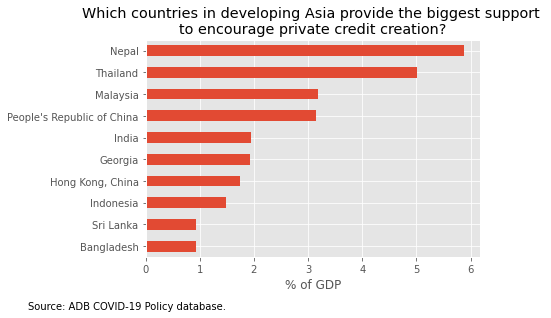

In [1308]:
m2_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm2_gdp'].sort_values(ascending=False)
m2_gdp_asia = m2_gdp_asia[m2_gdp_asia > 0]
m2_gdp_asia

ax = m2_gdp_asia.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the biggest support \nto encourage private credit creation?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

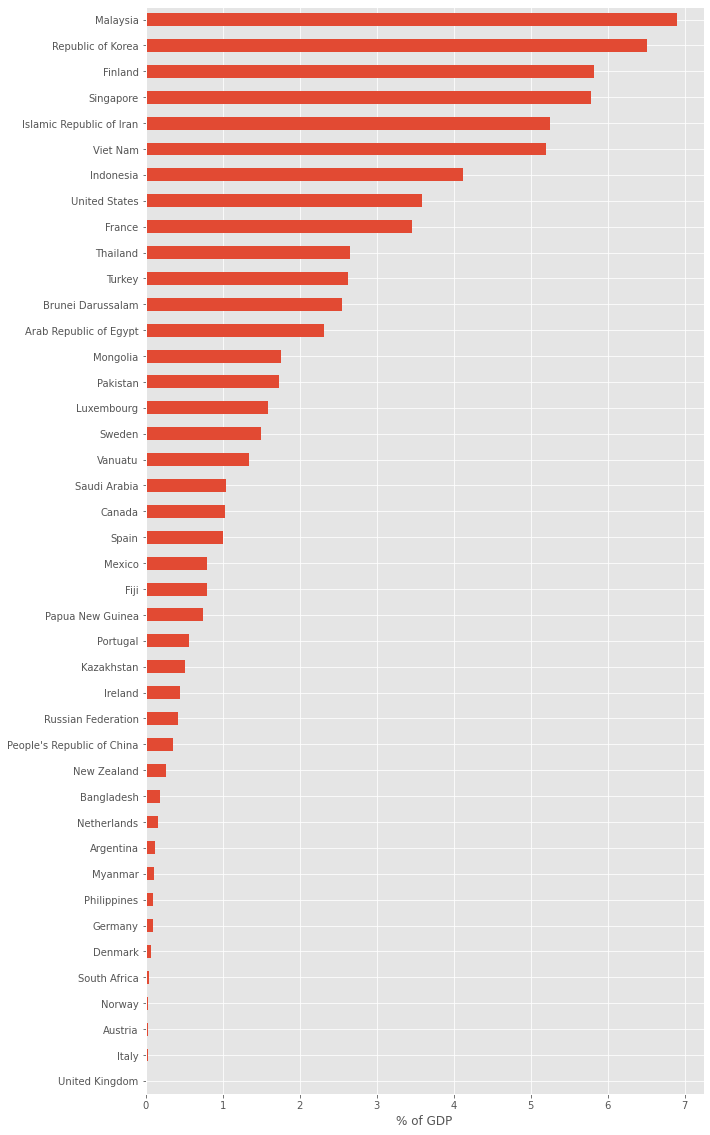

In [1309]:
m3_gdp = df3.groupby(level=1).mean().loc[:, 'm3_gdp'].sort_values(ascending=False)
m3_gdp = m3_gdp[m3_gdp > 0]
ax = m3_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


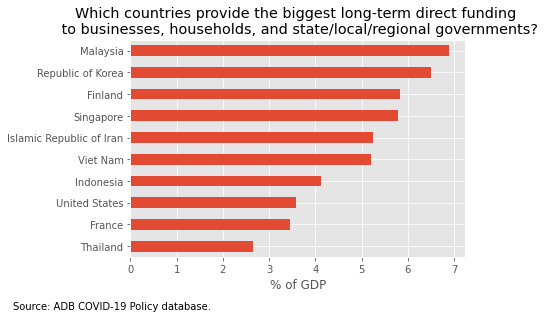

In [1310]:
ax = m3_gdp.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries provide the biggest long-term direct funding \n to businesses, households, and state/local/regional governments?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
# plt.tight_layout()
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


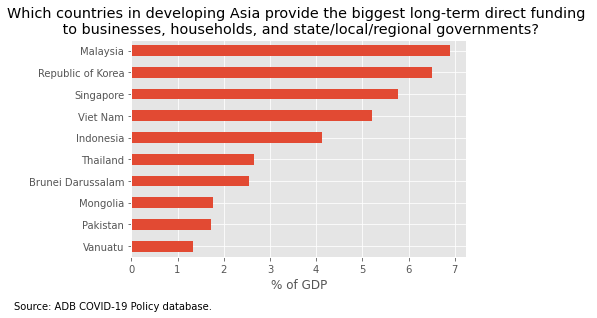

In [1311]:
m3_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm3_gdp'].sort_values(ascending=False)
m3_gdp_asia = m3_gdp_asia[m3_gdp_asia > 0]
m3_gdp_asia

ax = m3_gdp_asia.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the biggest long-term direct funding \n to businesses, households, and state/local/regional governments?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

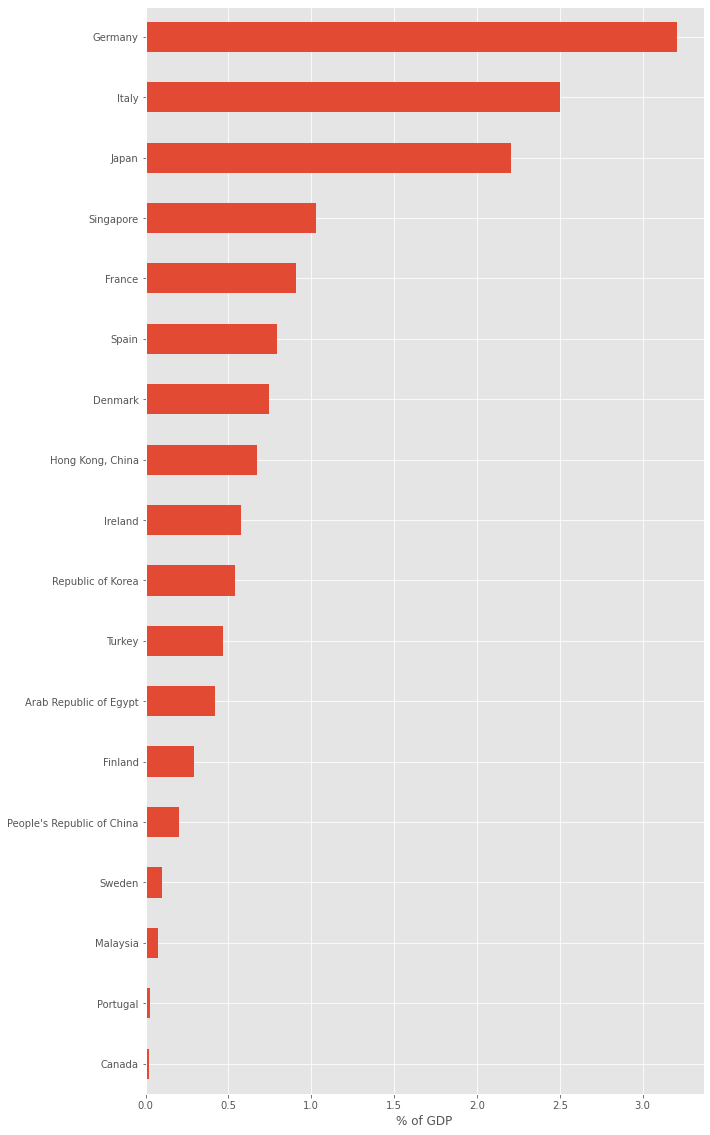

In [1312]:
m4_gdp = df3.groupby(level=1).mean().loc[:, 'm4_gdp'].sort_values(ascending=False)
m4_gdp = m4_gdp[m4_gdp > 0]
ax = m4_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


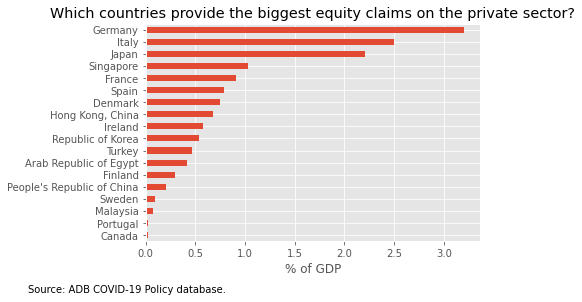

In [1313]:
ax = m4_gdp.plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries provide the biggest equity claims on the private sector?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
# plt.tight_layout()
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


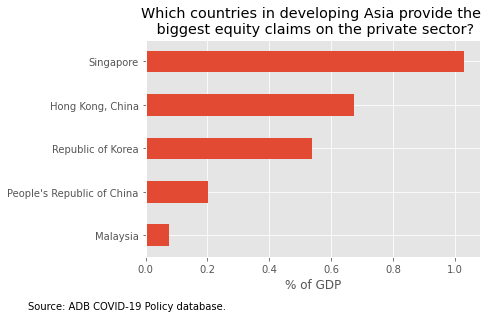

In [1314]:
m4_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm4_gdp'].sort_values(ascending=False)
m4_gdp_asia = m4_gdp_asia[m4_gdp_asia > 0]
m4_gdp_asia

ax = m4_gdp_asia.plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the \n biggest equity claims on the private sector?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

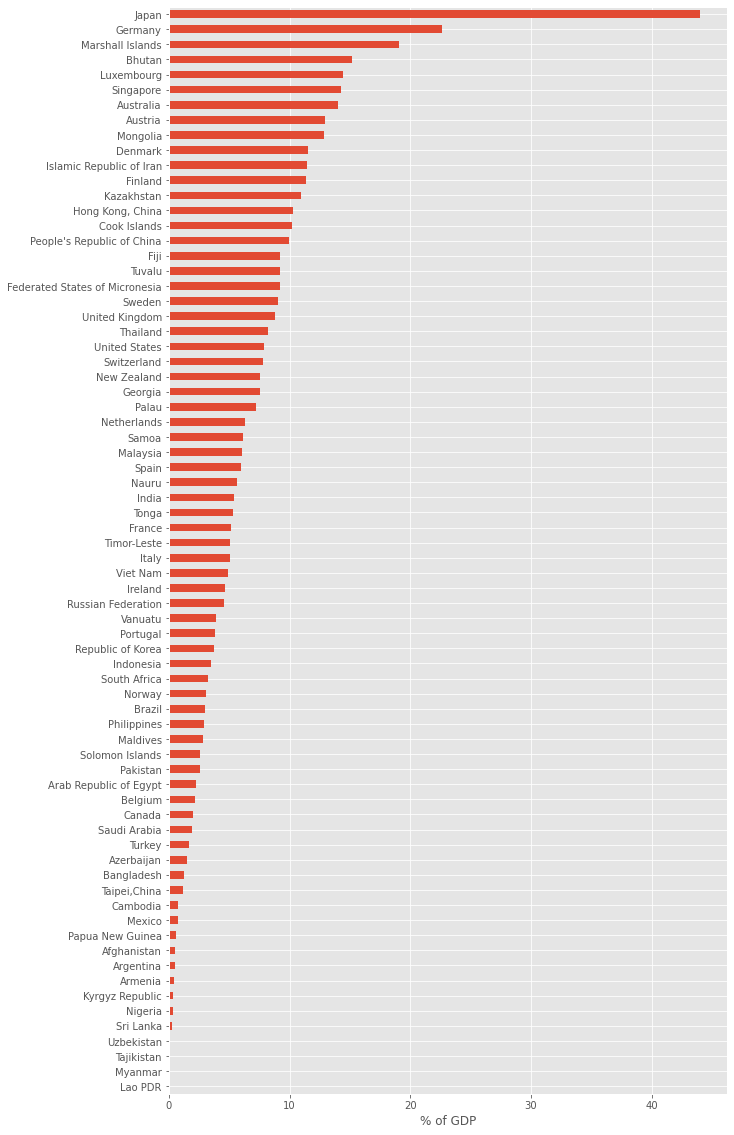

In [1315]:
m5_gdp = df3.groupby(level=1).mean().loc[:, 'm5_gdp'].sort_values(ascending=False)
m5_gdp = m5_gdp[m5_gdp > 0]
ax = m5_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


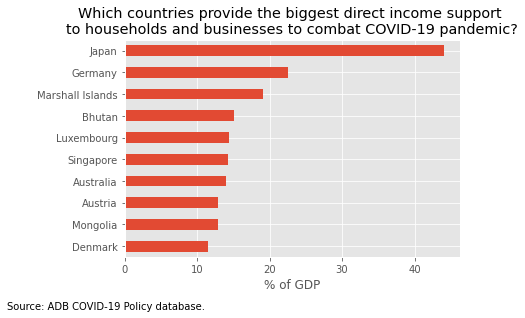

In [1316]:
ax = m5_gdp.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries provide the biggest direct income support \nto households and businesses to combat COVID-19 pandemic?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


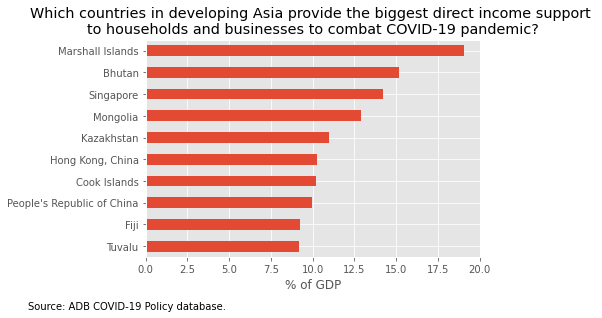

In [1317]:
m5_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm5_gdp'].sort_values(ascending=False)
m5_gdp_asia = m5_gdp_asia[m5_gdp_asia > 0]
m5_gdp_asia

ax = m5_gdp_asia.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the biggest direct income support \nto households and businesses to combat COVID-19 pandemic?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


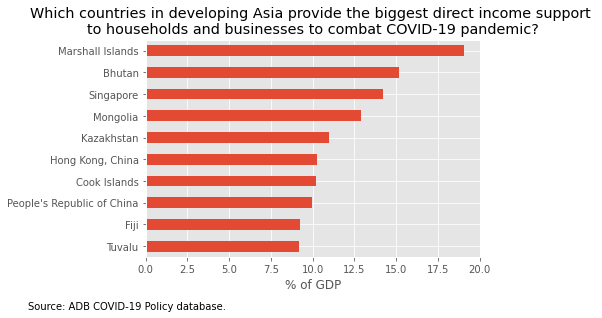

In [1318]:
m5_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm5_gdp'].sort_values(ascending=False)
m5_gdp_asia = m5_gdp_asia[m5_gdp_asia > 0]
m5_gdp_asia

ax = m5_gdp_asia.head(10).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the biggest direct income support \nto households and businesses to combat COVID-19 pandemic?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

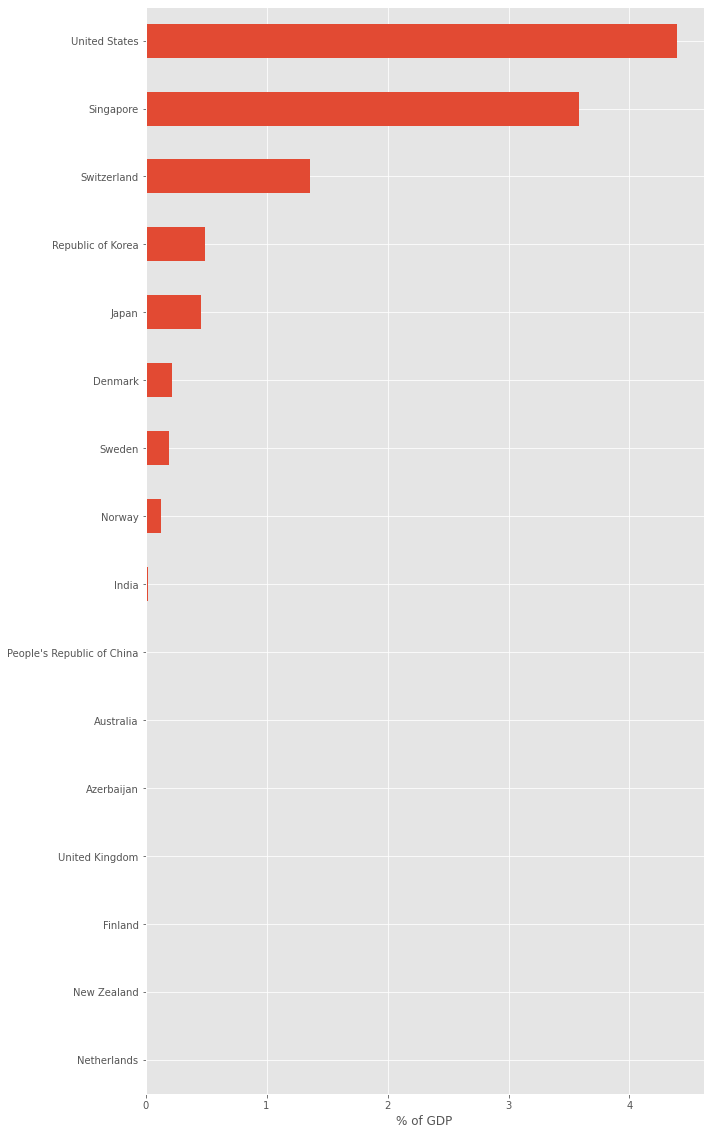

In [1319]:
m9_gdp = df3.groupby(level=1).mean().loc[:, 'm9_gdp'].sort_values(ascending=False)
m9_gdp = m9_gdp[m9_gdp > 0]
ax = m9_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  


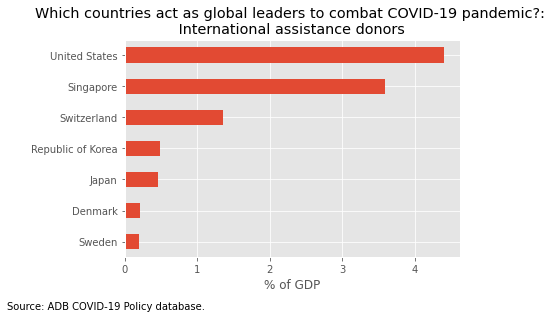

In [1320]:
ax = m9_gdp.head(7).plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries act as global leaders to combat COVID-19 pandemic?: \n International assistance donors ',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:10: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  # Remove the CWD from sys.path while we load stuff.


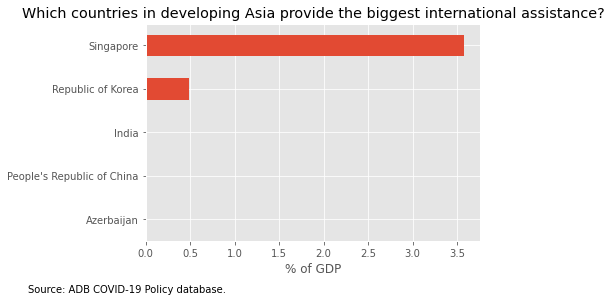

In [1321]:
m9_gdp_asia = df3.reset_index(level=0)[~mask].loc[:, 'm9_gdp'].sort_values(ascending=False)
m9_gdp_asia = m9_gdp_asia[m9_gdp_asia > 0]
m9_gdp_asia

ax = m9_gdp_asia.plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Which countries in developing Asia provide the biggest international assistance?',
       ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

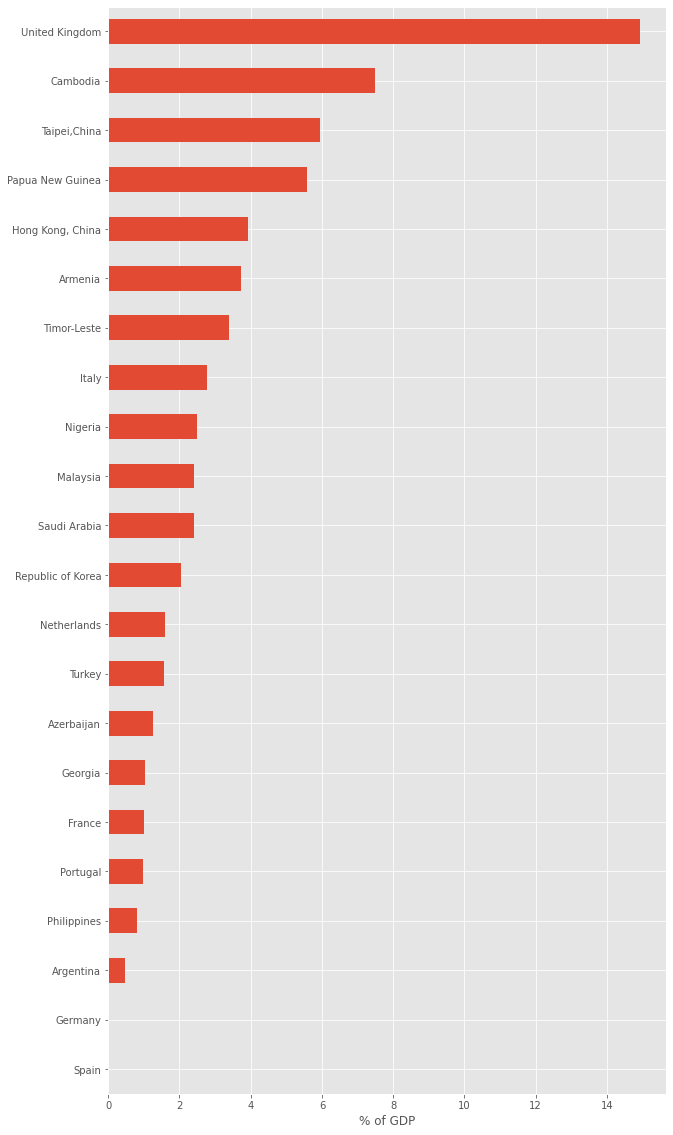

In [1322]:
m10_gdp = df3.groupby(level=1).mean().loc[:, 'm10_gdp'].sort_values(ascending=False)
m10_gdp = m10_gdp[m10_gdp > 0]
ax = m10_gdp.plot(kind='barh', figsize=(10, 20))
ax.invert_yaxis()
ax.set(ylabel='', xlabel='% of GDP')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  """


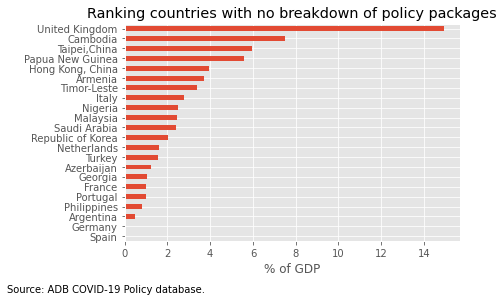

In [1323]:
ax = m10_gdp.plot(kind='barh')
ax.invert_yaxis()
ax.set(title='Ranking countries with no breakdown of policy packages',  ylabel='', xlabel='% of GDP')
ax.annotate('Source: ADB COVID-19 Policy database.', 
            xy=(-0.35, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [1324]:
df3

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.715350e+09  1.597265e+09  8.019100e+10   
                      Georgia      5.887498e+09  1.936210e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.386116   
                      Georgia      1.592500e+10    3731000.0  12.158308   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd            m1            m2  \
region                country                                                 
Central and West Asia Afghanistan      2.734893  0.000000e+00  0.000000e+00   
                      Armenia        207.836264  0.000000e+00  5.112384e+07   
                      Azerbaijan     160.652892  0.000000e+00  2.941176e+08   
                      Georgia        518.952156  2.700000e+08  3.058474e+08   
                      Kazakhstan    1302.013047  4.244997e+09  0.000000e+00   
...                                         ...           ...           ...   
Southeast Asia        Philippines    197.329997  5.200693e+09  2.357397e+09   
                      Singapore    16337.484018  2.823862e+09  0.000000e+00   
                      Thailand      1211.199412  0.000000e+00  2.647334e+10   
                      Timor-Leste    200.319881  0.000000e+00  4.000000e+06   
                      Viet Nam       277.402247  0.000000e+00  0.000000e+00   

                                             m3  ...    m10_pkg    m1_gdp  \
region                country                    ...                        
Central and West Asia Afghanistan  0.000000e+00  ...   0.000000  0.000000   
                      Armenia      0.000000e+00  ...  81.666667  0.000000   
                      Azerbaijan   0.000000e+00  ...  36.827665  0.000000   
                      Georgia      0.000000e+00  ...   8.492572  1.695447   
                      Kazakhstan   8.732565e+08  ...   0.000000  2.492278   
...                                         ...  ...        ...       ...   
Southeast Asia        Philippines  3.637857e+08  ...  13.534983  1.457536   
                      Singapore    2.096717e+10  ...   0.000000  0.778314   
                      Thailand     1.401530e+10  ...   0.000000  0.000000   
                      Timor-Leste  0.000000e+00  ...  39.370079  0.000000   
                      Viet Nam     1.360017e+10  ...   0.000000  0.000000   

   

In [1325]:
df3.index.levels[0]

Index(['Central and West Asia', 'East Asia', 'Other ADB Members',
       'Other Economies', 'Others', 'Pacific', 'South Asia', 'Southeast Asia'],
      dtype='object', name='region')

In [1326]:
df3.groupby(level=0).sum()

amount_lcy    amount_usd       gdp_lcy       gdp_usd  \
region                                                                          
Central and West Asia  1.274184e+13  4.213355e+10  6.363661e+14  6.733910e+11   
East Asia              3.128661e+14  2.836336e+12  2.067429e+15  1.674246e+13   
Other ADB Members      3.836777e+14  1.684005e+13  6.132379e+14  4.818727e+13   
Other Economies        3.300987e+15  9.071653e+11  2.330315e+16  7.549986e+12   
Others                 5.272400e+12  5.832301e+12  0.000000e+00  0.000000e+00   
Pacific                1.351221e+10  2.556709e+09  2.162848e+11  3.469767e+10   
South Asia             2.840532e+13  3.781449e+11  2.556299e+14  3.378042e+12   
Southeast Asia         2.388367e+15  4.208749e+11  2.257556e+16  3.114703e+12   

                               popn     pkg_gdp     pkg_pc_usd            m1  \
region                                                                         
Central and West Asia  3.385120e+08   42.701712    2299.469523  4.741997e+09   
East Asia              1.478575e+09  107.250716   34761.458818  5.817540e+11   
Other ADB Members      1.015085e+09  555.864335  286308.071244  2.217813e+12   
Other Economies        9.922108e+08   84.394310    7562.902101  1.571946e+11   
Others                 0.000000e+00    0.000000       0.000000  1.106195e+10   
Pacific                1.108472e+07   97.340172    6557.231555  0.000000e+00   
South Asia             1.565001e+09   41.202774    1339.417712  1.500592e+11   
Southeast Asia         6.551682e+08  108.856746   22025.017232  3.304508e+10   

                                 m2            m3  ...     m10_pkg     m1_gdp  \
region                                             ...                          
Central and West Asia  2.305531e+09  5.781397e+09  ...  126.986904   6.935576   
East Asia              4.512155e+11  1.560878e+11  ...   93.644221  40.902657   
Other ADB Members      5.832767e+12  9.494989e+11  ...  110.456438  64.228625   
Other Economies        4.297334e+11  5.705679e+10  ...  137.465989  10.387048   
Others                 4.997773e+12  5.224340e+11  ...    0.000000   0.000000   
Pacific                2.722817e+07  2.342255e+08  ...   80.178571   0.000000   
South Asia             6.276096e+10  5.885815e+08  ...    0.000000   6.368421   
Southeast Asia         5.692726e+10  1.202881e+11  ...  154.682057   6.394675   

                           m2_gdp     m3_gdp     m4_gdp      m5_gdp    m9_gdp  \
region                                                                          
Central and West Asia    3.506446   2.239614   0.000000   24.003223  0.010600   
East Asia                5.822166   8.619898   1.412995   38.074808  0.503332   
Other ADB Members      215.964721  22.361828  11.837830  211.808509  6.766528   
Other Economies         30.082418  10.012674   0.421058   28.104228  0.000000   
Others                   0.000000   0.000000   0.000000    0.000000  0.000000   
Pacific                  0.477018   2.882050   0.000000   88.394138  0.000000   
South Asia               9.699333   0.185400   0.000000   24.930883  0.018736   
Southeast Asia          10.465757  27.403492   1.107734   45.795580  3.583064   

                         m10_gdp  m_others_gdp  m_others_pkg  
region                                                        
Central and West Asia   6.006251      6.016851    127.299939  
East Asia              11.914861     12.418193     97.115372  
Other ADB Members      22.896294     29.662822    133.146868  
Other Economies         5.386886      5.386886    137.465989  
Others                  0.000000      0.000000      4.006551  
Pacific                 5.586966      5.586966     80.178571  
South Asia              0.000000      0.018736      0.151647  
Southeast Asia         14.106444     17.689508    168.793813  

[8 rows x 30 columns]

In [1327]:
regional_sum = df3.groupby(level=0).sum()

In [1328]:
regional_sum = regional_sum.assign(m1_usd_region = lambda x: 100 * x.m1 / x.amount_usd)
regional_sum = regional_sum.assign(m2_usd_region = lambda x: 100 * x.m2 / x.amount_usd)
regional_sum = regional_sum.assign(m3_usd_region = lambda x: 100 * x.m3 / x.amount_usd)
regional_sum = regional_sum.assign(m4_usd_region = lambda x: 100 * x.m4 / x.amount_usd)
regional_sum = regional_sum.assign(m5_usd_region = lambda x: 100 * x.m5 / x.amount_usd)
regional_sum = regional_sum.assign(m9_usd_region = lambda x: 100 * x.m9 / x.amount_usd)
regional_sum = regional_sum.assign(m10_usd_region = lambda x: 100 * x.m10 / x.amount_usd)

In [1329]:
regional_sum = regional_sum.assign(m9_m10_usd_region = lambda x: 100 * (x.m9 + x.m10) / x.amount_usd)

In [1330]:
regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]].sum(axis=1)

region
Central and West Asia    100.0
East Asia                100.0
Other ADB Members        100.0
Other Economies          100.0
Others                   100.0
Pacific                  100.0
South Asia               100.0
Southeast Asia           100.0
dtype: float64

In [1331]:
regional_sum

amount_lcy    amount_usd       gdp_lcy       gdp_usd  \
region                                                                          
Central and West Asia  1.274184e+13  4.213355e+10  6.363661e+14  6.733910e+11   
East Asia              3.128661e+14  2.836336e+12  2.067429e+15  1.674246e+13   
Other ADB Members      3.836777e+14  1.684005e+13  6.132379e+14  4.818727e+13   
Other Economies        3.300987e+15  9.071653e+11  2.330315e+16  7.549986e+12   
Others                 5.272400e+12  5.832301e+12  0.000000e+00  0.000000e+00   
Pacific                1.351221e+10  2.556709e+09  2.162848e+11  3.469767e+10   
South Asia             2.840532e+13  3.781449e+11  2.556299e+14  3.378042e+12   
Southeast Asia         2.388367e+15  4.208749e+11  2.257556e+16  3.114703e+12   

                               popn     pkg_gdp     pkg_pc_usd            m1  \
region                                                                         
Central and West Asia  3.385120e+08   42.701712    2299.469523  4.741997e+09   
East Asia              1.478575e+09  107.250716   34761.458818  5.817540e+11   
Other ADB Members      1.015085e+09  555.864335  286308.071244  2.217813e+12   
Other Economies        9.922108e+08   84.394310    7562.902101  1.571946e+11   
Others                 0.000000e+00    0.000000       0.000000  1.106195e+10   
Pacific                1.108472e+07   97.340172    6557.231555  0.000000e+00   
South Asia             1.565001e+09   41.202774    1339.417712  1.500592e+11   
Southeast Asia         6.551682e+08  108.856746   22025.017232  3.304508e+10   

                                 m2            m3  ...  m_others_gdp  \
region                                             ...                 
Central and West Asia  2.305531e+09  5.781397e+09  ...      6.016851   
East Asia              4.512155e+11  1.560878e+11  ...     12.418193   
Other ADB Members      5.832767e+12  9.494989e+11  ...     29.662822   
Other Economies        4.297334e+11  5.705679e+10  ...      5.386886   
Others                 4.997773e+12  5.224340e+11  ...      0.000000   
Pacific                2.722817e+07  2.342255e+08  ...      5.586966   
South Asia             6.276096e+10  5.885815e+08  ...      0.018736   
Southeast Asia         5.692726e+10  1.202881e+11  ...     17.689508   

                       m_others_pkg  m1_usd_region  m2_usd_region  \
region                                                              
Central and West Asia    127.299939      11.254682       5.471959   
East Asia                 97.115372      20.510753      15.908392   
Other ADB Members        133.146868      13.169874      34.636288   
Other Economies          137.465989      17.328107      47.371013   
Others                     4.006551       0.189667      85.691279   
Pacific                   80.178571       0.000000       1.064969   
South Asia                 0.151647      39.682997      16.597066   
Southeast Asia           168.793813       7.851521      13.525932   

                       m3_usd_region  m4_usd_region  m5_usd_region  \
region                                                               
Central and West Asia      13.721599       0.000000      66.564395   
East Asia                   5.503147       1.402477      53.408472   
Other ADB Members           5.638338       1.976887      35.677134   
Other Economies             6.289569       0.140291      25.341347   
Others                      8.957597       0.010413       4.101812   
Pacific                     9.161208       0.000000      38.231103   
South Asia                  0.155650       0.000000      43.418841   
Southeast Asia             28.580482       0.955381      42.719721   

                       m9_usd_region  m10_usd_region  m9_m10_usd_region  
region                                                                   
Central and West Asia       0.011867        2.975498           2.987365  
East Asia                   0.352497        2.914262           3.266759  
Othe

In [1332]:
regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]]

m1_usd_region  m2_usd_region  m3_usd_region  \
region                                                               
Central and West Asia      11.254682       5.471959      13.721599   
East Asia                  20.510753      15.908392       5.503147   
Other ADB Members          13.169874      34.636288       5.638338   
Other Economies            17.328107      47.371013       6.289569   
Others                      0.189667      85.691279       8.957597   
Pacific                     0.000000       1.064969       9.161208   
South Asia                 39.682997      16.597066       0.155650   
Southeast Asia              7.851521      13.525932      28.580482   

                       m4_usd_region  m5_usd_region  m9_m10_usd_region  
region                                                                  
Central and West Asia       0.000000      66.564395           2.987365  
East Asia                   1.402477      53.408472           3.266759  
Other ADB Members           1.976887      35.677134           8.901478  
Other Economies             0.140291      25.341347           3.529673  
Others                      0.010413       4.101812           1.049232  
Pacific                     0.000000      38.231103          51.542720  
South Asia                  0.000000      43.418841           0.145447  
Southeast Asia              0.955381      42.719721           6.366964

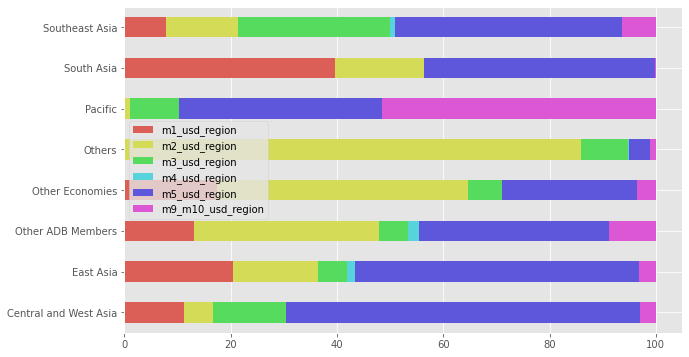

In [1333]:
ax = regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]]\
.plot(kind='barh', stacked=True, figsize=(10, 6),
      colormap=ListedColormap(sns.color_palette("hls", 6)))
ax.set(ylabel='')
plt.show()

In [1334]:
regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]]

m1_usd_region  m2_usd_region  m3_usd_region  \
region                                                               
Central and West Asia      11.254682       5.471959      13.721599   
East Asia                  20.510753      15.908392       5.503147   
Other ADB Members          13.169874      34.636288       5.638338   
Other Economies            17.328107      47.371013       6.289569   
Others                      0.189667      85.691279       8.957597   
Pacific                     0.000000       1.064969       9.161208   
South Asia                 39.682997      16.597066       0.155650   
Southeast Asia              7.851521      13.525932      28.580482   

                       m4_usd_region  m5_usd_region  m9_m10_usd_region  
region                                                                  
Central and West Asia       0.000000      66.564395           2.987365  
East Asia                   1.402477      53.408472           3.266759  
Other ADB Members           1.976887      35.677134           8.901478  
Other Economies             0.140291      25.341347           3.529673  
Others                      0.010413       4.101812           1.049232  
Pacific                     0.000000      38.231103          51.542720  
South Asia                  0.000000      43.418841           0.145447  
Southeast Asia              0.955381      42.719721           6.366964

In [1335]:
mask = regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]].index.isin(['Other Economies', 'Other ADB Members', 'Others'])

In [1336]:
regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]][~mask]

m1_usd_region  m2_usd_region  m3_usd_region  \
region                                                               
Central and West Asia      11.254682       5.471959      13.721599   
East Asia                  20.510753      15.908392       5.503147   
Pacific                     0.000000       1.064969       9.161208   
South Asia                 39.682997      16.597066       0.155650   
Southeast Asia              7.851521      13.525932      28.580482   

                       m4_usd_region  m5_usd_region  m9_m10_usd_region  
region                                                                  
Central and West Asia       0.000000      66.564395           2.987365  
East Asia                   1.402477      53.408472           3.266759  
Pacific                     0.000000      38.231103          51.542720  
South Asia                  0.000000      43.418841           0.145447  
Southeast Asia              0.955381      42.719721           6.366964

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:15: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  from ipykernel import kernelapp as app


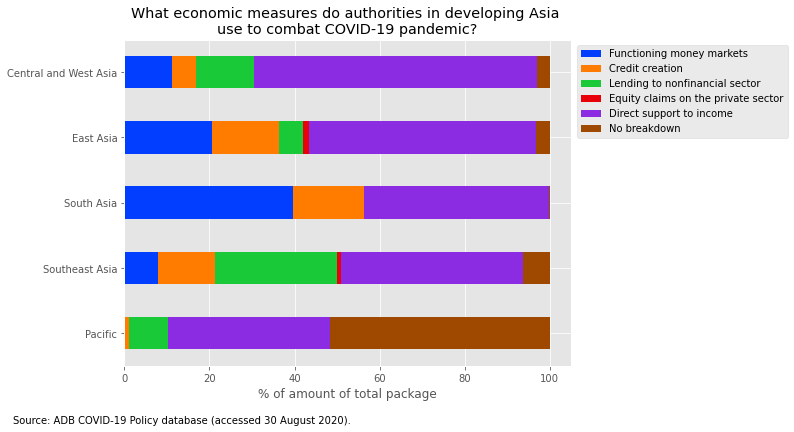

In [1430]:
fig, ax = plt.subplots()
regional_sum.iloc[:, [30, 31, 32, 33, 34, 37]][~mask].iloc[[0, 1, 3, 4, 2], :].\
plot(kind='barh', stacked=True, figsize=(8, 6), 
     colormap=ListedColormap(sns.color_palette('bright', 6)), ax=ax)
ax.invert_yaxis()
ax.set(title='What economic measures do authorities in developing Asia \nuse to combat COVID-19 pandemic?',
       ylabel='', xlabel='% of amount of total package')


ax.legend(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income',
           'No breakdown'],
           loc='upper center', bbox_to_anchor=(1.25, 1))
ax.annotate('Source: ADB COVID-19 Policy database (accessed 30 August 2020).', 
            xy=(-0.25, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')

# plt.tight_layout()
plt.show()
fig.savefig('package-by-measure.png', bbox_inches='tight', dpi=fig.dpi)

In [1373]:
donut_df = pd.DataFrame(regional_sum.loc[~mask, 'm5_usd_region'])

In [1374]:
donut_df = donut_df.assign(other_measures_share = lambda x: 100 - x.m5_usd_region)

In [1375]:
regional_sum.loc[~mask, ['m5', 'm5_gdp', 'm5_pkg', 'm5_usd_region']]

m5     m5_gdp       m5_pkg  m5_usd_region
region                                                                    
Central and West Asia  2.804594e+10  24.003223   559.144639      66.564395
East Asia              1.514844e+12  38.074808   198.548082      53.408472
Pacific                9.774582e+08  88.394138  1071.562202      38.231103
South Asia             1.641861e+11  24.930883   299.308927      43.418841
Southeast Asia         1.797966e+11  45.795580   463.409628      42.719721

In [1376]:
regional_sum.loc[~mask, 'm5']/1e9

region
Central and West Asia      28.045943
East Asia                1514.843956
Pacific                     0.977458
South Asia                164.186122
Southeast Asia            179.796595
Name: m5, dtype: float64

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:50: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


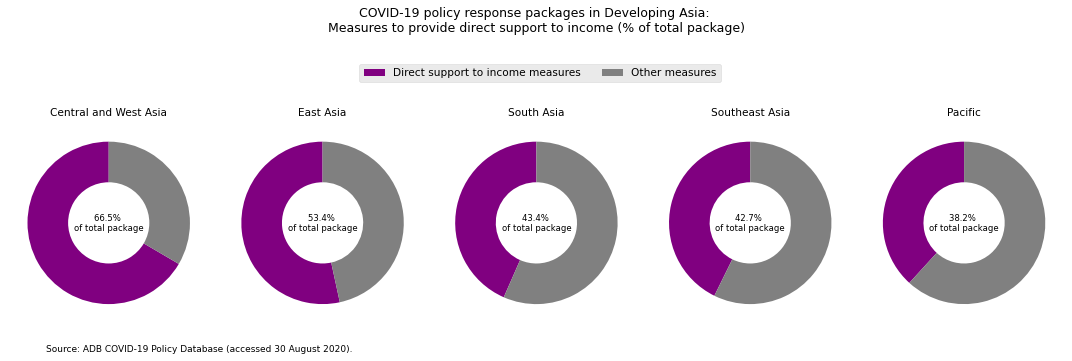

In [1377]:
fig, axs = plt.subplots(figsize=(15, 6), nrows=1, ncols=5)

wedges, texts = axs[0].pie(donut_df.loc['Central and West Asia', ['m5_usd_region', 'other_measures_share']], 
                                         wedgeprops=dict(width=0.5), startangle=90,
                                         colors=['purple', 'gray'])
axs[0].text(0, -0.1, '66.5% \nof total package',
               ha='center', fontsize=8.5)
axs[0].set_title('Central and West Asia', fontsize=10.5)

wedges, texts = axs[1].pie(donut_df.loc['East Asia', ['m5_usd_region', 'other_measures_share']], 
                                         wedgeprops=dict(width=0.5), startangle=90,
                                         colors=['purple', 'gray'])
axs[1].text(0, -0.1, '53.4% \nof total package',
               ha='center', fontsize=8.5)
axs[1].set_title('East Asia', fontsize=10.5)

wedges, texts = axs[4].pie(donut_df.loc['Pacific', ['m5_usd_region', 'other_measures_share']], 
                                         wedgeprops=dict(width=0.5), startangle=90,
                                         colors=['purple', 'gray'])
axs[4].text(0, -0.1, '38.2% \nof total package',
               ha='center', fontsize=8.5)
axs[4].set_title('Pacific', fontsize=10.5)

wedges, texts = axs[2].pie(donut_df.loc['South Asia', ['m5_usd_region', 'other_measures_share']], 
                                         wedgeprops=dict(width=0.5), startangle=90,
                                         colors=['purple', 'gray'])
axs[2].text(0, -0.1, '43.4% \nof total package', 
               ha='center', fontsize=8.5)
axs[2].set_title('South Asia', fontsize=10.5)

wedges, texts = axs[3].pie(donut_df.loc['Southeast Asia', ['m5_usd_region', 'other_measures_share']], 
                                         wedgeprops=dict(width=0.5), startangle=90,
                                         colors=['purple', 'gray'])
axs[3].text(0, -0.1, '42.7% \nof total package',
               ha='center', fontsize=8.5)
axs[3].set_title('Southeast Asia', fontsize=10.5)


fig.suptitle('COVID-19 policy response packages in Developing Asia: \
\nMeasures to provide direct support to income (% of total package)',
             y=1, fontsize=12.5)

fig.legend(['Direct support to income measures', 'Other measures'], 
           loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.7), 
           frameon=True, fontsize=10.5)
fig.tight_layout()
# fig.subplots_adjust(wspace=0, hspace=0)
plt.annotate('Source: ADB COVID-19 Policy Database (accessed 30 August 2020).', 
            xy=(-4, -0.1), xycoords='axes fraction', textcoords='offset points', 
            va='top', fontsize=9)
plt.show()
fig.savefig('donut-m5-region.png', bbox_inches='tight', dpi=fig.dpi)

In [1038]:
df3.reset_index(level=0).sort_values(by='m1', ascending=False).loc[:, ['m1_gdp', 'm1']]

m1_gdp            m1
country                                                
Japan                           17.991495  9.273680e+11
Germany                         13.085335  5.055310e+11
United States                    2.052926  4.401370e+11
People's Republic of China       3.023069  4.274680e+11
Canada                          10.815525  1.872070e+11
...                                   ...           ...
Cook Islands                     0.000000  0.000000e+00
Federated States of Micronesia   0.000000  0.000000e+00
Fiji                             0.000000  0.000000e+00
Kiribati                         0.000000  0.000000e+00
Viet Nam                         0.000000  0.000000e+00

[79 rows x 2 columns]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:36: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


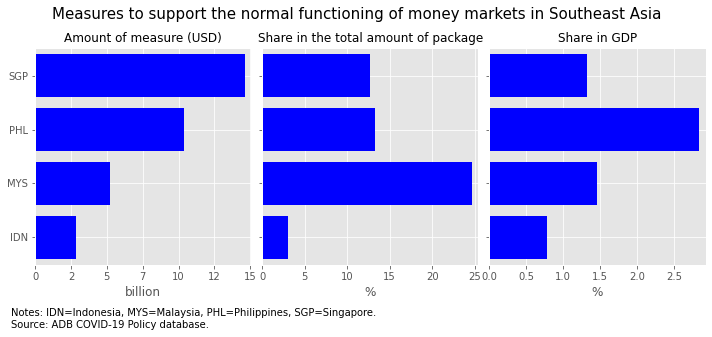

In [1039]:
y0 = df3.loc['Southeast Asia'].sort_values(by='m1').loc[:, 'm1']
y1 = df3.loc['Southeast Asia'].sort_values(by='m1').loc[:, 'm1_pkg']
y2 = df3.loc['Southeast Asia'].sort_values(by='m1').loc[:, 'm1_gdp']

fig, axs = plt.subplots(ncols=3, figsize=(10, 4), sharey=True)

axs[0].barh(y0.loc['Singapore':].index, y0.loc['Singapore':], align='center', color='blue')
# axs[0].invert_yaxis()
axs[0].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[0].set_title('Amount of measure (USD)', fontsize=12)
axs[0].set_xlabel('billion')

axs[1].barh(y1.loc['Singapore':].index, y1.loc['Singapore':], align='center', color='blue')
# axs[1].invert_yaxis()
axs[1].set_title('Share in the total amount of package', fontsize=12)
axs[1].set_xlabel('%')

axs[2].barh(y2.loc['Singapore':].index, y2.loc['Singapore':], align='center', color='blue')
# axs[2].invert_yaxis()
axs[2].set_title('Share in GDP', fontsize=12)
axs[2].set_xlabel('%')

# axs[0].invert_xaxis()
axs[0].set(yticks=y0.loc['Singapore':].index, yticklabels=['IDN', 'MYS', 'PHL', 'SGP'])
# axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('Measures to support the normal functioning of money markets in Southeast Asia',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.05)
plt.annotate('Notes: IDN=Indonesia, MYS=Malaysia, PHL=Philippines, SGP=Singapore. \nSource: ADB COVID-19 Policy database.', 
            xy=(-2.2, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [1040]:
y0

country
Brunei Darussalam    0.000000e+00
Cambodia             0.000000e+00
Lao PDR              0.000000e+00
Myanmar              0.000000e+00
Thailand             0.000000e+00
Timor-Leste          0.000000e+00
Viet Nam             0.000000e+00
Singapore            2.823862e+09
Philippines          5.200693e+09
Malaysia             1.038223e+10
Indonesia            1.463829e+10
Name: m1, dtype: float64

In [1041]:
df3.loc['Southeast Asia'].iloc[:, 7:12].loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']]

m1            m2            m3            m4  \
country                                                               
Indonesia    1.463829e+10  1.645324e+10  4.575318e+10  0.000000e+00   
Malaysia     1.038223e+10  1.163928e+10  2.519903e+10  2.793426e+08   
Philippines  5.200693e+09  2.357397e+09  3.637857e+08  0.000000e+00   
Singapore    2.823862e+09  0.000000e+00  2.096717e+10  3.741617e+09   
Thailand     0.000000e+00  2.647334e+10  1.401530e+10  0.000000e+00   
Viet Nam     0.000000e+00  0.000000e+00  1.360017e+10  0.000000e+00   

                       m5  
country                    
Indonesia    3.893056e+10  
Malaysia     2.210040e+10  
Philippines  1.027523e+10  
Singapore    5.158913e+10  
Thailand     4.360315e+10  
Viet Nam     1.290295e+10

In [1042]:
df3.loc['Southeast Asia'].iloc[:, 14:19].loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']]

m1_pkg     m2_pkg     m3_pkg    m4_pkg     m5_pkg
country                                                          
Indonesia    12.643714  14.211362  39.518955  0.000000  33.625969
Malaysia     13.234421  14.836795  32.121662  0.356083  28.171780
Philippines  24.711518  11.201365   1.728557  0.000000  48.823577
Singapore     3.065357   0.000000  22.760278  4.061598  56.001012
Thailand      0.000000  31.481481  16.666667  0.000000  51.851852
Viet Nam      0.000000   0.000000  51.315362  0.000000  48.684638

In [1043]:
df3.loc['Southeast Asia'].iloc[:, 21:26].loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']]

m1_gdp    m2_gdp    m3_gdp    m4_gdp     m5_gdp
country                                                       
Indonesia    1.316737  1.479994  4.115567  0.000000   3.501862
Malaysia     2.842088  3.186198  6.898118  0.076469   6.049882
Philippines  1.457536  0.660680  0.101954  0.000000   2.879715
Singapore    0.778314  0.000000  5.778978  1.031265  14.219010
Thailand     0.000000  5.002738  2.648509  0.000000   8.239804
Viet Nam     0.000000  0.000000  5.198107  0.000000   4.931622

In [1044]:
y1 = df3.loc['Southeast Asia'].iloc[:, 7:12].loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']]
y2 = df3.loc['Southeast Asia'].iloc[:, 14:19].loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']]
y3 = df3.loc['Southeast Asia'].iloc[:, 21:26].loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']]

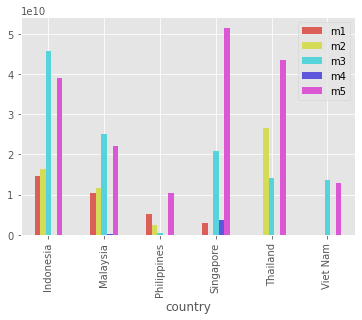

In [1045]:
y1 = df3.loc['Southeast Asia'].iloc[:, 7:12].loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam']]
y1.plot(kind='bar', colormap=ListedColormap(sns.color_palette('hls', 6)))

In [1046]:
df3.reset_index(level=0).loc['Indonesia'].iloc[8:13]

m1    1.46383e+10
m2    1.64532e+10
m3    4.57532e+10
m4              0
m5    3.89306e+10
Name: Indonesia, dtype: object

In [1047]:
df3.reset_index(level=0).loc['Indonesia'].iloc[15:20]

m1_pkg    12.6437
m2_pkg    14.2114
m3_pkg     39.519
m4_pkg          0
m5_pkg     33.626
Name: Indonesia, dtype: object

In [1048]:
df3.reset_index(level=0).loc['Indonesia'].iloc[22:27]

m1_gdp    1.31674
m2_gdp    1.47999
m3_gdp    4.11557
m4_gdp          0
m5_gdp    3.50186
Name: Indonesia, dtype: object

In [1049]:
measures

[1, 2, 3, 4, 5, 9, 10]

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:128: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


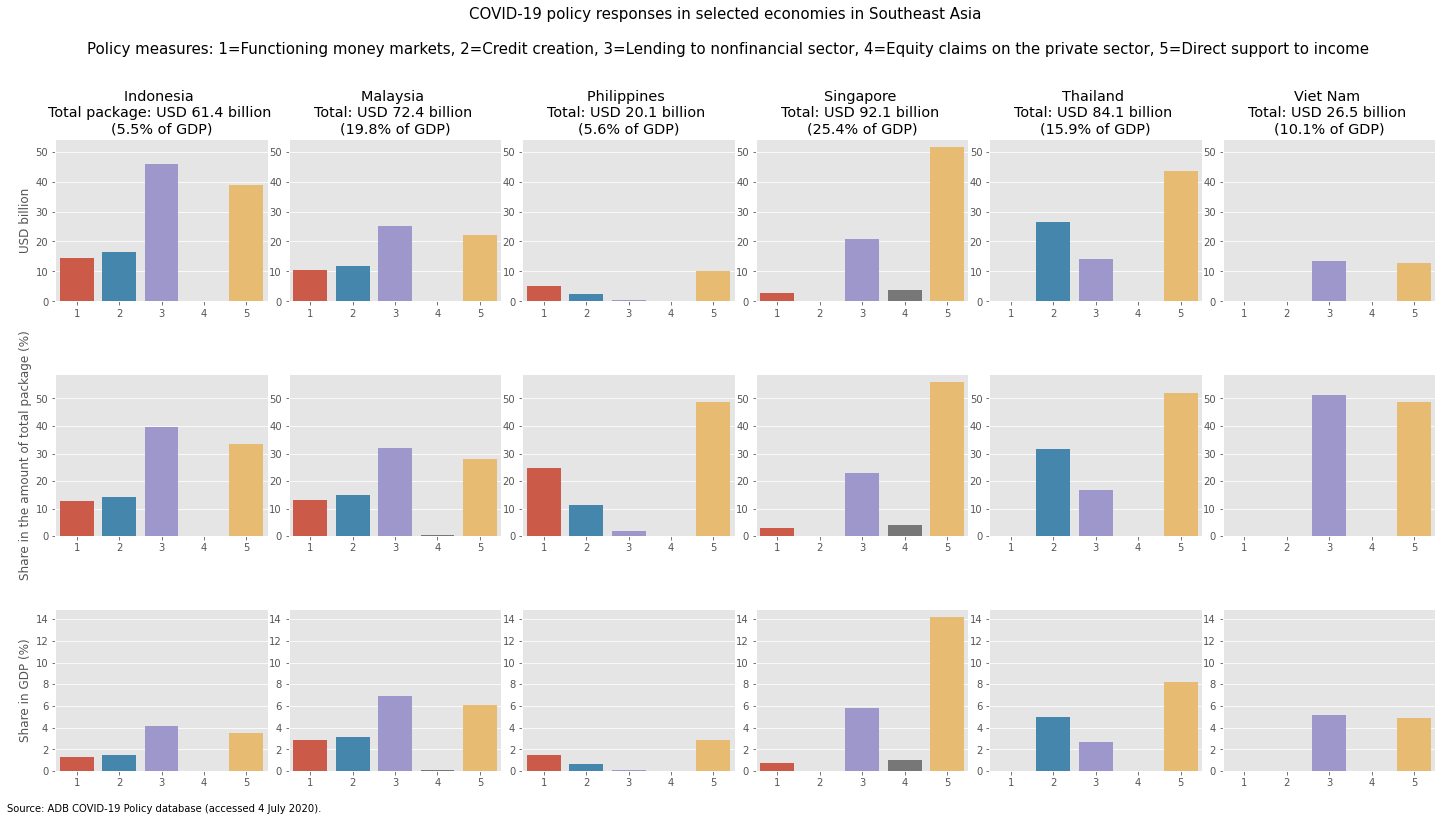

In [1050]:
from matplotlib.ticker import MaxNLocator
fig = plt.figure(figsize=(20, 10))

ino_1 = df3.reset_index(level=0).loc['Indonesia'].iloc[8:13]
ino_2 = df3.reset_index(level=0).loc['Indonesia'].iloc[15:20]
ino_3 = df3.reset_index(level=0).loc['Indonesia'].iloc[22:27]

mal_1 = df3.reset_index(level=0).loc['Malaysia'].iloc[8:13]
mal_2 = df3.reset_index(level=0).loc['Malaysia'].iloc[15:20]
mal_3 = df3.reset_index(level=0).loc['Malaysia'].iloc[22:27]

phi_1 = df3.reset_index(level=0).loc['Philippines'].iloc[8:13]
phi_2 = df3.reset_index(level=0).loc['Philippines'].iloc[15:20]
phi_3 = df3.reset_index(level=0).loc['Philippines'].iloc[22:27]

sin_1 = df3.reset_index(level=0).loc['Singapore'].iloc[8:13]
sin_2 = df3.reset_index(level=0).loc['Singapore'].iloc[15:20]
sin_3 = df3.reset_index(level=0).loc['Singapore'].iloc[22:27]

tha_1 = df3.reset_index(level=0).loc['Thailand'].iloc[8:13]
tha_2 = df3.reset_index(level=0).loc['Thailand'].iloc[15:20]
tha_3 = df3.reset_index(level=0).loc['Thailand'].iloc[22:27]

vie_1 = df3.reset_index(level=0).loc['Viet Nam'].iloc[8:13]
vie_2 = df3.reset_index(level=0).loc['Viet Nam'].iloc[15:20]
vie_3 = df3.reset_index(level=0).loc['Viet Nam'].iloc[22:27]

ax1 = plt.subplot(361)
sns.barplot(x=ino_1.index, y=ino_1, ax=ax1)
ax1.set(title='Indonesia \nTotal package: USD 61.4 billion \n(5.5% of GDP)', ylabel='USD billion', xticklabels=[1, 2, 3, 4, 5])
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
# ax1.get_xaxis().set_visible(False)
# ax1.annotate('Total package: USD 61.4 billion',
#              xy=(1, 80), xycoords='axes points', textcoords='offset points')

ax2 = plt.subplot(362, sharey=ax1)
sns.barplot(x=mal_1.index, y=mal_1, ax=ax2)
ax2.set(title='Malaysia \nTotal: USD 72.4 billion \n(19.8% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax2.get_xaxis().set_visible(False)

ax3 = plt.subplot(363, sharey=ax1)
sns.barplot(x=phi_1.index, y=phi_1, ax=ax3)
ax3.set(title='Philippines \nTotal: USD 20.1 billion \n(5.6% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax3.get_xaxis().set_visible(False)

ax4 = plt.subplot(364, sharey=ax1)
sns.barplot(x=sin_1.index, y=sin_1, ax=ax4)
ax4.set(title='Singapore \nTotal: USD 92.1 billion \n(25.4% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax4.get_xaxis().set_visible(False)

ax5 = plt.subplot(365, sharey=ax1)
sns.barplot(x=tha_1.index, y=tha_1, ax=ax5)
ax5.set(title='Thailand \nTotal: USD 84.1 billion \n(15.9% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax5.get_xaxis().set_visible(False)

ax6 = plt.subplot(366, sharey=ax1)
sns.barplot(x=vie_1.index, y=vie_1, ax=ax6)
ax6.set(title='Viet Nam \nTotal: USD 26.5 billion \n(10.1% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax6.get_xaxis().set_visible(False)

ax7 = plt.subplot(367)
sns.barplot(x=ino_2.index, y=ino_2, ax=ax7)
ax7.set(title='', ylabel='Share in the amount of total package (%)', xticklabels=[1, 2, 3, 4, 5])
# ax7.get_xaxis().set_visible(False)

ax8 = plt.subplot(368, sharey=ax7)
sns.barplot(x=mal_2.index, y=mal_2, ax=ax8)
ax8.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax8.get_xaxis().set_visible(False)

ax9 = plt.subplot(369, sharey=ax7)
sns.barplot(x=phi_2.index, y=phi_2, ax=ax9)
ax9.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax9.get_xaxis().set_visible(False)

ax10 = plt.subplot(3, 6, 10, sharey=ax7)
sns.barplot(x=sin_2.index, y=sin_2, ax=ax10)
ax10.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax10.get_xaxis().set_visible(False)

ax11 = plt.subplot(3, 6, 11, sharey=ax7)
sns.barplot(x=tha_2.index, y=tha_2, ax=ax11)
ax11.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax11.get_xaxis().set_visible(False)

ax12 = plt.subplot(3, 6, 12, sharey=ax7)
sns.barplot(x=vie_2.index, y=vie_2, ax=ax12)
ax12.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax12.get_xaxis().set_visible(False)

ax13 = plt.subplot(3, 6, 13)
sns.barplot(x=ino_3.index, y=ino_3, ax=ax13)
ax13.set(title='', ylabel='Share in GDP (%)', xticklabels=[1, 2, 3, 4, 5])
# ax13.get_xaxis().set_visible(False)
ax13.yaxis.set_major_locator(MaxNLocator(integer=True))

ax14 = plt.subplot(3, 6, 14, sharey=ax13)
sns.barplot(x=mal_3.index, y=mal_3, ax=ax14)
ax14.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax14.get_xaxis().set_visible(False)

ax15 = plt.subplot(3, 6, 15, sharey=ax13)
sns.barplot(x=phi_3.index, y=phi_3, ax=ax15)
ax15.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax15.get_xaxis().set_visible(False)

ax16 = plt.subplot(3, 6, 16, sharey=ax13)
sns.barplot(x=sin_3.index, y=sin_3, ax=ax16)
ax16.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax16.get_xaxis().set_visible(False)

ax17 = plt.subplot(3, 6, 17, sharey=ax13)
sns.barplot(x=tha_3.index, y=tha_3, ax=ax17)
ax17.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax17.get_xaxis().set_visible(False)

ax18 = plt.subplot(3, 6, 18, sharey=ax13)
sns.barplot(x=vie_3.index, y=vie_3, ax=ax18)
ax18.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax18.get_xaxis().set_visible(False)

fig.suptitle('COVID-19 policy responses in selected economies in Southeast Asia \n\nPolicy measures: 1=Functioning money markets, 2=Credit creation, \
3=Lending to nonfinancial sector, 4=Equity claims on the private sector, 5=Direct support to income',
             y=1.1, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1)
plt.annotate('Source: ADB COVID-19 Policy database (accessed 4 July 2020).', 
            xy=(-5.7, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [1051]:
round(df3.reset_index(level=0).loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam'], 
                             'amount_usd']/1e9, ndigits=1)

country
Indonesia      115.8
Malaysia        78.4
Philippines     21.0
Singapore       92.1
Thailand        84.1
Viet Nam        26.5
Name: amount_usd, dtype: float64

In [1052]:
round(df3.reset_index(level=0).loc[['Indonesia', 'Malaysia', 'Philippines', 'Singapore', 'Thailand', 'Viet Nam'], 
                             'pkg_gdp'], ndigits=1)

country
Indonesia      10.4
Malaysia       21.5
Philippines     5.9
Singapore      25.4
Thailand       15.9
Viet Nam       10.1
Name: pkg_gdp, dtype: float64

In [1053]:
measures = pd.DataFrame(['Functioning money markets', 'Credit creation', 'Lending to nonfinancial sector',
           'Equity claims on the private sector', 'Direct support to income'])

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:127: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


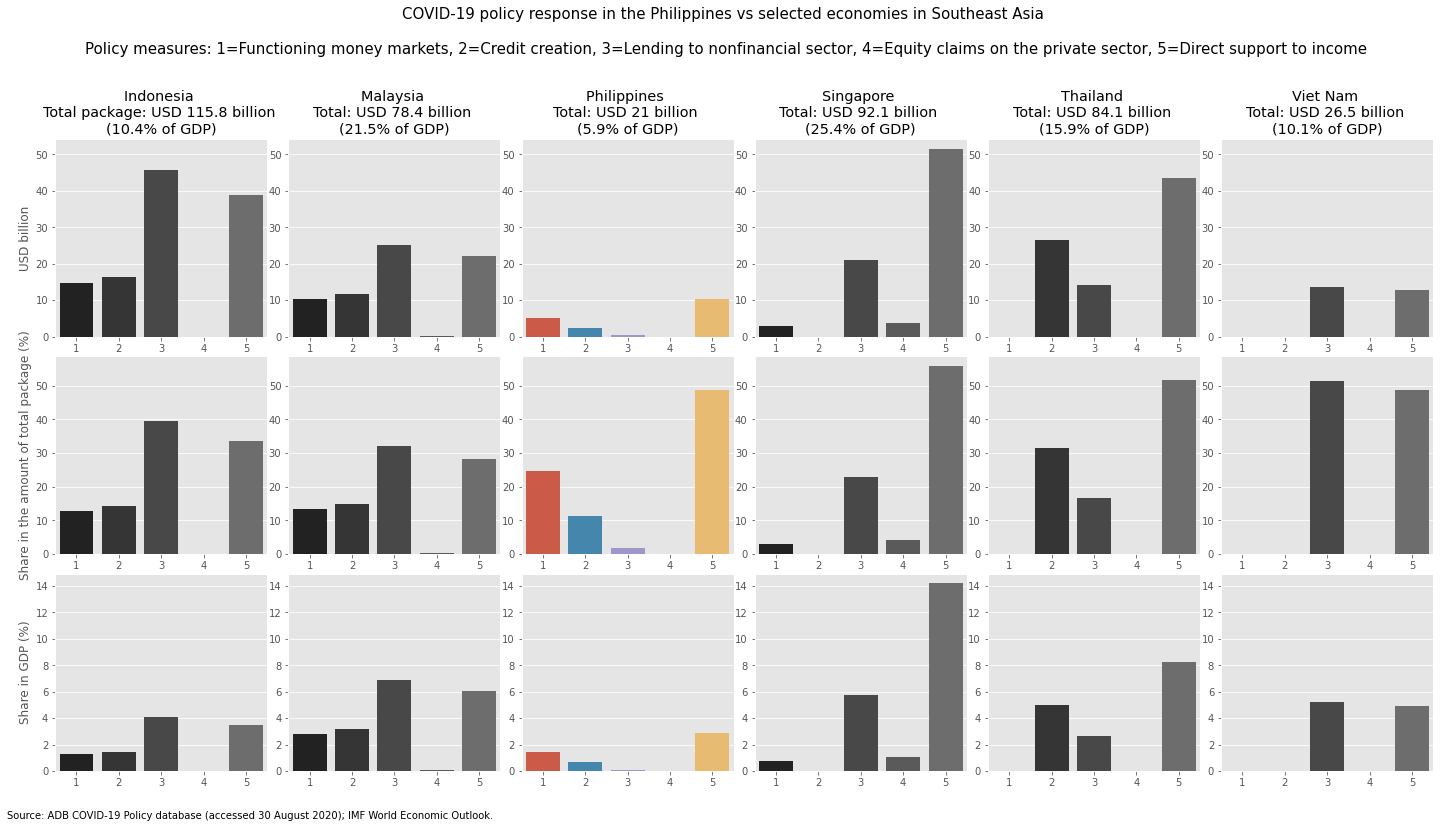

In [1054]:
fig = plt.figure(figsize=(20, 10))

ino_1 = df3.reset_index(level=0).loc['Indonesia'].iloc[8:13]
ino_2 = df3.reset_index(level=0).loc['Indonesia'].iloc[15:20]
ino_3 = df3.reset_index(level=0).loc['Indonesia'].iloc[22:27]

mal_1 = df3.reset_index(level=0).loc['Malaysia'].iloc[8:13]
mal_2 = df3.reset_index(level=0).loc['Malaysia'].iloc[15:20]
mal_3 = df3.reset_index(level=0).loc['Malaysia'].iloc[22:27]

phi_1 = df3.reset_index(level=0).loc['Philippines'].iloc[8:13]
phi_2 = df3.reset_index(level=0).loc['Philippines'].iloc[15:20]
phi_3 = df3.reset_index(level=0).loc['Philippines'].iloc[22:27]

sin_1 = df3.reset_index(level=0).loc['Singapore'].iloc[8:13]
sin_2 = df3.reset_index(level=0).loc['Singapore'].iloc[15:20]
sin_3 = df3.reset_index(level=0).loc['Singapore'].iloc[22:27]

tha_1 = df3.reset_index(level=0).loc['Thailand'].iloc[8:13]
tha_2 = df3.reset_index(level=0).loc['Thailand'].iloc[15:20]
tha_3 = df3.reset_index(level=0).loc['Thailand'].iloc[22:27]

vie_1 = df3.reset_index(level=0).loc['Viet Nam'].iloc[8:13]
vie_2 = df3.reset_index(level=0).loc['Viet Nam'].iloc[15:20]
vie_3 = df3.reset_index(level=0).loc['Viet Nam'].iloc[22:27]

ax1 = plt.subplot(361)
sns.barplot(x=ino_1.index, y=ino_1, palette=sns.dark_palette('gray'), ax=ax1)
ax1.set(title='Indonesia \nTotal package: USD 115.8 billion \n(10.4% of GDP)', ylabel='USD billion', xticklabels=[1, 2, 3, 4, 5])
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
# ax1.get_xaxis().set_visible(False)
# ax1.annotate('Total package: USD 61.4 billion',
#              xy=(1, 80), xycoords='axes points', textcoords='offset points')

ax2 = plt.subplot(362, sharey=ax1)
sns.barplot(x=mal_1.index, y=mal_1, palette=sns.dark_palette('gray'), ax=ax2)
ax2.set(title='Malaysia \nTotal: USD 78.4 billion \n(21.5% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax2.get_xaxis().set_visible(False)

ax3 = plt.subplot(363, sharey=ax1)
sns.barplot(x=phi_1.index, y=phi_1, ax=ax3)
ax3.set(title='Philippines \nTotal: USD 21 billion \n(5.9% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax3.get_xaxis().set_visible(False)

ax4 = plt.subplot(364, sharey=ax1)
sns.barplot(x=sin_1.index, y=sin_1, palette=sns.dark_palette('gray'), ax=ax4)
ax4.set(title='Singapore \nTotal: USD 92.1 billion \n(25.4% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax4.get_xaxis().set_visible(False)

ax5 = plt.subplot(365, sharey=ax1)
sns.barplot(x=tha_1.index, y=tha_1, palette=sns.dark_palette('gray'), ax=ax5)
ax5.set(title='Thailand \nTotal: USD 84.1 billion \n(15.9% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax5.get_xaxis().set_visible(False)

ax6 = plt.subplot(366, sharey=ax1)
sns.barplot(x=vie_1.index, y=vie_1, palette=sns.dark_palette('gray'), ax=ax6)
ax6.set(title='Viet Nam \nTotal: USD 26.5 billion \n(10.1% of GDP)', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax6.get_xaxis().set_visible(False)

ax7 = plt.subplot(367)
sns.barplot(x=ino_2.index, y=ino_2, palette=sns.dark_palette('gray'), ax=ax7)
ax7.set(title='', ylabel='Share in the amount of total package (%)', xticklabels=[1, 2, 3, 4, 5])
# ax7.get_xaxis().set_visible(False)

ax8 = plt.subplot(368, sharey=ax7)
sns.barplot(x=mal_2.index, y=mal_2, palette=sns.dark_palette('gray'), ax=ax8)
ax8.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax8.get_xaxis().set_visible(False)

ax9 = plt.subplot(369, sharey=ax7)
sns.barplot(x=phi_2.index, y=phi_2, ax=ax9)
ax9.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax9.get_xaxis().set_visible(False)

ax10 = plt.subplot(3, 6, 10, sharey=ax7)
sns.barplot(x=sin_2.index, y=sin_2, palette=sns.dark_palette('gray'), ax=ax10)
ax10.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax10.get_xaxis().set_visible(False)

ax11 = plt.subplot(3, 6, 11, sharey=ax7)
sns.barplot(x=tha_2.index, y=tha_2, palette=sns.dark_palette('gray'), ax=ax11)
ax11.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax11.get_xaxis().set_visible(False)

ax12 = plt.subplot(3, 6, 12, sharey=ax7)
sns.barplot(x=vie_2.index, y=vie_2, palette=sns.dark_palette('gray'), ax=ax12)
ax12.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax12.get_xaxis().set_visible(False)

ax13 = plt.subplot(3, 6, 13)
sns.barplot(x=ino_3.index, y=ino_3, palette=sns.dark_palette('gray'), ax=ax13)
ax13.set(title='', ylabel='Share in GDP (%)', xticklabels=[1, 2, 3, 4, 5])
# ax13.get_xaxis().set_visible(False)
ax13.yaxis.set_major_locator(MaxNLocator(integer=True))

ax14 = plt.subplot(3, 6, 14, sharey=ax13)
sns.barplot(x=mal_3.index, y=mal_3, palette=sns.dark_palette('gray'), ax=ax14)
ax14.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax14.get_xaxis().set_visible(False)

ax15 = plt.subplot(3, 6, 15, sharey=ax13)
sns.barplot(x=phi_3.index, y=phi_3, ax=ax15)
ax15.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax15.get_xaxis().set_visible(False)

ax16 = plt.subplot(3, 6, 16, sharey=ax13)
sns.barplot(x=sin_3.index, y=sin_3, palette=sns.dark_palette('gray'), ax=ax16)
ax16.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax16.get_xaxis().set_visible(False)

ax17 = plt.subplot(3, 6, 17, sharey=ax13)
sns.barplot(x=tha_3.index, y=tha_3, palette=sns.dark_palette('gray'), ax=ax17)
ax17.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax17.get_xaxis().set_visible(False)

ax18 = plt.subplot(3, 6, 18, sharey=ax13)
sns.barplot(x=vie_3.index, y=vie_3, palette=sns.dark_palette('gray'), ax=ax18)
ax18.set(title='', ylabel='', xticklabels=[1, 2, 3, 4, 5])
# ax18.get_xaxis().set_visible(False)

fig.suptitle('COVID-19 policy response in the Philippines vs selected economies in Southeast Asia \n\nPolicy measures: 1=Functioning money markets, 2=Credit creation, \
3=Lending to nonfinancial sector, 4=Equity claims on the private sector, 5=Direct support to income',
             y=1.1, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.1, hspace=0.1)
plt.annotate('Source: ADB COVID-19 Policy database (accessed 30 August 2020); IMF World Economic Outlook.', 
            xy=(-5.7, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()
fig.savefig('sea-philippines.png', bbox_inches='tight', dpi=fig.dpi)

In [1055]:
df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)['amount_usd']

country
Kazakhstan         2.379624e+10
Pakistan           1.379443e+10
Georgia            1.936210e+09
Azerbaijan         1.597265e+09
Armenia            6.134861e+08
Kyrgyz Republic    2.580000e+08
Afghanistan        1.016625e+08
Uzbekistan         3.213240e+07
Tajikistan         4.124302e+06
Turkmenistan       0.000000e+00
Name: amount_usd, dtype: float64

In [1056]:
df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm1', 'm2', 'm3', 'm4', 'm5']]

amount_usd            m1            m2            m3   m4  \
country                                                                        
Kazakhstan       2.379624e+10  4.244997e+09  0.000000e+00  8.732565e+08  0.0   
Pakistan         1.379443e+10  0.000000e+00  1.654442e+09  4.908140e+09  0.0   
Georgia          1.936210e+09  2.700000e+08  3.058474e+08  0.000000e+00  0.0   
Azerbaijan       1.597265e+09  0.000000e+00  2.941176e+08  0.000000e+00  0.0   
Armenia          6.134861e+08  0.000000e+00  5.112384e+07  0.000000e+00  0.0   
Kyrgyz Republic  2.580000e+08  2.270000e+08  0.000000e+00  0.000000e+00  0.0   
Afghanistan      1.016625e+08  0.000000e+00  0.000000e+00  0.000000e+00  0.0   
Uzbekistan       3.213240e+07  0.000000e+00  0.000000e+00  0.000000e+00  0.0   
Tajikistan       4.124302e+06  0.000000e+00  0.000000e+00  0.000000e+00  0.0   
Turkmenistan     0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.0   

                           m5  
country                        
Kazakhstan       1.867799e+10  
Pakistan         7.231848e+09  
Georgia          1.195929e+09  
Azerbaijan       7.099118e+08  
Armenia          6.134861e+07  
Kyrgyz Republic  3.100000e+07  
Afghanistan      1.016625e+08  
Uzbekistan       3.213240e+07  
Tajikistan       4.124302e+06  
Turkmenistan     0.000000e+00

In [1057]:
df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm5']]

amount_usd            m5
country                                    
Kazakhstan       2.379624e+10  1.867799e+10
Pakistan         1.379443e+10  7.231848e+09
Georgia          1.936210e+09  1.195929e+09
Azerbaijan       1.597265e+09  7.099118e+08
Armenia          6.134861e+08  6.134861e+07
Kyrgyz Republic  2.580000e+08  3.100000e+07
Afghanistan      1.016625e+08  1.016625e+08
Uzbekistan       3.213240e+07  3.213240e+07
Tajikistan       4.124302e+06  4.124302e+06
Turkmenistan     0.000000e+00  0.000000e+00

In [1058]:
mask = df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm1', 'm2', 'm3', 'm4', 'm5']].index.isin(['Turkmenistan'])

In [1059]:
data = df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm5']][~mask]

In [1060]:
data

amount_usd            m5
country                                    
Kazakhstan       2.379624e+10  1.867799e+10
Pakistan         1.379443e+10  7.231848e+09
Georgia          1.936210e+09  1.195929e+09
Azerbaijan       1.597265e+09  7.099118e+08
Armenia          6.134861e+08  6.134861e+07
Kyrgyz Republic  2.580000e+08  3.100000e+07
Afghanistan      1.016625e+08  1.016625e+08
Uzbekistan       3.213240e+07  3.213240e+07
Tajikistan       4.124302e+06  4.124302e+06

[Text(0, 0.5, ''), Text(0.5, 0, 'Amounf of total package (USD billion)')]

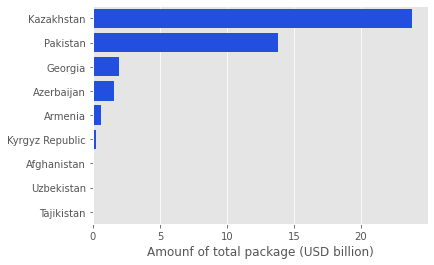

In [1061]:
ax = sns.barplot(x=data['amount_usd'], y=data.index, palette=sns.color_palette('bright', 1))
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
ax.set(ylabel='', xlabel='Amounf of total package (USD billion)')

In [1062]:
data

amount_usd            m5
country                                    
Kazakhstan       2.379624e+10  1.867799e+10
Pakistan         1.379443e+10  7.231848e+09
Georgia          1.936210e+09  1.195929e+09
Azerbaijan       1.597265e+09  7.099118e+08
Armenia          6.134861e+08  6.134861e+07
Kyrgyz Republic  2.580000e+08  3.100000e+07
Afghanistan      1.016625e+08  1.016625e+08
Uzbekistan       3.213240e+07  3.213240e+07
Tajikistan       4.124302e+06  4.124302e+06

In [1063]:
df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm5']].iloc[:2, :]

amount_usd            m5
country                               
Kazakhstan  2.379624e+10  1.867799e+10
Pakistan    1.379443e+10  7.231848e+09

In [1064]:
other = pd.Series(df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm5']].iloc[2:, :].sum(), name='Others')

In [1065]:
other

amount_usd    4.542880e+09
m5            2.136109e+09
Name: Others, dtype: float64

In [1066]:
df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm5']].iloc[:2, :].append(other)

amount_usd            m5
country                               
Kazakhstan  2.379624e+10  1.867799e+10
Pakistan    1.379443e+10  7.231848e+09
Others      4.542880e+09  2.136109e+09

In [1067]:
data = df3.loc['Central and West Asia'].sort_values(by='amount_usd', ascending=False)[
    ['amount_usd', 'm5']].iloc[:2, :].append(other)

In [1068]:
data

amount_usd            m5
country                               
Kazakhstan  2.379624e+10  1.867799e+10
Pakistan    1.379443e+10  7.231848e+09
Others      4.542880e+09  2.136109e+09

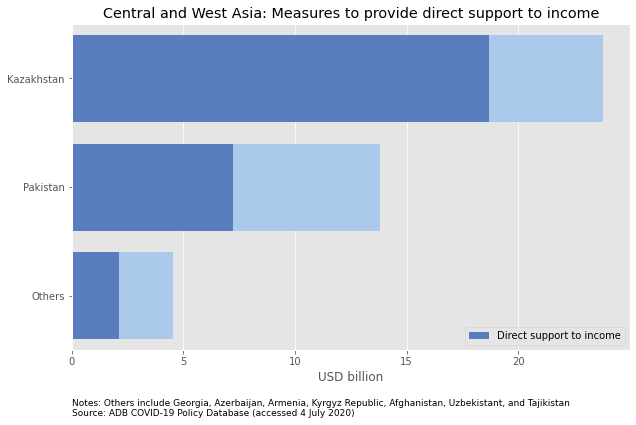

In [1070]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.set_color_codes('pastel')
sns.barplot(x=data.amount_usd, y=data.index, color='b')
sns.set_color_codes('muted')
sns.barplot(x=data.m5, y=data.index, label='Direct support to income', color='b')
ax.legend(frameon=True)
ax.set(title='Central and West Asia: Measures to provide direct support to income', ylabel='', xlabel='USD billion')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
ax.annotate('Notes: Others include Georgia, Azerbaijan, Armenia, Kyrgyz Republic, Afghanistan, \
Uzbekistant, and Tajikistan \nSource: ADB COVID-19 Policy Database (accessed 4 July 2020)', 
            xy=(0, -0.2), xytext=(-0.20, -0.35), xycoords='axes fraction', textcoords='offset points',
            fontsize=9)
plt.show()
fig.savefig('central-asia-m5.png', bbox_inches='tight', dpi=fig.dpi)

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:30: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


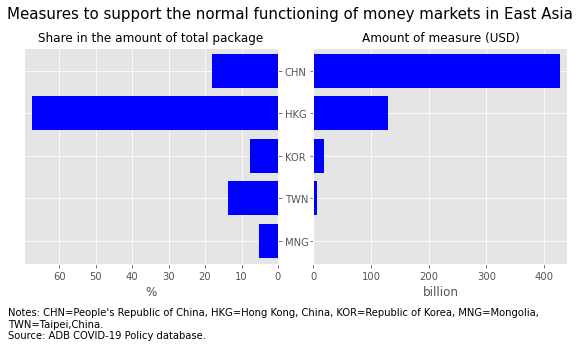

In [1071]:
y0 = df3.loc['East Asia'].sort_values(by='m1').loc[:, 'm1_pkg']
y1 = df3.loc['East Asia'].sort_values(by='m1').loc[:, 'm1']

fig, axs = plt.subplots(ncols=2, figsize=(8, 4), sharey=True)

axs[0].barh(y0.index, y0, align='center', color='blue')
axs[0].invert_yaxis()
axs[0].set_title('Share in the amount of total package', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.index, y1, align='center', color='blue')
axs[1].invert_yaxis()
axs[1].set_title('Amount of measure (USD)', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y0.index, yticklabels=['CHN', 'HKG', 'KOR', 'TWN', 'MNG'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('Measures to support the normal functioning of money markets in East Asia',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.14)
plt.annotate('Notes: CHN=People\'s Republic of China, HKG=Hong Kong, China, KOR=Republic of Korea, \
MNG=Mongolia, \nTWN=Taipei,China. \nSource: ADB COVID-19 Policy database.', xy=(-1.2, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [1072]:
y0

country
Mongolia                       5.248411
Taipei,China                  13.698630
Republic of Korea              7.538523
Hong Kong, China              67.648054
People's Republic of China    18.125338
Name: m1_pkg, dtype: float64

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:29: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


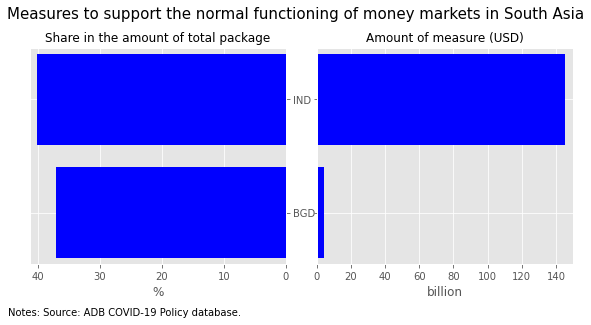

In [1111]:
y0 = df3.loc['South Asia'].sort_values(by='m1').loc[:, 'm1_pkg']
y1 = df3.loc['South Asia'].sort_values(by='m1').loc[:, 'm1']

fig, axs = plt.subplots(ncols=2, figsize=(8, 4), sharey=True)

axs[0].barh(y0.loc['Bangladesh':, ].index, y0.loc['Bangladesh':, ], align='center', color='blue')
axs[0].invert_yaxis()
axs[0].set_title('Share in the amount of total package', fontsize=12)
axs[0].set_xlabel('%')

axs[1].barh(y1.loc['Bangladesh':, ].index, y1.loc['Bangladesh':, ], align='center', color='blue')
axs[1].invert_yaxis()
axs[1].set_title('Amount of measure (USD)', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y0.loc['Bangladesh':, ].index, yticklabels=['IND', 'BGD'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('Measures to support the normal functioning of money markets in South Asia',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.12)
plt.annotate('Notes: Source: ADB COVID-19 Policy database.', xy=(-1.2, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [1114]:
y0

country
Bhutan         0.000000
Maldives       0.000000
Nepal          0.000000
Sri Lanka      0.000000
Bangladesh    37.034691
India         40.141303
Name: m1_pkg, dtype: float64

In [1122]:
df3.loc['South Asia', ['m1_pkg', 'm2_pkg', 'm3_pkg', 'm4_pkg', 'm5_pkg']]

m1_pkg      m2_pkg    m3_pkg  m4_pkg      m5_pkg
country                                                        
Bangladesh  37.034691   24.364928  4.872986     0.0   33.727395
Bhutan       0.000000    0.000000  0.000000     0.0  100.000000
India       40.141303   15.785870  0.000000     0.0   43.921180
Maldives     0.000000    0.000000  0.000000     0.0  100.000000
Nepal        0.000000  100.000000  0.000000     0.0    0.000000
Sri Lanka    0.000000   78.339648  0.000000     0.0   21.660352

In [1123]:
df3.loc['East Asia', ['m1_pkg', 'm2_pkg', 'm3_pkg', 'm4_pkg', 'm5_pkg']]

m1_pkg     m2_pkg     m3_pkg    m4_pkg  \
country                                                                 
Hong Kong, China            67.648054   3.383070   0.000000  1.308926   
Mongolia                     5.248411   5.629151  10.739803  0.000000   
People's Republic of China  18.125338  18.841290   2.114622  1.208355   
Republic of Korea            7.538523   0.104460  45.022176  3.725737   
Taipei,China                13.698630   0.000000   0.000000  0.000000   

                               m5_pkg  
country                                
Hong Kong, China            20.007769  
Mongolia                    78.382635  
People's Republic of China  59.624319  
Republic of Korea           26.149797  
Taipei,China                14.383562

In [1125]:
df3.loc['Central and West Asia', ['m1_pkg', 'm2_pkg', 'm3_pkg', 'm4_pkg', 'm5_pkg']]

m1_pkg     m2_pkg     m3_pkg  m4_pkg      m5_pkg
country                                                             
Afghanistan       0.000000   0.000000   0.000000     0.0  100.000000
Armenia           0.000000   8.333333   0.000000     0.0   10.000000
Azerbaijan        0.000000  18.413832   0.000000     0.0   44.445467
Georgia          13.944765  15.796185   0.000000     0.0   61.766478
Kazakhstan       17.838940   0.000000   3.669725     0.0   78.491335
Kyrgyz Republic  87.984496   0.000000   0.000000     0.0   12.015504
Pakistan          0.000000  11.993550  35.580597     0.0   52.425853
Tajikistan        0.000000   0.000000   0.000000     0.0  100.000000
Turkmenistan           NaN        NaN        NaN     NaN         NaN
Uzbekistan        0.000000   0.000000   0.000000     0.0  100.000000

In [1126]:
df3.loc['Pacific', ['m1_pkg', 'm2_pkg', 'm3_pkg', 'm4_pkg', 'm5_pkg']]

m1_pkg    m2_pkg     m3_pkg  m4_pkg  \
country                                                               
Cook Islands                       0.0  0.000000   0.000000     0.0   
Federated States of Micronesia     0.0  0.000000   0.000000     0.0   
Fiji                               0.0  4.545455   7.575758     0.0   
Kiribati                           NaN       NaN        NaN     NaN   
Marshall Islands                   0.0  0.000000   0.000000     0.0   
Nauru                              0.0  0.000000   0.000000     0.0   
Niue                               NaN       NaN        NaN     NaN   
Palau                              0.0  0.000000   0.000000     0.0   
Papua New Guinea                   0.0  0.000000  10.714286     0.0   
Samoa                              0.0  0.000000   0.000000     0.0   
Solomon Islands                    0.0  0.000000   0.000000     0.0   
Tonga                              0.0  0.000000   0.000000     0.0   
Tuvalu                             0.0  0.000000   0.000000     0.0   
Vanuatu                            0.0  0.000000  25.423729     0.0   

                                    m5_pkg  
country                                     
Cook Islands                    100.000000  
Federated States of Micronesia  100.000000  
Fiji                             87.878788  
Kiribati                               NaN  
Marshall Islands                100.000000  
Nauru                           100.000000  
Niue                                   NaN  
Palau                           100.000000  
Papua New Guinea                  9.107143  
Samoa                           100.000000  
Solomon Islands                 100.000000  
Tonga                           100.000000  
Tuvalu                          100.000000  
Vanuatu                          74.576271

In [1349]:
df3.reset_index(level=0).loc['Papua New Guinea']

region              Pacific
amount_lcy          5.6e+09
amount_usd      1.64358e+09
gdp_lcy          8.0173e+10
gdp_usd          2.3587e+10
popn            8.60632e+06
pkg_gdp             6.96815
pkg_pc_usd          190.974
m1                        0
m2                        0
m3              1.76098e+08
m4                        0
m5              1.49683e+08
m9                        0
m10              1.3178e+09
m1_pkg                    0
m2_pkg                    0
m3_pkg              10.7143
m4_pkg                    0
m5_pkg              9.10714
m9_pkg                    0
m10_pkg             80.1786
m1_gdp                    0
m2_gdp                    0
m3_gdp             0.746588
m4_gdp                    0
m5_gdp               0.6346
m9_gdp                    0
m10_gdp             5.58697
m_others_gdp        5.58697
m_others_pkg        80.1786
Name: Papua New Guinea, dtype: object

In [1142]:
south_donut = df3.loc['South Asia', 'm2_pkg']

In [1143]:
south_donut = pd.DataFrame(south_donut.loc[['Nepal', 'Sri Lanka', 'Bangladesh', 'India']])

In [1144]:
south_donut = south_donut.assign(other_measures = lambda x: 100 - x.m2_pkg)

In [1145]:
south_donut

m2_pkg  other_measures
country                               
Nepal       100.000000        0.000000
Sri Lanka    78.339648       21.660352
Bangladesh   24.364928       75.635072
India        15.785870       84.214130

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:43: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


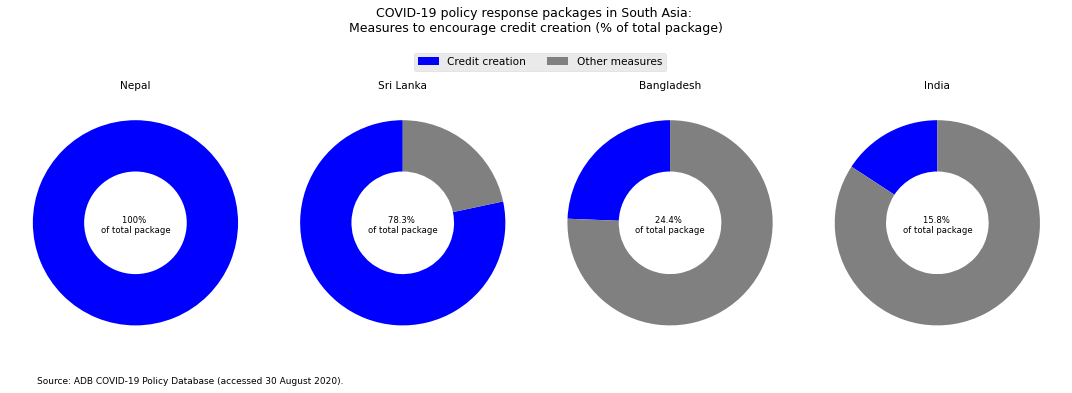

In [1370]:
fig, axs = plt.subplots(figsize=(15, 6), nrows=1, ncols=4)

wedges, texts = axs[0].pie(south_donut.loc['Nepal', ['m2_pkg', 'other_measures']], 
                                         wedgeprops=dict(width=0.5), startangle=90,
                                         colors=['blue', 'gray'])
axs[0].text(0, -0.1, '100% \nof total package',
               ha='center', fontsize=8.5)
axs[0].set_title('Nepal', fontsize=10.5)

wedges, texts = axs[1].pie(south_donut.loc['Sri Lanka', ['m2_pkg', 'other_measures']], 
                                         wedgeprops=dict(width=0.5), startangle=90,
                                         colors=['blue', 'gray'])
axs[1].text(0, -0.1, '78.3% \nof total package',
               ha='center', fontsize=8.5)
axs[1].set_title('Sri Lanka', fontsize=10.5)

wedges, texts = axs[2].pie(south_donut.loc['Bangladesh', ['m2_pkg', 'other_measures']], 
                                         wedgeprops=dict(width=0.5), startangle=90,
                                         colors=['blue', 'gray'])
axs[2].text(0, -0.1, '24.4% \nof total package',
               ha='center', fontsize=8.5)
axs[2].set_title('Bangladesh', fontsize=10.5)

wedges, texts = axs[3].pie(south_donut.loc['India', ['m2_pkg', 'other_measures']], 
                                         wedgeprops=dict(width=0.5), startangle=90,
                                         colors=['blue', 'gray'])
axs[3].text(0, -0.1, '15.8% \nof total package', 
               ha='center', fontsize=8.5)
axs[3].set_title('India', fontsize=10.5)


fig.suptitle('COVID-19 policy response packages in South Asia: \
\nMeasures to encourage credit creation (% of total package)',
             y=1, fontsize=12.5)

fig.legend(['Credit creation', 'Other measures'], 
           loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.8), 
           frameon=True, fontsize=10.5)
fig.tight_layout()
# fig.subplots_adjust(wspace=0, hspace=0)
plt.annotate('Source: ADB COVID-19 Policy Database (accessed 30 August 2020).', 
            xy=(-3, -0.1), xycoords='axes fraction', textcoords='offset points', 
            va='top', fontsize=9)
plt.show()
fig.savefig('south-donut-m2.png', bbox_inches='tight', dpi=fig.dpi)

In [1357]:
east_donut = pd.DataFrame(df3.loc['East Asia', 'm1_pkg'])
east_donut = east_donut.assign(other_measures = lambda x: 100 - x.m1_pkg)

In [1358]:
east_donut

m1_pkg  other_measures
country                                              
Hong Kong, China            67.648054       32.351946
Mongolia                     5.248411       94.751589
People's Republic of China  18.125338       81.874662
Republic of Korea            7.538523       92.461477
Taipei,China                13.698630       86.301370

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:50: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


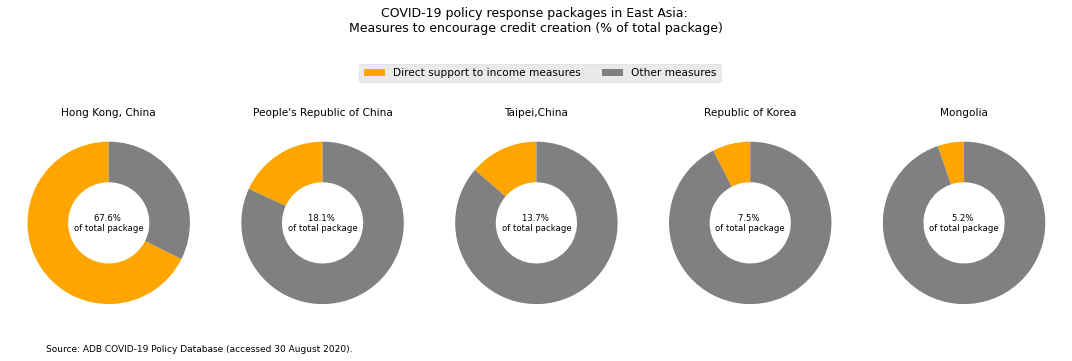

In [1393]:
fig, axs = plt.subplots(figsize=(15, 6), nrows=1, ncols=5)

wedges, texts = axs[0].pie(east_donut.loc['Hong Kong, China', ['m1_pkg', 'other_measures']], 
                                         wedgeprops=dict(width=0.5), startangle=90,
                                         colors=['orange', 'gray'])
axs[0].text(0, -0.1, '67.6% \nof total package',
               ha='center', fontsize=8.5)
axs[0].set_title('Hong Kong, China', fontsize=10.5)

wedges, texts = axs[1].pie(east_donut.loc['People\'s Republic of China', ['m1_pkg', 'other_measures']], 
                                         wedgeprops=dict(width=0.5), startangle=90,
                                         colors=['orange', 'gray'])
axs[1].text(0, -0.1, '18.1% \nof total package',
               ha='center', fontsize=8.5)
axs[1].set_title('People\'s Republic of China', fontsize=10.5)

wedges, texts = axs[2].pie(east_donut.loc['Taipei,China', ['m1_pkg', 'other_measures']], 
                                         wedgeprops=dict(width=0.5), startangle=90,
                                         colors=['orange', 'gray'])
axs[2].text(0, -0.1, '13.7% \nof total package',
               ha='center', fontsize=8.5)
axs[2].set_title('Taipei,China', fontsize=10.5)

wedges, texts = axs[3].pie(east_donut.loc['Republic of Korea', ['m1_pkg', 'other_measures']], 
                                         wedgeprops=dict(width=0.5), startangle=90,
                                         colors=['orange', 'gray'])
axs[3].text(0, -0.1, '7.5% \nof total package', 
               ha='center', fontsize=8.5)
axs[3].set_title('Republic of Korea', fontsize=10.5)

wedges, texts = axs[4].pie(east_donut.loc['Mongolia', ['m1_pkg', 'other_measures']], 
                                         wedgeprops=dict(width=0.5), startangle=90,
                                         colors=['orange', 'gray'])
axs[4].text(0, -0.1, '5.2% \nof total package', 
               ha='center', fontsize=8.5)
axs[4].set_title('Mongolia', fontsize=10.5)


fig.suptitle('COVID-19 policy response packages in East Asia: \
\nMeasures to encourage credit creation (% of total package)',
             y=1, fontsize=12.5)

fig.legend(['Direct support to income measures', 'Other measures'], 
           loc='upper center', ncol=2, bbox_to_anchor=(0.5, 0.7), 
           frameon=True, fontsize=10.5)
fig.tight_layout()
# fig.subplots_adjust(wspace=0, hspace=0)
plt.annotate('Source: ADB COVID-19 Policy Database (accessed 30 August 2020).', 
            xy=(-4, -0.1), xycoords='axes fraction', textcoords='offset points', 
            va='top', fontsize=9)
plt.show()
fig.savefig('east-donut-m1.png', bbox_inches='tight', dpi=fig.dpi)

In [1074]:
df3.assign(m5_pct = lambda x: x.m5 / x.popn).loc['Southeast Asia'].sort_values(by='m5').loc[:, 'm5_pct']

country
Brunei Darussalam       0.000000
Lao PDR                 1.114369
Myanmar                 0.508638
Timor-Leste           118.299142
Cambodia               12.923238
Philippines            96.343563
Viet Nam              135.052280
Malaysia              700.963915
Indonesia             145.445924
Thailand              628.029325
Singapore            9149.156315
Name: m5_pct, dtype: float64

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:37: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


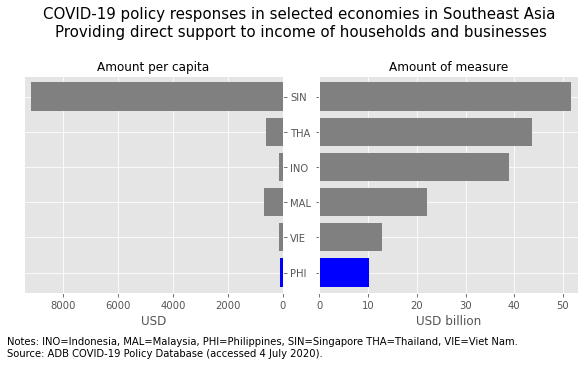

In [1075]:
y0 = df3.assign(m5_pct = lambda x: x.m5 / x.popn).loc['Southeast Asia'].sort_values(by='m5').loc[:, 'm5_pct']
y1 = df3.assign(m5_pct = lambda x: x.m5 / x.popn).loc['Southeast Asia'].sort_values(by='m5').loc[:, 'm5']

fig, axs = plt.subplots(ncols=2, figsize=(8, 4), sharey=True)

axs[0].barh(y0.loc['Philippines':].index, y0.loc['Philippines':], align='center', 
            color=['blue', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[0].invert_yaxis()
axs[0].set_title('Amount per capita', fontsize=12)
axs[0].set_xlabel('USD')

# for i, v in enumerate(y0.loc['Philippines':]):
#     axs[0].text(v + 20, i + .01, str(round(v)), color='black')

axs[1].barh(y1.loc['Philippines':].index, y1.loc['Philippines':], align='center', 
            color=['blue', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[1].invert_yaxis()
axs[1].set_title('Amount of measure', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('USD billion')

axs[0].invert_xaxis()
axs[0].set(yticks=y0.loc['Philippines':].index, yticklabels=['SIN', 'THA', 'INO', 
                                                             'MAL', 'VIE', 'PHI'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy responses in selected economies in Southeast Asia \
\nProviding direct support to income of households and businesses',
             y=1.15, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.14)
plt.annotate('Notes: INO=Indonesia, MAL=Malaysia, PHI=Philippines, SIN=Singapore \
THA=Thailand, VIE=Viet Nam. \nSource: ADB COVID-19 Policy Database (accessed 4 July 2020).', xy=(-1.2, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [1394]:
seast_donut = pd.DataFrame(df3.loc['Southeast Asia', 'm3_pkg'])
seast_donut = seast_donut.assign(other_measures = lambda x: 100 - x.m3_pkg)

In [1395]:
seast_donut.sort_values('m3_pkg', ascending=False, inplace=True)

In [1396]:
seast_donut.drop(index=['Cambodia', 'Lao PDR', 'Timor-Leste', 'Philippines'], inplace=True)

In [1397]:
seast_donut

m3_pkg  other_measures
country                                      
Brunei Darussalam  100.000000        0.000000
Myanmar             72.306580       27.693420
Viet Nam            51.315362       48.684638
Indonesia           39.518955       60.481045
Malaysia            32.121662       67.878338
Singapore           22.760278       77.239722
Thailand            16.666667       83.333333

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  if __name__ == '__main__':


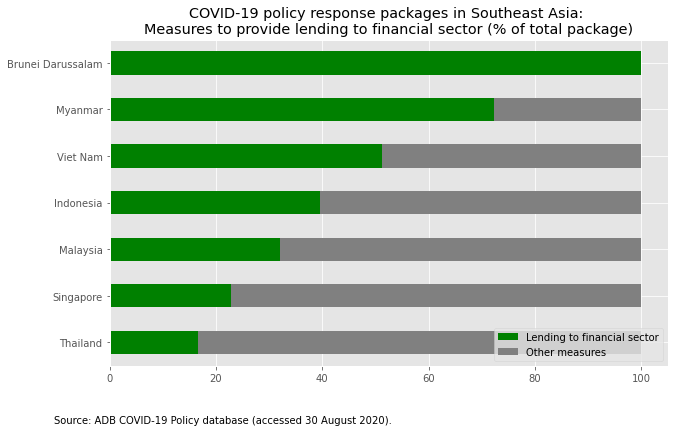

In [1411]:
fig, ax = plt.subplots()
seast_donut.plot(kind='barh',stacked='True', figsize=(10, 6), ax=ax, color=['green', 'gray'])
ax.invert_yaxis()
ax.set_ylabel('')
ax.legend(['Lending to financial sector', 'Other measures'], loc='lower right', frameon=True)
ax.set_title('COVID-19 policy response packages in Southeast Asia: \
\nMeasures to provide lending to financial sector (% of total package)')
ax.annotate('Source: ADB COVID-19 Policy database (accessed 30 August 2020).', 
            xy=(-0.1, -0.15), xycoords='axes fraction', textcoords='offset points', va='top')
fig.savefig('southeast-m3', bbox_inches='tight', dpi=fig.dpi)

In [1076]:
y1

country
Brunei Darussalam    0.000000e+00
Lao PDR              7.869126e+06
Myanmar              2.731812e+07
Timor-Leste          1.500000e+08
Cambodia             2.100000e+08
Philippines          1.027523e+10
Viet Nam             1.290295e+10
Malaysia             2.210040e+10
Indonesia            3.893056e+10
Thailand             4.360315e+10
Singapore            5.158913e+10
Name: m5, dtype: float64

In [1077]:
data = df3.reset_index(level=0).assign(m5_pct = lambda x: x.m5 / x.popn).sort_values(by='m5').loc[:, ['region', 'm5', 'm5_pct', 'm5_gdp']]

In [1078]:
data = data[data['m5'] > 0]

In [1079]:
data.dropna(inplace=False)

region            m5        m5_pct  \
country                                                                         
Tuvalu                                    Pacific  3.863318e+06    335.707160   
Tajikistan                  Central and West Asia  4.124302e+06      0.453178   
Nauru                                     Pacific  6.072931e+06    478.032982   
Lao PDR                            Southeast Asia  7.869126e+06      1.114369   
Palau                                     Pacific  2.091681e+07   1168.079969   
...                                           ...           ...           ...   
United Kingdom                  Other ADB Members  2.419060e+11   3638.286525   
Germany                         Other ADB Members  8.729220e+11  10526.273648   
People's Republic of China              East Asia  1.406180e+12   1009.657292   
United States                   Other ADB Members  1.696040e+12   5184.012294   
Japan                           Other ADB Members  2.268560e+12  17929.156218   

                               m5_gdp  
country                                
Tuvalu                       9.198376  
Tajikistan                   0.050593  
Nauru                        5.623084  
Lao PDR                      0.041141  
Palau                        7.187907  
...                               ...  
United Kingdom               8.817134  
Germany                     22.595008  
People's Republic of China   9.944555  
United States                7.910819  
Japan                       44.011423  

[72 rows x 4 columns]

In [1080]:
data.index

Index(['Tuvalu', 'Tajikistan', 'Nauru', 'Lao PDR', 'Palau', 'Tonga', 'Myanmar',
       'Kyrgyz Republic', 'Uzbekistan', 'Federated States of Micronesia',
       'Cook Islands', 'Vanuatu', 'Solomon Islands', 'Marshall Islands',
       'Samoa', 'Armenia', 'Afghanistan', 'Papua New Guinea', 'Timor-Leste',
       'Maldives', 'Cambodia', 'Sri Lanka', 'Bhutan', 'Fiji', 'Azerbaijan',
       'Georgia', 'Nigeria', 'Mongolia', 'Argentina', 'Bangladesh',
       'Arab Republic of Egypt', 'Taipei,China', 'Pakistan', 'Portugal',
       'Mexico', 'Luxembourg', 'Philippines', 'Belgium', 'South Africa',
       'Turkey', 'Viet Nam', 'Norway', 'Saudi Arabia', 'New Zealand',
       'Ireland', 'Kazakhstan', 'Malaysia', 'Finland', 'Canada',
       'Hong Kong, China', 'Indonesia', 'Denmark', 'Thailand', 'Sweden',
       'Singapore', 'Islamic Republic of Iran', 'Brazil', 'Switzerland',
       'Netherlands', 'Austria', 'Republic of Korea', 'Russian Federation',
       'Spain', 'Italy', 'France', 'India', 'Aust

In [1081]:
data = data[~data.region.isin(['Other ADB Members', 'Other Economies', 'Others'])]

In [1082]:
data = data[['m5', 'm5_pct', 'm5_gdp']]

In [1083]:
data

m5       m5_pct     m5_gdp
country                                                             
Tuvalu                          3.863318e+06   335.707160   9.198376
Tajikistan                      4.124302e+06     0.453178   0.050593
Nauru                           6.072931e+06   478.032982   5.623084
Lao PDR                         7.869126e+06     1.114369   0.041141
Palau                           2.091681e+07  1168.079969   7.187907
Tonga                           2.611964e+07   253.104606   5.352384
Myanmar                         2.731812e+07     0.508638   0.041395
Kyrgyz Republic                 3.100000e+07     4.908325   0.375257
Uzbekistan                      3.213240e+07     0.975027   0.053120
Federated States of Micronesia  3.500000e+07   310.724432   9.186352
Cook Islands                    3.690260e+07  1911.952800  10.225808
Vanuatu                         3.739271e+07   127.759697   3.931936
Solomon Islands                 3.766847e+07    57.697798   2.615866
Marshall Islands                4.200000e+07   719.018027  19.090909
Samoa                           5.542740e+07   282.605415   6.124575
Armenia                         6.134861e+07    20.783627   0.456327
Afghanistan                     1.016625e+08     2.734893   0.542663
Papua New Guinea                1.496830e+08    17.392230   0.634600
Timor-Leste                     1.500000e+08   118.299142   5.105514
Maldives                        1.626655e+08   315.428993   2.811363
Cambodia                        2.100000e+08    12.923238   0.785634
Sri Lanka                       2.241147e+08    10.342165   0.258895
Bhutan                          4.305926e+08   570.779398  15.151040
Fiji                            5.264113e+08   595.836396   9.222343
Azerbaijan                      7.099118e+08    71.402929   1.504975
Georgia                         1.195929e+09   320.538471   7.509758
Mongolia                        1.755400e+09   553.717611  12.872333
Bangladesh                      4.073749e+09    25.246959   1.283212
Taipei,China                    6.969682e+09   295.463219   1.189154
Pakistan                        7.231848e+09    34.077924   2.544508
Philippines                     1.027523e+10    96.343563   2.879715
Viet Nam                        1.290295e+10   135.052280   4.931622
Kazakhstan                      1.867799e+10  1021.967427  10.966022
Malaysia                        2.210040e+10   700.963915   6.049882
Hong Kong, China                3.838585e+10  5151.772199  10.291417
Indonesia                       3.893056e+10   145.445924   3.501862
Thailand                        4.360315e+10   628.029325   8.239804
Singapore                       5.158913e+10  9149.156315  14.219010
Republic of Korea               6.155302e+10  1192.073488   3.777348
India                           1.592950e+11   117.767972   5.426374
People's Republic of China      1.406180e+12  1009.657292   9.944555

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:32: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


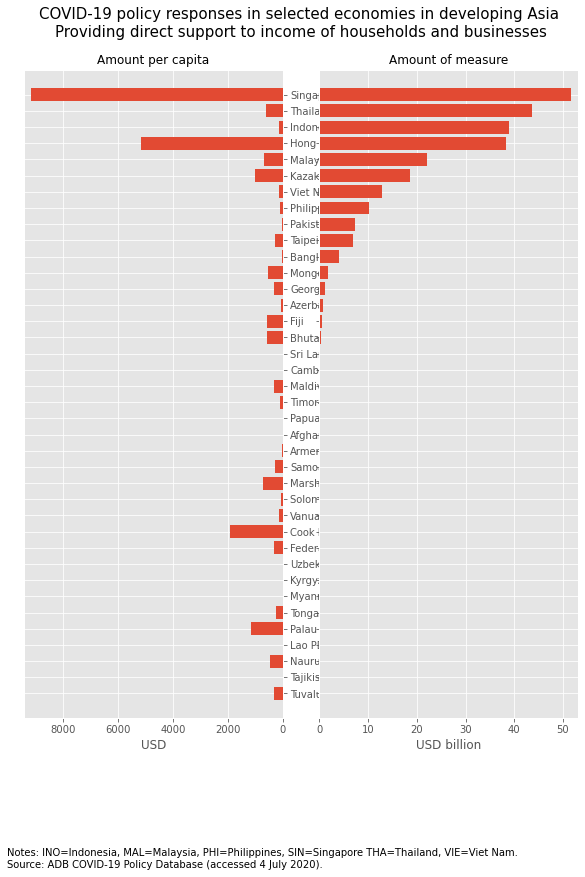

In [1084]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 10), sharey=True)

axs[0].barh(data.loc[:'Singapore', 'm5_pct'].index, data.loc[:'Singapore', 'm5_pct'], align='center')
axs[0].invert_yaxis()
axs[0].set_title('Amount per capita', fontsize=12)
axs[0].set_xlabel('USD')

# for i, v in enumerate(y0.loc['Philippines':]):
#     axs[0].text(v + 20, i + .01, str(round(v)), color='black')

axs[1].barh(data.loc[:'Singapore', 'm5'].index, data.loc[:'Singapore', 'm5'], align='center')
axs[1].invert_yaxis()
axs[1].set_title('Amount of measure', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('USD billion')

axs[0].invert_xaxis()
axs[0].set(yticks=data.loc[:'Singapore', 'm5_pct'].index, 
           yticklabels=data.loc[:'Singapore', 'm5_pct'].index)
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('COVID-19 policy responses in selected economies in developing Asia \
\nProviding direct support to income of households and businesses',
             y=1.05, fontsize=15)
fig.tight_layout()
fig.subplots_adjust(wspace=0.14)
plt.annotate('Notes: INO=Indonesia, MAL=Malaysia, PHI=Philippines, SIN=Singapore \
THA=Thailand, VIE=Viet Nam. \nSource: ADB COVID-19 Policy Database (accessed 4 July 2020).', xy=(-1.2, -0.20), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:42: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


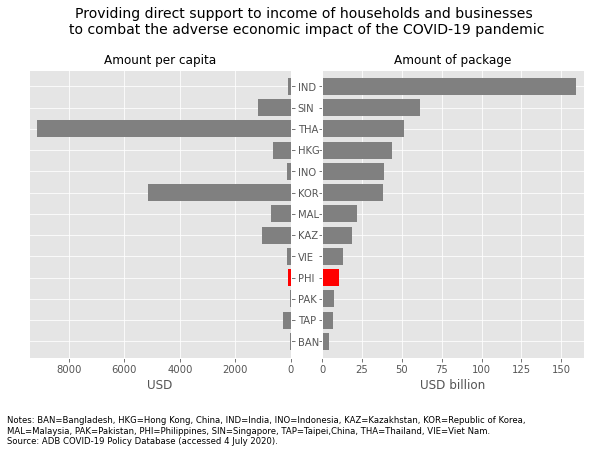

In [1085]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 5), sharey=True)

axs[0].barh(data.loc['Bangladesh':'India', 'm5_pct'].index, data.loc['Bangladesh':'India', 'm5_pct'], 
            align='center',
            color=['gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray',
                   'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[0].invert_yaxis()
axs[0].set_title('Amount per capita', fontsize=12)
axs[0].set_xlabel('USD')

# for i, v in enumerate(y0.loc['Philippines':]):
#     axs[0].text(v + 20, i + .01, str(round(v)), color='black')

axs[1].barh(data.loc['Bangladesh':'India', 'm5'].index, data.loc['Bangladesh':'India', 'm5'], 
            align='center',
            color=['gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray',
                   'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[1].invert_yaxis()
axs[1].set_title('Amount of package', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('USD billion')

axs[0].invert_xaxis()
axs[0].set(yticks=data.loc['Bangladesh':'India', 'm5_pct'].index, 
           yticklabels=['IND', 'SIN', 'THA', 'HKG', 'INO', 'KOR', 'MAL', 'KAZ', 'VIE', 'PHI',
                        'PAK', 'TAP', 'BAN'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('Providing direct support to income of households and businesses \
\nto combat the adverse economic impact of the COVID-19 pandemic',
             y=1.1, fontsize=14)
fig.tight_layout()
fig.subplots_adjust(wspace=0.12)
plt.annotate('Notes: BAN=Bangladesh, HKG=Hong Kong, China, IND=India, INO=Indonesia, KAZ=Kazakhstan, \
KOR=Republic of Korea, \nMAL=Malaysia, PAK=Pakistan, PHI=Philippines, SIN=Singapore, TAP=Taipei,China, \
THA=Thailand, VIE=Viet Nam. \nSource: ADB COVID-19 Policy Database (accessed 4 July 2020).',
             xy=(-1.2, -0.20), xycoords='axes fraction', textcoords='offset points', va='top',
             fontsize=8.5)
plt.show()

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:42: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


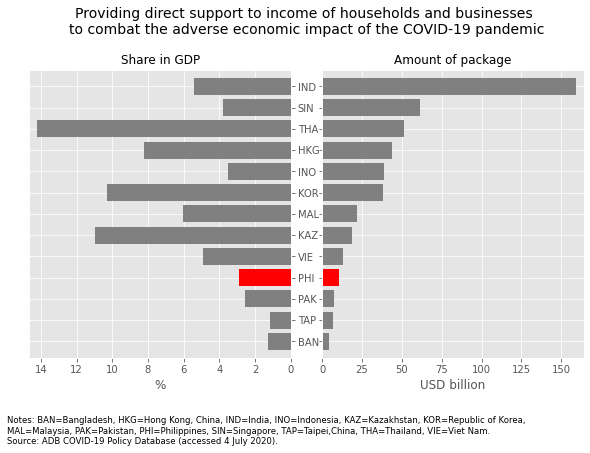

In [1086]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 5), sharey=True)

axs[0].barh(data.loc['Bangladesh':'India', 'm5_gdp'].index, data.loc['Bangladesh':'India', 'm5_gdp'], 
            align='center',
            color=['gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray',
                   'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[0].invert_yaxis()
axs[0].set_title('Share in GDP', fontsize=12)
axs[0].set_xlabel('%')

# for i, v in enumerate(y0.loc['Philippines':]):
#     axs[0].text(v + 20, i + .01, str(round(v)), color='black')

axs[1].barh(data.loc['Bangladesh':'India', 'm5'].index, data.loc['Bangladesh':'India', 'm5'], 
            align='center',
            color=['gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray',
                   'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[1].invert_yaxis()
axs[1].set_title('Amount of package', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('USD billion')

axs[0].invert_xaxis()
axs[0].set(yticks=data.loc['Bangladesh':'India', 'm5_gdp'].index, 
           yticklabels=['IND', 'SIN', 'THA', 'HKG', 'INO', 'KOR', 'MAL', 'KAZ', 'VIE', 'PHI',
                        'PAK', 'TAP', 'BAN'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('Providing direct support to income of households and businesses \
\nto combat the adverse economic impact of the COVID-19 pandemic',
             y=1.1, fontsize=14)
fig.tight_layout()
fig.subplots_adjust(wspace=0.12)
plt.annotate('Notes: BAN=Bangladesh, HKG=Hong Kong, China, IND=India, INO=Indonesia, KAZ=Kazakhstan, \
KOR=Republic of Korea, \nMAL=Malaysia, PAK=Pakistan, PHI=Philippines, SIN=Singapore, TAP=Taipei,China, \
THA=Thailand, VIE=Viet Nam. \nSource: ADB COVID-19 Policy Database (accessed 4 July 2020).',
             xy=(-1.2, -0.20), xycoords='axes fraction', textcoords='offset points', va='top',
             fontsize=8.5)
plt.show()

In [1087]:
data = df3.reset_index(level=0).assign(m5_pct = lambda x: x.m5 / x.popn).sort_values(by='m5_pct').loc[:, ['region', 'm5', 'm5_pct', 'm5_gdp']]
data = data[data['m5'] > 0]
data.dropna(inplace=False)
data = data[~data.region.isin(['Other ADB Members', 'Other Economies', 'Others'])]
data = data[['m5', 'm5_pct', 'm5_gdp']]

In [1088]:
data

m5       m5_pct     m5_gdp
country                                                             
Tajikistan                      4.124302e+06     0.453178   0.050593
Myanmar                         2.731812e+07     0.508638   0.041395
Uzbekistan                      3.213240e+07     0.975027   0.053120
Lao PDR                         7.869126e+06     1.114369   0.041141
Afghanistan                     1.016625e+08     2.734893   0.542663
Kyrgyz Republic                 3.100000e+07     4.908325   0.375257
Sri Lanka                       2.241147e+08    10.342165   0.258895
Cambodia                        2.100000e+08    12.923238   0.785634
Papua New Guinea                1.496830e+08    17.392230   0.634600
Armenia                         6.134861e+07    20.783627   0.456327
Bangladesh                      4.073749e+09    25.246959   1.283212
Pakistan                        7.231848e+09    34.077924   2.544508
Solomon Islands                 3.766847e+07    57.697798   2.615866
Azerbaijan                      7.099118e+08    71.402929   1.504975
Philippines                     1.027523e+10    96.343563   2.879715
India                           1.592950e+11   117.767972   5.426374
Timor-Leste                     1.500000e+08   118.299142   5.105514
Vanuatu                         3.739271e+07   127.759697   3.931936
Viet Nam                        1.290295e+10   135.052280   4.931622
Indonesia                       3.893056e+10   145.445924   3.501862
Tonga                           2.611964e+07   253.104606   5.352384
Samoa                           5.542740e+07   282.605415   6.124575
Taipei,China                    6.969682e+09   295.463219   1.189154
Federated States of Micronesia  3.500000e+07   310.724432   9.186352
Maldives                        1.626655e+08   315.428993   2.811363
Georgia                         1.195929e+09   320.538471   7.509758
Tuvalu                          3.863318e+06   335.707160   9.198376
Nauru                           6.072931e+06   478.032982   5.623084
Mongolia                        1.755400e+09   553.717611  12.872333
Bhutan                          4.305926e+08   570.779398  15.151040
Fiji                            5.264113e+08   595.836396   9.222343
Thailand                        4.360315e+10   628.029325   8.239804
Malaysia                        2.210040e+10   700.963915   6.049882
Marshall Islands                4.200000e+07   719.018027  19.090909
People's Republic of China      1.406180e+12  1009.657292   9.944555
Kazakhstan                      1.867799e+10  1021.967427  10.966022
Palau                           2.091681e+07  1168.079969   7.187907
Republic of Korea               6.155302e+10  1192.073488   3.777348
Cook Islands                    3.690260e+07  1911.952800  10.225808
Hong Kong, China                3.838585e+10  5151.772199  10.291417
Singapore                       5.158913e+10  9149.156315  14.219010

In [1089]:
data = df3.reset_index(level=0).assign(m5_pct = lambda x: x.m5 / x.popn).sort_values(by='m5_gdp').loc[:, ['region', 'm5', 'm5_pct', 'm5_gdp']]
data = data[data['m5'] > 0]
data.dropna(inplace=False)
data = data[~data.region.isin(['Other ADB Members', 'Other Economies', 'Others'])]
data = data[['m5', 'm5_pct', 'm5_gdp']]

In [1090]:
data

m5       m5_pct     m5_gdp
country                                                             
Lao PDR                         7.869126e+06     1.114369   0.041141
Myanmar                         2.731812e+07     0.508638   0.041395
Tajikistan                      4.124302e+06     0.453178   0.050593
Uzbekistan                      3.213240e+07     0.975027   0.053120
Sri Lanka                       2.241147e+08    10.342165   0.258895
Kyrgyz Republic                 3.100000e+07     4.908325   0.375257
Armenia                         6.134861e+07    20.783627   0.456327
Afghanistan                     1.016625e+08     2.734893   0.542663
Papua New Guinea                1.496830e+08    17.392230   0.634600
Cambodia                        2.100000e+08    12.923238   0.785634
Taipei,China                    6.969682e+09   295.463219   1.189154
Bangladesh                      4.073749e+09    25.246959   1.283212
Azerbaijan                      7.099118e+08    71.402929   1.504975
Pakistan                        7.231848e+09    34.077924   2.544508
Solomon Islands                 3.766847e+07    57.697798   2.615866
Maldives                        1.626655e+08   315.428993   2.811363
Philippines                     1.027523e+10    96.343563   2.879715
Indonesia                       3.893056e+10   145.445924   3.501862
Republic of Korea               6.155302e+10  1192.073488   3.777348
Vanuatu                         3.739271e+07   127.759697   3.931936
Viet Nam                        1.290295e+10   135.052280   4.931622
Timor-Leste                     1.500000e+08   118.299142   5.105514
Tonga                           2.611964e+07   253.104606   5.352384
India                           1.592950e+11   117.767972   5.426374
Nauru                           6.072931e+06   478.032982   5.623084
Malaysia                        2.210040e+10   700.963915   6.049882
Samoa                           5.542740e+07   282.605415   6.124575
Palau                           2.091681e+07  1168.079969   7.187907
Georgia                         1.195929e+09   320.538471   7.509758
Thailand                        4.360315e+10   628.029325   8.239804
Federated States of Micronesia  3.500000e+07   310.724432   9.186352
Tuvalu                          3.863318e+06   335.707160   9.198376
Fiji                            5.264113e+08   595.836396   9.222343
People's Republic of China      1.406180e+12  1009.657292   9.944555
Cook Islands                    3.690260e+07  1911.952800  10.225808
Hong Kong, China                3.838585e+10  5151.772199  10.291417
Kazakhstan                      1.867799e+10  1021.967427  10.966022
Mongolia                        1.755400e+09   553.717611  12.872333
Singapore                       5.158913e+10  9149.156315  14.219010
Bhutan                          4.305926e+08   570.779398  15.151040
Marshall Islands                4.200000e+07   719.018027  19.090909

In [1091]:
data = df3.reset_index(level=0).assign(m5_pct = lambda x: x.m5 / x.popn).sort_values(by='m5').loc[:, ['region', 'm5', 'm5_pct', 'm5_gdp']]
data = data[data['m5'] > 0]
data.dropna(inplace=False)
data = data[~data.region.isin(['Other ADB Members', 'Other Economies', 'Others'])]
data = data[['m5', 'm5_pct', 'm5_gdp']]

In [1092]:
data.loc['Bangladesh':'India'].sort_values(by='m5_pct')

m5       m5_pct     m5_gdp
country                                                
Bangladesh         4.073749e+09    25.246959   1.283212
Pakistan           7.231848e+09    34.077924   2.544508
Philippines        1.027523e+10    96.343563   2.879715
India              1.592950e+11   117.767972   5.426374
Viet Nam           1.290295e+10   135.052280   4.931622
Indonesia          3.893056e+10   145.445924   3.501862
Taipei,China       6.969682e+09   295.463219   1.189154
Thailand           4.360315e+10   628.029325   8.239804
Malaysia           2.210040e+10   700.963915   6.049882
Kazakhstan         1.867799e+10  1021.967427  10.966022
Republic of Korea  6.155302e+10  1192.073488   3.777348
Hong Kong, China   3.838585e+10  5151.772199  10.291417
Singapore          5.158913e+10  9149.156315  14.219010

In [1093]:
dd = data.loc['Bangladesh':'India'].sort_values(by='m5_pct')

In [1094]:
dd

m5       m5_pct     m5_gdp
country                                                
Bangladesh         4.073749e+09    25.246959   1.283212
Pakistan           7.231848e+09    34.077924   2.544508
Philippines        1.027523e+10    96.343563   2.879715
India              1.592950e+11   117.767972   5.426374
Viet Nam           1.290295e+10   135.052280   4.931622
Indonesia          3.893056e+10   145.445924   3.501862
Taipei,China       6.969682e+09   295.463219   1.189154
Thailand           4.360315e+10   628.029325   8.239804
Malaysia           2.210040e+10   700.963915   6.049882
Kazakhstan         1.867799e+10  1021.967427  10.966022
Republic of Korea  6.155302e+10  1192.073488   3.777348
Hong Kong, China   3.838585e+10  5151.772199  10.291417
Singapore          5.158913e+10  9149.156315  14.219010

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:42: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


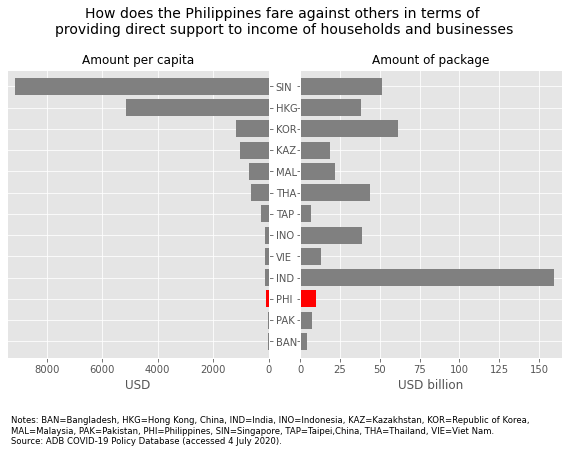

In [1095]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 5), sharey=True)

axs[0].barh(dd['m5_pct'].index, dd['m5_pct'], 
            align='center',
            color=['gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray', 'gray',
                   'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[0].invert_yaxis()
axs[0].set_title('Amount per capita', fontsize=12)
axs[0].set_xlabel('USD')

# for i, v in enumerate(y0.loc['Philippines':]):
#     axs[0].text(v + 20, i + .01, str(round(v)), color='black')

axs[1].barh(dd['m5'].index, dd['m5'], 
            align='center',
            color=['gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray', 'gray',
                   'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[1].invert_yaxis()
axs[1].set_title('Amount of package', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('USD billion')

axs[0].invert_xaxis()
axs[0].set(yticks=dd['m5_pct'].index, 
           yticklabels=['SIN', 'HKG', 'KOR', 'KAZ', 'MAL', 'THA', 'TAP', 
                        'INO', 'VIE', 'IND', 'PHI', 'PAK', 'BAN'][::-1])
axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('How does the Philippines fare against others in terms of \
\nproviding direct support to income of households and businesses',
             y=1.1, fontsize=14)
fig.tight_layout()
fig.subplots_adjust(wspace=0.12)
plt.annotate('Notes: BAN=Bangladesh, HKG=Hong Kong, China, IND=India, INO=Indonesia, KAZ=Kazakhstan, \
KOR=Republic of Korea, \nMAL=Malaysia, PAK=Pakistan, PHI=Philippines, SIN=Singapore, TAP=Taipei,China, \
THA=Thailand, VIE=Viet Nam. \nSource: ADB COVID-19 Policy Database (accessed 4 July 2020).',
             xy=(-1.1, -0.20), xycoords='axes fraction', textcoords='offset points', va='top',
             fontsize=8.5)
plt.show()
fig.savefig('ph-income-support.png', bbox_inches='tight', dpi=fig.dpi)

In [1096]:
dd2 = data.loc['Bangladesh':'India'].sort_values(by='m5_gdp')

In [1097]:
dd2

m5       m5_pct     m5_gdp
country                                                
Taipei,China       6.969682e+09   295.463219   1.189154
Bangladesh         4.073749e+09    25.246959   1.283212
Pakistan           7.231848e+09    34.077924   2.544508
Philippines        1.027523e+10    96.343563   2.879715
Indonesia          3.893056e+10   145.445924   3.501862
Republic of Korea  6.155302e+10  1192.073488   3.777348
Viet Nam           1.290295e+10   135.052280   4.931622
India              1.592950e+11   117.767972   5.426374
Malaysia           2.210040e+10   700.963915   6.049882
Thailand           4.360315e+10   628.029325   8.239804
Hong Kong, China   3.838585e+10  5151.772199  10.291417
Kazakhstan         1.867799e+10  1021.967427  10.966022
Singapore          5.158913e+10  9149.156315  14.219010

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:43: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.


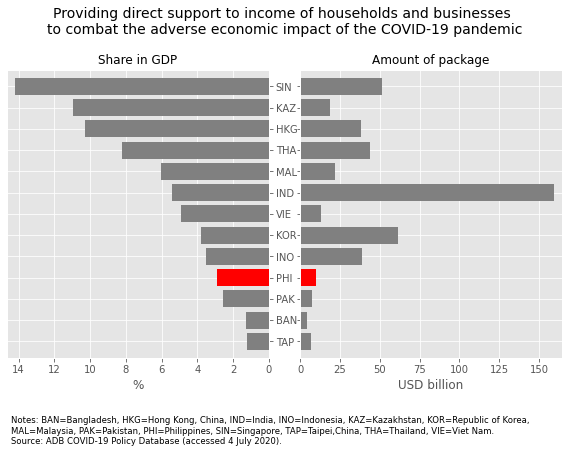

In [1108]:
fig, axs = plt.subplots(ncols=2, figsize=(8, 5), sharey=True)

axs[0].barh(dd2['m5_gdp'].index, dd2['m5_gdp'], 
            align='center',
            color=['gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray',
                   'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[0].invert_yaxis()
axs[0].set_title('Share in GDP', fontsize=12)
axs[0].set_xlabel('%')

# for i, v in enumerate(y0.loc['Philippines':]):
#     axs[0].text(v + 20, i + .01, str(round(v)), color='black')

axs[1].barh(dd2['m5'].index, dd2['m5'], 
            align='center',
            color=['gray', 'gray', 'gray', 'red', 'gray', 'gray', 'gray', 'gray',
                   'gray', 'gray', 'gray', 'gray', 'gray', 'gray'])
axs[1].invert_yaxis()
axs[1].set_title('Amount of package', fontsize=12)
axs[1].get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x/1e9))))
axs[1].set_xlabel('USD billion')

axs[0].invert_xaxis()
axs[0].set(yticks=dd2['m5_gdp'].index, 
           yticklabels=['SIN', 'KAZ', 'HKG', 'THA', 'MAL', 'IND', 'VIE', 'KOR', 'INO',
                        'PHI', 'PAK', 'BAN', 'TAP'][::-1])

axs[0].yaxis.tick_right()

for ax in axs.flat:
    ax.margins(0.03)
    ax.grid(True)

fig.suptitle('Providing direct support to income of households and businesses \
\nto combat the adverse economic impact of the COVID-19 pandemic',
             y=1.1, fontsize=14)
fig.tight_layout()
fig.subplots_adjust(wspace=0.12)
plt.annotate('Notes: BAN=Bangladesh, HKG=Hong Kong, China, IND=India, INO=Indonesia, KAZ=Kazakhstan, \
KOR=Republic of Korea, \nMAL=Malaysia, PAK=Pakistan, PHI=Philippines, SIN=Singapore, TAP=Taipei,China, \
THA=Thailand, VIE=Viet Nam. \nSource: ADB COVID-19 Policy Database (accessed 4 July 2020).',
             xy=(-1.1, -0.20), xycoords='axes fraction', textcoords='offset points', va='top',
             fontsize=8.5)
plt.show()
fig.savefig('ph-m5.png', bbox_inches='tight', dpi=fig.dpi)

In [1100]:
data = df3.reset_index(level=0).assign(m5_pct = lambda x: x.m5 / x.popn).sort_values(by='m5_pct').loc[:, ['region', 'm5', 'm5_pct', 'm5_gdp']]
data = data[data['m5'] > 0]
data.dropna(inplace=False)
data = data[~data.region.isin(['Other ADB Members', 'Other Economies', 'Others'])]
data = data[['m5', 'm5_pct', 'm5_gdp']]

In [1101]:
data

m5       m5_pct     m5_gdp
country                                                             
Tajikistan                      4.124302e+06     0.453178   0.050593
Myanmar                         2.731812e+07     0.508638   0.041395
Uzbekistan                      3.213240e+07     0.975027   0.053120
Lao PDR                         7.869126e+06     1.114369   0.041141
Afghanistan                     1.016625e+08     2.734893   0.542663
Kyrgyz Republic                 3.100000e+07     4.908325   0.375257
Sri Lanka                       2.241147e+08    10.342165   0.258895
Cambodia                        2.100000e+08    12.923238   0.785634
Papua New Guinea                1.496830e+08    17.392230   0.634600
Armenia                         6.134861e+07    20.783627   0.456327
Bangladesh                      4.073749e+09    25.246959   1.283212
Pakistan                        7.231848e+09    34.077924   2.544508
Solomon Islands                 3.766847e+07    57.697798   2.615866
Azerbaijan                      7.099118e+08    71.402929   1.504975
Philippines                     1.027523e+10    96.343563   2.879715
India                           1.592950e+11   117.767972   5.426374
Timor-Leste                     1.500000e+08   118.299142   5.105514
Vanuatu                         3.739271e+07   127.759697   3.931936
Viet Nam                        1.290295e+10   135.052280   4.931622
Indonesia                       3.893056e+10   145.445924   3.501862
Tonga                           2.611964e+07   253.104606   5.352384
Samoa                           5.542740e+07   282.605415   6.124575
Taipei,China                    6.969682e+09   295.463219   1.189154
Federated States of Micronesia  3.500000e+07   310.724432   9.186352
Maldives                        1.626655e+08   315.428993   2.811363
Georgia                         1.195929e+09   320.538471   7.509758
Tuvalu                          3.863318e+06   335.707160   9.198376
Nauru                           6.072931e+06   478.032982   5.623084
Mongolia                        1.755400e+09   553.717611  12.872333
Bhutan                          4.305926e+08   570.779398  15.151040
Fiji                            5.264113e+08   595.836396   9.222343
Thailand                        4.360315e+10   628.029325   8.239804
Malaysia                        2.210040e+10   700.963915   6.049882
Marshall Islands                4.200000e+07   719.018027  19.090909
People's Republic of China      1.406180e+12  1009.657292   9.944555
Kazakhstan                      1.867799e+10  1021.967427  10.966022
Palau                           2.091681e+07  1168.079969   7.187907
Republic of Korea               6.155302e+10  1192.073488   3.777348
Cook Islands                    3.690260e+07  1911.952800  10.225808
Hong Kong, China                3.838585e+10  5151.772199  10.291417
Singapore                       5.158913e+10  9149.156315  14.219010

In [1102]:
len(data)

41

In [1103]:
data.tail(30)

m5       m5_pct     m5_gdp
country                                                             
Pakistan                        7.231848e+09    34.077924   2.544508
Solomon Islands                 3.766847e+07    57.697798   2.615866
Azerbaijan                      7.099118e+08    71.402929   1.504975
Philippines                     1.027523e+10    96.343563   2.879715
India                           1.592950e+11   117.767972   5.426374
Timor-Leste                     1.500000e+08   118.299142   5.105514
Vanuatu                         3.739271e+07   127.759697   3.931936
Viet Nam                        1.290295e+10   135.052280   4.931622
Indonesia                       3.893056e+10   145.445924   3.501862
Tonga                           2.611964e+07   253.104606   5.352384
Samoa                           5.542740e+07   282.605415   6.124575
Taipei,China                    6.969682e+09   295.463219   1.189154
Federated States of Micronesia  3.500000e+07   310.724432   9.186352
Maldives                        1.626655e+08   315.428993   2.811363
Georgia                         1.195929e+09   320.538471   7.509758
Tuvalu                          3.863318e+06   335.707160   9.198376
Nauru                           6.072931e+06   478.032982   5.623084
Mongolia                        1.755400e+09   553.717611  12.872333
Bhutan                          4.305926e+08   570.779398  15.151040
Fiji                            5.264113e+08   595.836396   9.222343
Thailand                        4.360315e+10   628.029325   8.239804
Malaysia                        2.210040e+10   700.963915   6.049882
Marshall Islands                4.200000e+07   719.018027  19.090909
People's Republic of China      1.406180e+12  1009.657292   9.944555
Kazakhstan                      1.867799e+10  1021.967427  10.966022
Palau                           2.091681e+07  1168.079969   7.187907
Republic of Korea               6.155302e+10  1192.073488   3.777348
Cook Islands                    3.690260e+07  1911.952800  10.225808
Hong Kong, China                3.838585e+10  5151.772199  10.291417
Singapore                       5.158913e+10  9149.156315  14.219010

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  if __name__ == '__main__':


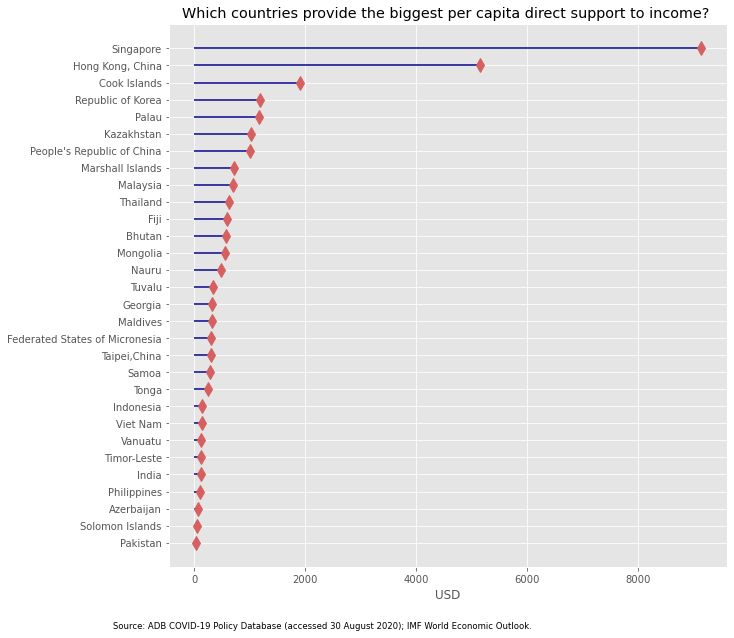

In [1104]:
fig, ax = plt.subplots(figsize=(10, 10))

ax.hlines(y=data.tail(30).index, xmin=0, xmax=data.tail(30)['m5_pct'], color='darkblue')
ax.plot(data.tail(30)['m5_pct'], data.tail(30).index, 'd', color='r', markersize=10)
ax.set_xlabel('USD')
ax.set_title('Which countries provide the biggest per capita direct support to income? ')
plt.annotate('Source: ADB COVID-19 Policy Database (accessed 30 August 2020); IMF World Economic Outlook.',
             xy=(-0.1, -0.1), xycoords='axes fraction', textcoords='offset points', va='top',
             fontsize=8.5)

fig.savefig('per-capita-support.png', bbox_inches='tight', dpi=fig.dpi)

In [1110]:
df3

amount_lcy    amount_usd       gdp_lcy  \
region                country                                                 
Central and West Asia Afghanistan  8.000000e+09  1.016625e+08  1.502470e+12   
                      Armenia      3.000000e+11  6.134861e+08  6.541000e+12   
                      Azerbaijan   2.715350e+09  1.597265e+09  8.019100e+10   
                      Georgia      5.887498e+09  1.936210e+09  4.474900e+10   
                      Kazakhstan   9.810000e+12  2.379624e+10  6.543920e+13   
...                                         ...           ...           ...   
Southeast Asia        Philippines  1.071298e+12  2.104562e+10  1.873280e+13   
                      Singapore    1.304905e+11  9.212178e+10  4.980840e+11   
                      Thailand     2.700000e+12  8.409179e+10  1.692200e+13   
                      Timor-Leste  2.540000e+08  2.540000e+08  2.938000e+09   
                      Viet Nam     6.158000e+14  2.650312e+10  6.085060e+15   

                                        gdp_usd         popn    pkg_gdp  \
region                country                                             
Central and West Asia Afghanistan  1.873400e+10   37172386.0   0.542663   
                      Armenia      1.344400e+10    2951776.0   4.563271   
                      Azerbaijan   4.717100e+10    9942334.0   3.386116   
                      Georgia      1.592500e+10    3731000.0  12.158308   
                      Kazakhstan   1.703260e+11   18276499.0  13.970997   
...                                         ...          ...        ...   
Southeast Asia        Philippines  3.568140e+11  106651922.0   5.898206   
                      Singapore    3.628180e+11    5638676.0  25.390631   
                      Thailand     5.291770e+11   69428524.0  15.891051   
                      Timor-Leste  2.938000e+09    1267972.0   8.645337   
                      Viet Nam     2.616370e+11   95540395.0  10.129729   

                                     pkg_pc_usd            m1            m2  \
region                country                                                 
Central and West Asia Afghanistan      2.734893  0.000000e+00  0.000000e+00   
                      Armenia        207.836264  0.000000e+00  5.112384e+07   
                      Azerbaijan     160.652892  0.000000e+00  2.941176e+08   
                      Georgia        518.952156  2.700000e+08  3.058474e+08   
                      Kazakhstan    1302.013047  4.244997e+09  0.000000e+00   
...                                         ...           ...           ...   
Southeast Asia        Philippines    197.329997  5.200693e+09  2.357397e+09   
                      Singapore    16337.484018  2.823862e+09  0.000000e+00   
                      Thailand      1211.199412  0.000000e+00  2.647334e+10   
                      Timor-Leste    200.319881  0.000000e+00  4.000000e+06   
                      Viet Nam       277.402247  0.000000e+00  0.000000e+00   

                                             m3  ...    m10_pkg    m1_gdp  \
region                country                    ...                        
Central and West Asia Afghanistan  0.000000e+00  ...   0.000000  0.000000   
                      Armenia      0.000000e+00  ...  81.666667  0.000000   
                      Azerbaijan   0.000000e+00  ...  36.827665  0.000000   
                      Georgia      0.000000e+00  ...   8.492572  1.695447   
                      Kazakhstan   8.732565e+08  ...   0.000000  2.492278   
...                                         ...  ...        ...       ...   
Southeast Asia        Philippines  3.637857e+08  ...  13.534983  1.457536   
                      Singapore    2.096717e+10  ...   0.000000  0.778314   
                      Thailand     1.401530e+10  ...   0.000000  0.000000   
                      Timor-Leste  0.000000e+00  ...  39.370079  0.000000   
                      Viet Nam     1.360017e+10  ...   0.000000  0.000000   

   

In [ ]:
url4 = 'https://raw.githubusercontent.com/jessonpagaduan/covid19policydatabase/master/ados_forecast.csv'

In [ ]:
df4 = pd.read_csv(url4)

In [ ]:
df4.set_index('country', inplace=True)

In [ ]:
df4.columns

In [ ]:
df4.columns = ['gdp2020_ado', 'gdp2020_ados', 'gdp2021_ado', 'gdp2021_ados',
               'inf2020_ado', 'inf2020_ados', 'inf2021_ado', 'inf2021_ados']

In [ ]:
df4

In [ ]:
df4 = df4.assign(gdpf2020_change = lambda x: x.gdp2020_ados - x.gdp2020_ado)
df4 = df4.assign(gdpf2021_change = lambda x: x.gdp2021_ados - x.gdp2021_ado)
df4 = df4.assign(inff2020_change = lambda x: x.inf2020_ados - x.inf2020_ado)
df4 = df4.assign(inff2021_change = lambda x: x.inf2021_ados - x.inf2021_ado)

In [ ]:
df4

In [ ]:
df3

In [ ]:
df5 = df3.reset_index(level=0).join(df4)

In [ ]:
df5

In [ ]:
df5.loc[~df5.region.isin(['Other Economies', 'Other ADB Members', 'Others']),
        ['pkg_gdp', 'gdpf2020_change', 'inff2020_change']]

In [ ]:
data1 = df5.loc[~df5.region.isin(['Other Economies', 'Other ADB Members', 'Others']),
        ['pkg_gdp', 'gdpf2020_change', 'inff2020_change']]

In [ ]:
sns.regplot(x=data1['pkg_gdp'][data1.pkg_gdp > 0], y=data1['gdpf2020_change'][data1.pkg_gdp > 0], data=data1, logx=True)

In [ ]:
data1.sort_values(by='pkg_gdp', ascending=False)[data1.pkg_gdp > 0].dropna()

In [ ]:
data2 = data1.sort_values(by='pkg_gdp', ascending=False)[data1.pkg_gdp > 0].dropna().loc['Malaysia':,]

In [ ]:
data2

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.regplot(x=data2['pkg_gdp'], y=data2['gdpf2020_change'], robust=True, 
            label='Change in 2020 GDP growth forecasts',
            ax=ax)
sns.regplot(x=data2['pkg_gdp'], y=data2['inff2020_change'], robust=True, 
            label='Change in 2020 inflation rate forecasts',
            ax=ax)

ax.set(title='How do stimulus packages affect the economic outlook?',
       xlabel='COVID-19 Policy Response (% of GDP)',
       ylabel='Percentage points')
ax.legend()
ax.annotate('Source: Asian Development Outlook database; ADB COVID-19 Policy database.', 
            (-0.1,0), (10,-40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [ ]:
fig, ax = plt.subplots()

sns.regplot(x=data2['pkg_gdp'], y=data2['gdpf2020_change'], robust=True, 
            label='Change in 2020 GDP growth forecasts',
            ax=ax)
sns.regplot(x=data2['pkg_gdp'], y=data2['inff2020_change'], robust=True, 
            label='Change in 2020 inflation rate forecasts',
            ax=ax)

ax.set(title='How do stimulus packages affect the economic outlook?',
       xlabel='COVID-19 Policy Response (% of GDP)',
       ylabel='Percentage points')
ax.legend()
ax.annotate('Source: Asian Development Outlook database; ADB COVID-19 Policy database.', 
            (-0.2,0), (10,-40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [ ]:
data2

In [ ]:
data3 = data2.sort_values(by='pkg_gdp', ascending=False)[data2.pkg_gdp > 0].dropna()

In [ ]:
data3.plot(kind='box')

In [ ]:
data3.index.isin(['Kyrgyz Republic', 'Afghanistan', 'Vanuatu', 'Armenia', 'Malaysia'])

In [ ]:
data3.sort_values(by='inff2020_change', ascending=False)

In [ ]:
mask = data3.index.isin(['Kyrgyz Republic', 'Afghanistan', 'Vanuatu', 'Armenia', 'Malaysia'])

In [ ]:
fig, ax = plt.subplots()

sns.regplot(x=data2['pkg_gdp'][~mask], y=data2['gdpf2020_change'][~mask], robust=True, 
            label='Change in 2020 GDP growth forecasts',
            ax=ax)
sns.regplot(x=data2['pkg_gdp'][~mask], y=data2['inff2020_change'][~mask], robust=True, 
            label='Change in 2020 inflation rate forecasts',
            ax=ax)

ax.set(title='How do stimulus packages affect the economic outlook?',
       xlabel='COVID-19 Policy Response (% of GDP)',
       ylabel='Percentage points')
ax.legend()
ax.annotate('Source: Asian Development Outlook database; ADB COVID-19 Policy database.', 
            (-0.2,0), (10,-40), xycoords='axes fraction', textcoords='offset points', va='top')
plt.show()

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots()

ax.set_xlim([0, 10])
ax.set_ylim([0, 10])
x = np.linspace(*ax.get_xlim())
ax.plot(x, x)